In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/')

In [2]:
%matplotlib notebook
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt

import gym
from stable_baselines3.ppo import PPO, MlpPolicy
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList
from utils.custom_eval_callback import CustomEvalCallback
from typing import Callable

from utils.plot_functions import plot_learning

from model.ressim import Grid
from ressim_env import ResSimEnv_v0, ResSimEnv_v1, ResSimEnv_v2
from k_distributions.generate_constr_k import generate_cond_
from utils.env_wrappers import StepReset

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case='1ph_v0_reset_step'

In [4]:
os.makedirs('./data', exist_ok=True)
os.makedirs('./data/'+case, exist_ok=True)

In [5]:
case_ = '1ph_v0'
with open('../envs_params/env_data/env_'+case_+'_train.pkl', 'rb') as input:
    env_train = pickle.load(input)

rl_indices = [2,4,6,7,9,14,19,21,23]
with open('../envs_params/env_data/env_'+case_+'_eval.pkl', 'rb') as input:
    env_eval = pickle.load(input)
k_list_rl = env_eval.k_list[rl_indices]
env_eval.set_k(k_list_rl)
    
with open('../envs_params/env_data/env_list_'+case_+'_eval.pkl', 'rb') as input:
    envs = pickle.load(input)

In [6]:
# wrap environement
env_train = StepReset(env_train)
env_eval = StepReset(env_eval)
for env in envs:
    env = StepReset(env)

In [7]:
def make_env(env, rank: int, seed: int = 0) -> Callable:
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :return: (Callable)
    """
    def _init() -> gym.Env:
        env_ = env
        env_.seed(seed + rank)
        return env_
    return _init

seed 1
seed 1: model definition ..
Using cuda device
seed 1: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cec56128> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cec369e8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cec56128> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cec255f8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarn

----------------------------
| time/              |     |
|    fps             | 140 |
|    iterations      | 1   |
|    time_elapsed    | 1   |
|    total_timesteps | 256 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 512         |
| train/                  |             |
|    approx_kl            | 0.015621489 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.92        |
|    explained_variance   | 0.307       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.06       |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0452     |
|    std                  | 0.15        |
|    value_loss           | 0.0124      |
-----------------------------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 13          |
|    time_elapsed         | 48          |
|    total_timesteps      | 3328        |
| train/                  |             |
|    approx_kl            | 0.056910932 |
|    clip_fraction        | 0.439       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.93        |
|    explained_variance   | 0.904       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.113      |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.0921     |
|    std                  | 0.149       |
|    value_loss           | 0.00208     |
-----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 68        |
|    iterations           | 14        |
|    time_elapsed         | 52        |
| 

-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 24          |
|    time_elapsed         | 91          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.070968665 |
|    clip_fraction        | 0.529       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.96        |
|    explained_variance   | 0.926       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0999     |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.0982     |
|    std                  | 0.148       |
|    value_loss           | 0.00514     |
-----------------------------------------
Eval num_timesteps=6400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mea

-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 35          |
|    time_elapsed         | 144         |
|    total_timesteps      | 8960        |
| train/                  |             |
|    approx_kl            | 0.032879088 |
|    clip_fraction        | 0.465       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.98        |
|    explained_variance   | 0.903       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.119      |
|    n_updates            | 680         |
|    policy_gradient_loss | -0.091      |
|    std                  | 0.148       |
|    value_loss           | 0.00157     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 36          |
|    time_elapsed         | 147   

----------------------------------------
| time/                   |            |
|    fps                  | 63         |
|    iterations           | 46         |
|    time_elapsed         | 185        |
|    total_timesteps      | 11776      |
| train/                  |            |
|    approx_kl            | 0.04279786 |
|    clip_fraction        | 0.474      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.99       |
|    explained_variance   | 0.915      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.103     |
|    n_updates            | 900        |
|    policy_gradient_loss | -0.088     |
|    std                  | 0.147      |
|    value_loss           | 0.00174    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 47          |
|    time_elapsed         | 189         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 56         |
|    time_elapsed         | 235        |
|    total_timesteps      | 14336      |
| train/                  |            |
|    approx_kl            | 0.06670985 |
|    clip_fraction        | 0.556      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2          |
|    explained_variance   | 0.943      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 1100       |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.147      |
|    value_loss           | 0.00136    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 57         |
|    time_elapsed         | 239        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 67         |
|    time_elapsed         | 276        |
|    total_timesteps      | 17152      |
| train/                  |            |
|    approx_kl            | 0.05896097 |
|    clip_fraction        | 0.514      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.02       |
|    explained_variance   | 0.952      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.108     |
|    n_updates            | 1320       |
|    policy_gradient_loss | -0.0972    |
|    std                  | 0.146      |
|    value_loss           | 0.00125    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 62         |
|    iterations           | 68         |
|    time_elapsed         | 280        |
|    total_times

Eval num_timesteps=19200, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.588      |
| 

-----------------------------------------
| time/                   |             |
|    fps                  | 53          |
|    iterations           | 85          |
|    time_elapsed         | 407         |
|    total_timesteps      | 21760       |
| train/                  |             |
|    approx_kl            | 0.071657866 |
|    clip_fraction        | 0.548       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.05        |
|    explained_variance   | 0.944       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.101      |
|    n_updates            | 1680        |
|    policy_gradient_loss | -0.0956     |
|    std                  | 0.145       |
|    value_loss           | 0.00109     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 53          |
|    iterations           | 86          |
|    time_elapsed         | 411   

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 96         |
|    time_elapsed         | 449        |
|    total_timesteps      | 24576      |
| train/                  |            |
|    approx_kl            | 0.06770317 |
|    clip_fraction        | 0.535      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.07       |
|    explained_variance   | 0.895      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.136     |
|    n_updates            | 1900       |
|    policy_gradient_loss | -0.0936    |
|    std                  | 0.144      |
|    value_loss           | 0.00193    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 97         |
|    time_elapsed         | 453        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 107        |
|    time_elapsed         | 501        |
|    total_timesteps      | 27392      |
| train/                  |            |
|    approx_kl            | 0.08766894 |
|    clip_fraction        | 0.534      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.08       |
|    explained_variance   | 0.941      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.139     |
|    n_updates            | 2120       |
|    policy_gradient_loss | -0.0938    |
|    std                  | 0.144      |
|    value_loss           | 0.00139    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 108        |
|    time_elapsed         | 504        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 118         |
|    time_elapsed         | 542         |
|    total_timesteps      | 30208       |
| train/                  |             |
|    approx_kl            | 0.073782414 |
|    clip_fraction        | 0.553       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.1         |
|    explained_variance   | 0.918       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.115      |
|    n_updates            | 2340        |
|    policy_gradient_loss | -0.0957     |
|    std                  | 0.143       |
|    value_loss           | 0.00127     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 119        |
|    time_elapsed         | 546       

-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 128         |
|    time_elapsed         | 589         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.097463496 |
|    clip_fraction        | 0.577       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.12        |
|    explained_variance   | 0.937       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.121      |
|    n_updates            | 2540        |
|    policy_gradient_loss | -0.0943     |
|    std                  | 0.142       |
|    value_loss           | 0.00121     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 129         |
|    time_elapsed         | 593   

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 139        |
|    time_elapsed         | 632        |
|    total_timesteps      | 35584      |
| train/                  |            |
|    approx_kl            | 0.09613581 |
|    clip_fraction        | 0.538      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.14       |
|    explained_variance   | 0.925      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 2760       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.142      |
|    value_loss           | 0.00144    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 140        |
|    time_elapsed         | 636        |
|    total_times

Eval num_timesteps=38400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.49 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.53 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.53 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.49 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.56 +/- 0.00
Episode

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 157        |
|    time_elapsed         | 737        |
|    total_timesteps      | 40192      |
| train/                  |            |
|    approx_kl            | 0.06952125 |
|    clip_fraction        | 0.585      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.18       |
|    explained_variance   | 0.921      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 3120       |
|    policy_gradient_loss | -0.0976    |
|    std                  | 0.14       |
|    value_loss           | 0.00255    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 158        |
|    time_elapsed         | 741        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 168         |
|    time_elapsed         | 778         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.030769855 |
|    clip_fraction        | 0.549       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.19        |
|    explained_variance   | 0.933       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.13       |
|    n_updates            | 3340        |
|    policy_gradient_loss | -0.0982     |
|    std                  | 0.14        |
|    value_loss           | 0.00126     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 169        |
|    time_elapsed         | 782       

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 179        |
|    time_elapsed         | 827        |
|    total_timesteps      | 45824      |
| train/                  |            |
|    approx_kl            | 0.19280909 |
|    clip_fraction        | 0.623      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.21       |
|    explained_variance   | 0.931      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.106     |
|    n_updates            | 3560       |
|    policy_gradient_loss | -0.107     |
|    std                  | 0.139      |
|    value_loss           | 0.0016     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 180        |
|    time_elapsed         | 831        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 190        |
|    time_elapsed         | 868        |
|    total_timesteps      | 48640      |
| train/                  |            |
|    approx_kl            | 0.16759394 |
|    clip_fraction        | 0.584      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.23       |
|    explained_variance   | 0.93       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 3780       |
|    policy_gradient_loss | -0.0975    |
|    std                  | 0.139      |
|    value_loss           | 0.00148    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 191        |
|    time_elapsed         | 872        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 201        |
|    time_elapsed         | 916        |
|    total_timesteps      | 51456      |
| train/                  |            |
|    approx_kl            | 0.14378276 |
|    clip_fraction        | 0.548      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.24       |
|    explained_variance   | 0.947      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 4000       |
|    policy_gradient_loss | -0.0893    |
|    std                  | 0.138      |
|    value_loss           | 0.00114    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 202        |
|    time_elapsed         | 920        |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 56        |
|    iterations           | 212       |
|    time_elapsed         | 957       |
|    total_timesteps      | 54272     |
| train/                  |           |
|    approx_kl            | 0.1406044 |
|    clip_fraction        | 0.571     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.26      |
|    explained_variance   | 0.937     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0996   |
|    n_updates            | 4220      |
|    policy_gradient_loss | -0.0939   |
|    std                  | 0.137     |
|    value_loss           | 0.00129   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 213        |
|    time_elapsed         | 961        |
|    total_timesteps      | 54528  

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 223        |
|    time_elapsed         | 999        |
|    total_timesteps      | 57088      |
| train/                  |            |
|    approx_kl            | 0.12566814 |
|    clip_fraction        | 0.565      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.28       |
|    explained_variance   | 0.931      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 4440       |
|    policy_gradient_loss | -0.0968    |
|    std                  | 0.137      |
|    value_loss           | 0.00125    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 224        |
|    time_elapsed         | 1002       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 231        |
|    time_elapsed         | 1061       |
|    total_timesteps      | 59136      |
| train/                  |            |
|    approx_kl            | 0.17513669 |
|    clip_fraction        | 0.645      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.3        |
|    explained_variance   | 0.958      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 4600       |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.136      |
|    value_loss           | 0.00101    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 232        |
|    time_elapsed         | 1065       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 242        |
|    time_elapsed         | 1102       |
|    total_timesteps      | 61952      |
| train/                  |            |
|    approx_kl            | 0.17831881 |
|    clip_fraction        | 0.632      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.32       |
|    explained_variance   | 0.945      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 4820       |
|    policy_gradient_loss | -0.0973    |
|    std                  | 0.135      |
|    value_loss           | 0.00106    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 243        |
|    time_elapsed         | 1106       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 253        |
|    time_elapsed         | 1151       |
|    total_timesteps      | 64768      |
| train/                  |            |
|    approx_kl            | 0.16356769 |
|    clip_fraction        | 0.62       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.34       |
|    explained_variance   | 0.961      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 5040       |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.135      |
|    value_loss           | 0.00102    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 254        |
|    time_elapsed         | 1155       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 264        |
|    time_elapsed         | 1192       |
|    total_timesteps      | 67584      |
| train/                  |            |
|    approx_kl            | 0.21875471 |
|    clip_fraction        | 0.644      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.35       |
|    explained_variance   | 0.956      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0961    |
|    n_updates            | 5260       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.134      |
|    value_loss           | 0.000988   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 265        |
|    time_elapsed         | 1196       |
|    total_times

Eval num_timesteps=70400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=70400, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.582      |
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 275        |
|    time_elapsed         | 1240       |
|    total_timesteps      | 70400      |
| train/                  |            |
|    approx_kl            | 0.21082745 |
|    clip_fraction        | 0.631      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.37       |
|    explained_variance   | 0.968      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 5480       |
|    policy_gradient_loss | -0.0988    |
|    std                  | 0.134      |
|    value

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 286        |
|    time_elapsed         | 1281       |
|    total_timesteps      | 73216      |
| train/                  |            |
|    approx_kl            | 0.22895876 |
|    clip_fraction        | 0.669      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.39       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 5700       |
|    policy_gradient_loss | -0.0977    |
|    std                  | 0.133      |
|    value_loss           | 0.000821   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 287        |
|    time_elapsed         | 1285       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 297        |
|    time_elapsed         | 1322       |
|    total_timesteps      | 76032      |
| train/                  |            |
|    approx_kl            | 0.06556742 |
|    clip_fraction        | 0.63       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.41       |
|    explained_variance   | 0.93       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 5920       |
|    policy_gradient_loss | -0.0934    |
|    std                  | 0.133      |
|    value_loss           | 0.00111    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 298        |
|    time_elapsed         | 1326       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 305        |
|    time_elapsed         | 1377       |
|    total_timesteps      | 78080      |
| train/                  |            |
|    approx_kl            | 0.13464215 |
|    clip_fraction        | 0.56       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.42       |
|    explained_variance   | 0.958      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0878    |
|    n_updates            | 6080       |
|    policy_gradient_loss | -0.0926    |
|    std                  | 0.132      |
|    value_loss           | 0.00101    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 306         |
|    time_elapsed         | 1380        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 316        |
|    time_elapsed         | 1418       |
|    total_timesteps      | 80896      |
| train/                  |            |
|    approx_kl            | 0.08107574 |
|    clip_fraction        | 0.617      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.44       |
|    explained_variance   | 0.951      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 6300       |
|    policy_gradient_loss | -0.0974    |
|    std                  | 0.132      |
|    value_loss           | 0.00111    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 317        |
|    time_elapsed         | 1421       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 327        |
|    time_elapsed         | 1468       |
|    total_timesteps      | 83712      |
| train/                  |            |
|    approx_kl            | 0.11770709 |
|    clip_fraction        | 0.627      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.46       |
|    explained_variance   | 0.953      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0826    |
|    n_updates            | 6520       |
|    policy_gradient_loss | -0.0936    |
|    std                  | 0.131      |
|    value_loss           | 0.000876   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 328        |
|    time_elapsed         | 1472       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 338        |
|    time_elapsed         | 1509       |
|    total_timesteps      | 86528      |
| train/                  |            |
|    approx_kl            | 0.18713412 |
|    clip_fraction        | 0.639      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.48       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0968    |
|    n_updates            | 6740       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.13       |
|    value_loss           | 0.000818   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 339        |
|    time_elapsed         | 1512       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 349        |
|    time_elapsed         | 1550       |
|    total_timesteps      | 89344      |
| train/                  |            |
|    approx_kl            | 0.16364232 |
|    clip_fraction        | 0.61       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.5        |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0942    |
|    n_updates            | 6960       |
|    policy_gradient_loss | -0.0968    |
|    std                  | 0.13       |
|    value_loss           | 0.000807   |
----------------------------------------
Eval num_timesteps=89600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=89600, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/   

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 360         |
|    time_elapsed         | 1599        |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.118440755 |
|    clip_fraction        | 0.629       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.51        |
|    explained_variance   | 0.941       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.104      |
|    n_updates            | 7180        |
|    policy_gradient_loss | -0.0959     |
|    std                  | 0.129       |
|    value_loss           | 0.000986    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 361        |
|    time_elapsed         | 1603      

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 371        |
|    time_elapsed         | 1640       |
|    total_timesteps      | 94976      |
| train/                  |            |
|    approx_kl            | 0.12762122 |
|    clip_fraction        | 0.592      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.53       |
|    explained_variance   | 0.963      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.079     |
|    n_updates            | 7400       |
|    policy_gradient_loss | -0.0905    |
|    std                  | 0.128      |
|    value_loss           | 0.000996   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 372        |
|    time_elapsed         | 1644       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 379        |
|    time_elapsed         | 1696       |
|    total_timesteps      | 97024      |
| train/                  |            |
|    approx_kl            | 0.12425071 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.55       |
|    explained_variance   | 0.968      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 7560       |
|    policy_gradient_loss | -0.0961    |
|    std                  | 0.128      |
|    value_loss           | 0.000693   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 380        |
|    time_elapsed         | 1699       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 390        |
|    time_elapsed         | 1736       |
|    total_timesteps      | 99840      |
| train/                  |            |
|    approx_kl            | 0.13642086 |
|    clip_fraction        | 0.621      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.57       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0802    |
|    n_updates            | 7780       |
|    policy_gradient_loss | -0.0937    |
|    std                  | 0.127      |
|    value_loss           | 0.000917   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 391        |
|    time_elapsed         | 1740       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 401       |
|    time_elapsed         | 1785      |
|    total_timesteps      | 102656    |
| train/                  |           |
|    approx_kl            | 0.2244769 |
|    clip_fraction        | 0.644     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.59      |
|    explained_variance   | 0.983     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.137    |
|    n_updates            | 8000      |
|    policy_gradient_loss | -0.097    |
|    std                  | 0.127     |
|    value_loss           | 0.000609  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 402        |
|    time_elapsed         | 1789       |
|    total_timesteps      | 102912 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 412        |
|    time_elapsed         | 1826       |
|    total_timesteps      | 105472     |
| train/                  |            |
|    approx_kl            | 0.15008062 |
|    clip_fraction        | 0.676      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.6        |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.101     |
|    n_updates            | 8220       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.126      |
|    value_loss           | 0.000927   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 413        |
|    time_elapsed         | 1830       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 423        |
|    time_elapsed         | 1867       |
|    total_timesteps      | 108288     |
| train/                  |            |
|    approx_kl            | 0.17559521 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.62       |
|    explained_variance   | 0.97       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 8440       |
|    policy_gradient_loss | -0.0992    |
|    std                  | 0.126      |
|    value_loss           | 0.000829   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 424        |
|    time_elapsed         | 1871       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 434        |
|    time_elapsed         | 1917       |
|    total_timesteps      | 111104     |
| train/                  |            |
|    approx_kl            | 0.13716002 |
|    clip_fraction        | 0.587      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.64       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 8660       |
|    policy_gradient_loss | -0.0897    |
|    std                  | 0.125      |
|    value_loss           | 0.000794   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 435        |
|    time_elapsed         | 1921       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 445        |
|    time_elapsed         | 1958       |
|    total_timesteps      | 113920     |
| train/                  |            |
|    approx_kl            | 0.11855611 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.65       |
|    explained_variance   | 0.958      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 8880       |
|    policy_gradient_loss | -0.0875    |
|    std                  | 0.125      |
|    value_loss           | 0.000902   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 446        |
|    time_elapsed         | 1961       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 453       |
|    time_elapsed         | 2018      |
|    total_timesteps      | 115968    |
| train/                  |           |
|    approx_kl            | 0.2581178 |
|    clip_fraction        | 0.67      |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.67      |
|    explained_variance   | 0.979     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.113    |
|    n_updates            | 9040      |
|    policy_gradient_loss | -0.101    |
|    std                  | 0.124     |
|    value_loss           | 0.00061   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 454        |
|    time_elapsed         | 2022       |
|    total_timesteps      | 116224 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 464        |
|    time_elapsed         | 2060       |
|    total_timesteps      | 118784     |
| train/                  |            |
|    approx_kl            | 0.15151627 |
|    clip_fraction        | 0.631      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.69       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.114     |
|    n_updates            | 9260       |
|    policy_gradient_loss | -0.0914    |
|    std                  | 0.124      |
|    value_loss           | 0.000661   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 465        |
|    time_elapsed         | 2063       |
|    total_times

Eval num_timesteps=121600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=121600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.587      |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 475        |
|    time_elapsed         | 2108       |
|    total_timesteps      | 121600     |
| train/                  |            |
|    approx_kl            | 0.10097256 |
|    clip_fraction        | 0.667      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.71       |
|    explained_variance   | 0.959      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0959    |
|    n_updates            | 9480       |
|    policy_gradient_loss | -0.0941    |
|    std                  | 0.123      |
|    val

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 486        |
|    time_elapsed         | 2149       |
|    total_timesteps      | 124416     |
| train/                  |            |
|    approx_kl            | 0.23102584 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.73       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0939    |
|    n_updates            | 9700       |
|    policy_gradient_loss | -0.0981    |
|    std                  | 0.122      |
|    value_loss           | 0.000798   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 487        |
|    time_elapsed         | 2153       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 497       |
|    time_elapsed         | 2190      |
|    total_timesteps      | 127232    |
| train/                  |           |
|    approx_kl            | 0.2477569 |
|    clip_fraction        | 0.667     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.75      |
|    explained_variance   | 0.98      |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0973   |
|    n_updates            | 9920      |
|    policy_gradient_loss | -0.0905   |
|    std                  | 0.122     |
|    value_loss           | 0.000542  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 498        |
|    time_elapsed         | 2194       |
|    total_timesteps      | 127488 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 508        |
|    time_elapsed         | 2240       |
|    total_timesteps      | 130048     |
| train/                  |            |
|    approx_kl            | 0.19303995 |
|    clip_fraction        | 0.676      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.77       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.134     |
|    n_updates            | 10140      |
|    policy_gradient_loss | -0.096     |
|    std                  | 0.121      |
|    value_loss           | 0.00084    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 509        |
|    time_elapsed         | 2244       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 519        |
|    time_elapsed         | 2281       |
|    total_timesteps      | 132864     |
| train/                  |            |
|    approx_kl            | 0.19629541 |
|    clip_fraction        | 0.691      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.78       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.135     |
|    n_updates            | 10360      |
|    policy_gradient_loss | -0.112     |
|    std                  | 0.121      |
|    value_loss           | 0.000691   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 520        |
|    time_elapsed         | 2285       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 527        |
|    time_elapsed         | 2336       |
|    total_timesteps      | 134912     |
| train/                  |            |
|    approx_kl            | 0.21207064 |
|    clip_fraction        | 0.68       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.8        |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.144     |
|    n_updates            | 10520      |
|    policy_gradient_loss | -0.0976    |
|    std                  | 0.12       |
|    value_loss           | 0.000581   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 528        |
|    time_elapsed         | 2340       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 538        |
|    time_elapsed         | 2377       |
|    total_timesteps      | 137728     |
| train/                  |            |
|    approx_kl            | 0.15871438 |
|    clip_fraction        | 0.636      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.82       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 10740      |
|    policy_gradient_loss | -0.0903    |
|    std                  | 0.12       |
|    value_loss           | 0.000775   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 539        |
|    time_elapsed         | 2381       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 549        |
|    time_elapsed         | 2418       |
|    total_timesteps      | 140544     |
| train/                  |            |
|    approx_kl            | 0.19960871 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.83       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.1       |
|    n_updates            | 10960      |
|    policy_gradient_loss | -0.0944    |
|    std                  | 0.119      |
|    value_loss           | 0.000647   |
----------------------------------------
Eval num_timesteps=140800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=140800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
---------------------------------------
| eval/  

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 560        |
|    time_elapsed         | 2467       |
|    total_timesteps      | 143360     |
| train/                  |            |
|    approx_kl            | 0.25855184 |
|    clip_fraction        | 0.637      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.85       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 11180      |
|    policy_gradient_loss | -0.0895    |
|    std                  | 0.119      |
|    value_loss           | 0.000584   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 561        |
|    time_elapsed         | 2471       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 571       |
|    time_elapsed         | 2508      |
|    total_timesteps      | 146176    |
| train/                  |           |
|    approx_kl            | 0.2038379 |
|    clip_fraction        | 0.68      |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.87      |
|    explained_variance   | 0.977     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.11     |
|    n_updates            | 11400     |
|    policy_gradient_loss | -0.106    |
|    std                  | 0.118     |
|    value_loss           | 0.000727  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 572       |
|    time_elapsed         | 2512      |
|    total_timesteps      | 146432    |


----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 582        |
|    time_elapsed         | 2556       |
|    total_timesteps      | 148992     |
| train/                  |            |
|    approx_kl            | 0.16822328 |
|    clip_fraction        | 0.664      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.89       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.114     |
|    n_updates            | 11620      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.117      |
|    value_loss           | 0.000682   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 583        |
|    time_elapsed         | 2560       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 593        |
|    time_elapsed         | 2597       |
|    total_timesteps      | 151808     |
| train/                  |            |
|    approx_kl            | 0.10073119 |
|    clip_fraction        | 0.635      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.91       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 11840      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.117      |
|    value_loss           | 0.00066    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 594       |
|    time_elapsed         | 2601      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 601        |
|    time_elapsed         | 2648       |
|    total_timesteps      | 153856     |
| train/                  |            |
|    approx_kl            | 0.19412962 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.93       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 12000      |
|    policy_gradient_loss | -0.0857    |
|    std                  | 0.116      |
|    value_loss           | 0.000786   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 602        |
|    time_elapsed         | 2652       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 612        |
|    time_elapsed         | 2690       |
|    total_timesteps      | 156672     |
| train/                  |            |
|    approx_kl            | 0.20197693 |
|    clip_fraction        | 0.636      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.95       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 12220      |
|    policy_gradient_loss | -0.093     |
|    std                  | 0.116      |
|    value_loss           | 0.000724   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 613        |
|    time_elapsed         | 2693       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 623        |
|    time_elapsed         | 2730       |
|    total_timesteps      | 159488     |
| train/                  |            |
|    approx_kl            | 0.22095367 |
|    clip_fraction        | 0.694      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.97       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0934    |
|    n_updates            | 12440      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.115      |
|    value_loss           | 0.000834   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 624       |
|    time_elapsed         | 2734      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 634        |
|    time_elapsed         | 2779       |
|    total_timesteps      | 162304     |
| train/                  |            |
|    approx_kl            | 0.21482356 |
|    clip_fraction        | 0.7        |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.98       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.132     |
|    n_updates            | 12660      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.115      |
|    value_loss           | 0.000772   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 635       |
|    time_elapsed         | 2783      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 645        |
|    time_elapsed         | 2820       |
|    total_timesteps      | 165120     |
| train/                  |            |
|    approx_kl            | 0.14197014 |
|    clip_fraction        | 0.648      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3          |
|    explained_variance   | 0.95       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0649    |
|    n_updates            | 12880      |
|    policy_gradient_loss | -0.0915    |
|    std                  | 0.114      |
|    value_loss           | 0.0012     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 646        |
|    time_elapsed         | 2824       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 656        |
|    time_elapsed         | 2871       |
|    total_timesteps      | 167936     |
| train/                  |            |
|    approx_kl            | 0.09246124 |
|    clip_fraction        | 0.685      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.02       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 13100      |
|    policy_gradient_loss | -0.106     |
|    std                  | 0.114      |
|    value_loss           | 0.000664   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 657        |
|    time_elapsed         | 2875       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 667        |
|    time_elapsed         | 2912       |
|    total_timesteps      | 170752     |
| train/                  |            |
|    approx_kl            | 0.17165294 |
|    clip_fraction        | 0.675      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.04       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 13320      |
|    policy_gradient_loss | -0.108     |
|    std                  | 0.113      |
|    value_loss           | 0.000589   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 668        |
|    time_elapsed         | 2915       |
|    total_times

Eval num_timesteps=172800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 5         |
|    mean_reward          | 0.585     |
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 675       |
|    time_elapsed         | 2960      |
|    total_timesteps      | 172800    |
| train/                  |           |
|    approx_kl            | 0.2568129 |
|    clip_fraction        | 0.682     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.05      |
|    explained_variance   | 0.973     |
|    learning_rate        | 1e-05     |
|    loss       

--------------------------------------
| time/                   |          |
|    fps                  | 58       |
|    iterations           | 686      |
|    time_elapsed         | 3001     |
|    total_timesteps      | 175616   |
| train/                  |          |
|    approx_kl            | 0.222794 |
|    clip_fraction        | 0.643    |
|    clip_range           | 0.2      |
|    entropy_loss         | 3.07     |
|    explained_variance   | 0.975    |
|    learning_rate        | 1e-05    |
|    loss                 | -0.113   |
|    n_updates            | 13700    |
|    policy_gradient_loss | -0.0907  |
|    std                  | 0.112    |
|    value_loss           | 0.000786 |
--------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 687        |
|    time_elapsed         | 3005       |
|    total_timesteps      | 175872     |
| train/     

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 697       |
|    time_elapsed         | 3042      |
|    total_timesteps      | 178432    |
| train/                  |           |
|    approx_kl            | 0.1867051 |
|    clip_fraction        | 0.686     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.09      |
|    explained_variance   | 0.96      |
|    learning_rate        | 1e-05     |
|    loss                 | -0.122    |
|    n_updates            | 13920     |
|    policy_gradient_loss | -0.0924   |
|    std                  | 0.112     |
|    value_loss           | 0.000876  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 698       |
|    time_elapsed         | 3046      |
|    total_timesteps      | 178688    |


----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 708        |
|    time_elapsed         | 3091       |
|    total_timesteps      | 181248     |
| train/                  |            |
|    approx_kl            | 0.19968042 |
|    clip_fraction        | 0.682      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.11       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 14140      |
|    policy_gradient_loss | -0.0983    |
|    std                  | 0.111      |
|    value_loss           | 0.000637   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 709        |
|    time_elapsed         | 3095       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 719       |
|    time_elapsed         | 3132      |
|    total_timesteps      | 184064    |
| train/                  |           |
|    approx_kl            | 0.2770072 |
|    clip_fraction        | 0.65      |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.13      |
|    explained_variance   | 0.978     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.131    |
|    n_updates            | 14360     |
|    policy_gradient_loss | -0.0974   |
|    std                  | 0.111     |
|    value_loss           | 0.000649  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 720        |
|    time_elapsed         | 3136       |
|    total_timesteps      | 184320 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 730        |
|    time_elapsed         | 3181       |
|    total_timesteps      | 186880     |
| train/                  |            |
|    approx_kl            | 0.22704664 |
|    clip_fraction        | 0.648      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.15       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 14580      |
|    policy_gradient_loss | -0.0965    |
|    std                  | 0.11       |
|    value_loss           | 0.000703   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 731       |
|    time_elapsed         | 3185      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 741        |
|    time_elapsed         | 3222       |
|    total_timesteps      | 189696     |
| train/                  |            |
|    approx_kl            | 0.15016094 |
|    clip_fraction        | 0.616      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.18       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0925    |
|    n_updates            | 14800      |
|    policy_gradient_loss | -0.0956    |
|    std                  | 0.109      |
|    value_loss           | 0.000563   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 742       |
|    time_elapsed         | 3226      |
|    total_timesteps 

Eval num_timesteps=192000, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=192000, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=192000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best m

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 759        |
|    time_elapsed         | 3311       |
|    total_timesteps      | 194304     |
| train/                  |            |
|    approx_kl            | 0.22177272 |
|    clip_fraction        | 0.656      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.21       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 15160      |
|    policy_gradient_loss | -0.0893    |
|    std                  | 0.108      |
|    value_loss           | 0.000592   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 760        |
|    time_elapsed         | 3314       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 770        |
|    time_elapsed         | 3352       |
|    total_timesteps      | 197120     |
| train/                  |            |
|    approx_kl            | 0.19102004 |
|    clip_fraction        | 0.675      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.23       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.143     |
|    n_updates            | 15380      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.108      |
|    value_loss           | 0.000545   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 771        |
|    time_elapsed         | 3356       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 781        |
|    time_elapsed         | 3401       |
|    total_timesteps      | 199936     |
| train/                  |            |
|    approx_kl            | 0.16467689 |
|    clip_fraction        | 0.669      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.26       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.13      |
|    n_updates            | 15600      |
|    policy_gradient_loss | -0.0983    |
|    std                  | 0.107      |
|    value_loss           | 0.000665   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 782        |
|    time_elapsed         | 3405       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 792       |
|    time_elapsed         | 3442      |
|    total_timesteps      | 202752    |
| train/                  |           |
|    approx_kl            | 0.2132076 |
|    clip_fraction        | 0.658     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.27      |
|    explained_variance   | 0.981     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.126    |
|    n_updates            | 15820     |
|    policy_gradient_loss | -0.102    |
|    std                  | 0.107     |
|    value_loss           | 0.000601  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 793        |
|    time_elapsed         | 3446       |
|    total_timesteps      | 203008 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 803        |
|    time_elapsed         | 3491       |
|    total_timesteps      | 205568     |
| train/                  |            |
|    approx_kl            | 0.17589225 |
|    clip_fraction        | 0.678      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.29       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 16040      |
|    policy_gradient_loss | -0.0941    |
|    std                  | 0.106      |
|    value_loss           | 0.000864   |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 804         |
|    time_elapsed         | 3495        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 814        |
|    time_elapsed         | 3532       |
|    total_timesteps      | 208384     |
| train/                  |            |
|    approx_kl            | 0.14151496 |
|    clip_fraction        | 0.693      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.31       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 16260      |
|    policy_gradient_loss | -0.0993    |
|    std                  | 0.106      |
|    value_loss           | 0.000685   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 815        |
|    time_elapsed         | 3536       |
|    total_times

Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.46 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.51 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=211200, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.53 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episo

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 833       |
|    time_elapsed         | 3621      |
|    total_timesteps      | 213248    |
| train/                  |           |
|    approx_kl            | 0.1739249 |
|    clip_fraction        | 0.674     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.35      |
|    explained_variance   | 0.975     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0899   |
|    n_updates            | 16640     |
|    policy_gradient_loss | -0.0971   |
|    std                  | 0.105     |
|    value_loss           | 0.000671  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 834        |
|    time_elapsed         | 3625       |
|    total_timesteps      | 213504 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 844        |
|    time_elapsed         | 3662       |
|    total_timesteps      | 216064     |
| train/                  |            |
|    approx_kl            | 0.17843911 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.37       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 16860      |
|    policy_gradient_loss | -0.0953    |
|    std                  | 0.104      |
|    value_loss           | 0.000618   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 845        |
|    time_elapsed         | 3666       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 855        |
|    time_elapsed         | 3711       |
|    total_timesteps      | 218880     |
| train/                  |            |
|    approx_kl            | 0.11372961 |
|    clip_fraction        | 0.704      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.39       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 17080      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.104      |
|    value_loss           | 0.000768   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 856        |
|    time_elapsed         | 3714       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 866        |
|    time_elapsed         | 3752       |
|    total_timesteps      | 221696     |
| train/                  |            |
|    approx_kl            | 0.15549508 |
|    clip_fraction        | 0.695      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.41       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 17300      |
|    policy_gradient_loss | -0.107     |
|    std                  | 0.103      |
|    value_loss           | 0.00052    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 867        |
|    time_elapsed         | 3755       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 877       |
|    time_elapsed         | 3801      |
|    total_timesteps      | 224512    |
| train/                  |           |
|    approx_kl            | 0.2561723 |
|    clip_fraction        | 0.718     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.43      |
|    explained_variance   | 0.968     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.105    |
|    n_updates            | 17520     |
|    policy_gradient_loss | -0.102    |
|    std                  | 0.103     |
|    value_loss           | 0.000932  |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 878         |
|    time_elapsed         | 3804        |
|    total_timesteps      | 22

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 888        |
|    time_elapsed         | 3841       |
|    total_timesteps      | 227328     |
| train/                  |            |
|    approx_kl            | 0.20317283 |
|    clip_fraction        | 0.661      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.45       |
|    explained_variance   | 0.985      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 17740      |
|    policy_gradient_loss | -0.0941    |
|    std                  | 0.102      |
|    value_loss           | 0.000644   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 889        |
|    time_elapsed         | 3845       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 899       |
|    time_elapsed         | 3882      |
|    total_timesteps      | 230144    |
| train/                  |           |
|    approx_kl            | 0.2028657 |
|    clip_fraction        | 0.68      |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.47      |
|    explained_variance   | 0.985     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0889   |
|    n_updates            | 17960     |
|    policy_gradient_loss | -0.0964   |
|    std                  | 0.102     |
|    value_loss           | 0.000436  |
---------------------------------------
Eval num_timesteps=230400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=230400, episode_reward=0.49 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=230400, episode_reward=0.58 +/- 0.00
Episode leng

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 907        |
|    time_elapsed         | 3931       |
|    total_timesteps      | 232192     |
| train/                  |            |
|    approx_kl            | 0.17894748 |
|    clip_fraction        | 0.691      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.48       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 18120      |
|    policy_gradient_loss | -0.112     |
|    std                  | 0.101      |
|    value_loss           | 0.000522   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 908        |
|    time_elapsed         | 3935       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 918        |
|    time_elapsed         | 3972       |
|    total_timesteps      | 235008     |
| train/                  |            |
|    approx_kl            | 0.17165732 |
|    clip_fraction        | 0.606      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.51       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 18340      |
|    policy_gradient_loss | -0.0959    |
|    std                  | 0.101      |
|    value_loss           | 0.000551   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 919        |
|    time_elapsed         | 3976       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 929        |
|    time_elapsed         | 4021       |
|    total_timesteps      | 237824     |
| train/                  |            |
|    approx_kl            | 0.22200127 |
|    clip_fraction        | 0.675      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.53       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0873    |
|    n_updates            | 18560      |
|    policy_gradient_loss | -0.0996    |
|    std                  | 0.1        |
|    value_loss           | 0.000514   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 930       |
|    time_elapsed         | 4025      |
|    total_timesteps 

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 940       |
|    time_elapsed         | 4062      |
|    total_timesteps      | 240640    |
| train/                  |           |
|    approx_kl            | 0.1855045 |
|    clip_fraction        | 0.687     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.55      |
|    explained_variance   | 0.973     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0926   |
|    n_updates            | 18780     |
|    policy_gradient_loss | -0.0955   |
|    std                  | 0.0995    |
|    value_loss           | 0.00066   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 941        |
|    time_elapsed         | 4066       |
|    total_timesteps      | 240896 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 951        |
|    time_elapsed         | 4111       |
|    total_timesteps      | 243456     |
| train/                  |            |
|    approx_kl            | 0.16127498 |
|    clip_fraction        | 0.644      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.57       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.136     |
|    n_updates            | 19000      |
|    policy_gradient_loss | -0.0978    |
|    std                  | 0.099      |
|    value_loss           | 0.000521   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 952       |
|    time_elapsed         | 4115      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 962        |
|    time_elapsed         | 4152       |
|    total_timesteps      | 246272     |
| train/                  |            |
|    approx_kl            | 0.17264098 |
|    clip_fraction        | 0.652      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.59       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0935    |
|    n_updates            | 19220      |
|    policy_gradient_loss | -0.0928    |
|    std                  | 0.0985     |
|    value_loss           | 0.000525   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 963        |
|    time_elapsed         | 4156       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 973        |
|    time_elapsed         | 4193       |
|    total_timesteps      | 249088     |
| train/                  |            |
|    approx_kl            | 0.18051264 |
|    clip_fraction        | 0.673      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.61       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 19440      |
|    policy_gradient_loss | -0.0963    |
|    std                  | 0.0981     |
|    value_loss           | 0.00058    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 974        |
|    time_elapsed         | 4197       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 981        |
|    time_elapsed         | 4239       |
|    total_timesteps      | 251136     |
| train/                  |            |
|    approx_kl            | 0.26517704 |
|    clip_fraction        | 0.657      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.62       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 19600      |
|    policy_gradient_loss | -0.0892    |
|    std                  | 0.0977     |
|    value_loss           | 0.000726   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 982        |
|    time_elapsed         | 4243       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 992        |
|    time_elapsed         | 4280       |
|    total_timesteps      | 253952     |
| train/                  |            |
|    approx_kl            | 0.28738457 |
|    clip_fraction        | 0.687      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.64       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 19820      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.0973     |
|    value_loss           | 0.000508   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 993       |
|    time_elapsed         | 4284      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1003       |
|    time_elapsed         | 4330       |
|    total_timesteps      | 256768     |
| train/                  |            |
|    approx_kl            | 0.22646095 |
|    clip_fraction        | 0.712      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.66       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.125     |
|    n_updates            | 20040      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.0969     |
|    value_loss           | 0.000721   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1004       |
|    time_elapsed         | 4334       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1014       |
|    time_elapsed         | 4371       |
|    total_timesteps      | 259584     |
| train/                  |            |
|    approx_kl            | 0.22424048 |
|    clip_fraction        | 0.677      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.68       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.102     |
|    n_updates            | 20260      |
|    policy_gradient_loss | -0.0976    |
|    std                  | 0.0964     |
|    value_loss           | 0.000546   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1015       |
|    time_elapsed         | 4375       |
|    total_times

Eval num_timesteps=262400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=262400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.592      |
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1025       |
|    time_elapsed         | 4422       |
|    total_timesteps      | 262400     |
| train/                  |            |
|    approx_kl            | 0.16436428 |
|    clip_fraction        | 0.685      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.7        |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 20480      |
|    policy_gradient_loss | -0.102     |
|    std                  |

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1036       |
|    time_elapsed         | 4463       |
|    total_timesteps      | 265216     |
| train/                  |            |
|    approx_kl            | 0.24859762 |
|    clip_fraction        | 0.671      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.73       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0621    |
|    n_updates            | 20700      |
|    policy_gradient_loss | -0.089     |
|    std                  | 0.0953     |
|    value_loss           | 0.000652   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1037       |
|    time_elapsed         | 4466       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1047       |
|    time_elapsed         | 4504       |
|    total_timesteps      | 268032     |
| train/                  |            |
|    approx_kl            | 0.17194138 |
|    clip_fraction        | 0.655      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.74       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0954    |
|    n_updates            | 20920      |
|    policy_gradient_loss | -0.0898    |
|    std                  | 0.0949     |
|    value_loss           | 0.000749   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1048       |
|    time_elapsed         | 4508       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1055       |
|    time_elapsed         | 4554       |
|    total_timesteps      | 270080     |
| train/                  |            |
|    approx_kl            | 0.24781683 |
|    clip_fraction        | 0.71       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.76       |
|    explained_variance   | 0.985      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 21080      |
|    policy_gradient_loss | -0.106     |
|    std                  | 0.0946     |
|    value_loss           | 0.000553   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1056      |
|    time_elapsed         | 4557      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1066       |
|    time_elapsed         | 4595       |
|    total_timesteps      | 272896     |
| train/                  |            |
|    approx_kl            | 0.23255648 |
|    clip_fraction        | 0.662      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.77       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 21300      |
|    policy_gradient_loss | -0.0979    |
|    std                  | 0.0942     |
|    value_loss           | 0.000585   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1067       |
|    time_elapsed         | 4598       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1077       |
|    time_elapsed         | 4643       |
|    total_timesteps      | 275712     |
| train/                  |            |
|    approx_kl            | 0.25377885 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.79       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 21520      |
|    policy_gradient_loss | -0.0954    |
|    std                  | 0.0937     |
|    value_loss           | 0.000585   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1078       |
|    time_elapsed         | 4647       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1088       |
|    time_elapsed         | 4684       |
|    total_timesteps      | 278528     |
| train/                  |            |
|    approx_kl            | 0.26130533 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.81       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 21740      |
|    policy_gradient_loss | -0.0936    |
|    std                  | 0.0932     |
|    value_loss           | 0.000691   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1089       |
|    time_elapsed         | 4688       |
|    total_times

--------------------------------------
| time/                   |          |
|    fps                  | 59       |
|    iterations           | 1099     |
|    time_elapsed         | 4725     |
|    total_timesteps      | 281344   |
| train/                  |          |
|    approx_kl            | 0.238886 |
|    clip_fraction        | 0.675    |
|    clip_range           | 0.2      |
|    entropy_loss         | 3.84     |
|    explained_variance   | 0.983    |
|    learning_rate        | 1e-05    |
|    loss                 | -0.105   |
|    n_updates            | 21960    |
|    policy_gradient_loss | -0.096   |
|    std                  | 0.0927   |
|    value_loss           | 0.000572 |
--------------------------------------
Eval num_timesteps=281600, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=281600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
---------------------------------------
| eval/                  

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1110       |
|    time_elapsed         | 4776       |
|    total_timesteps      | 284160     |
| train/                  |            |
|    approx_kl            | 0.25059986 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.86       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.127     |
|    n_updates            | 22180      |
|    policy_gradient_loss | -0.0926    |
|    std                  | 0.0923     |
|    value_loss           | 0.00058    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1111       |
|    time_elapsed         | 4779       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1121       |
|    time_elapsed         | 4817       |
|    total_timesteps      | 286976     |
| train/                  |            |
|    approx_kl            | 0.30174863 |
|    clip_fraction        | 0.672      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.88       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 22400      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.0917     |
|    value_loss           | 0.000402   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1122       |
|    time_elapsed         | 4821       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1129       |
|    time_elapsed         | 4872       |
|    total_timesteps      | 289024     |
| train/                  |            |
|    approx_kl            | 0.12609223 |
|    clip_fraction        | 0.652      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.89       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0978    |
|    n_updates            | 22560      |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.0915     |
|    value_loss           | 0.000532   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1130       |
|    time_elapsed         | 4876       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1140       |
|    time_elapsed         | 4913       |
|    total_timesteps      | 291840     |
| train/                  |            |
|    approx_kl            | 0.22918725 |
|    clip_fraction        | 0.68       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.91       |
|    explained_variance   | 0.985      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0527    |
|    n_updates            | 22780      |
|    policy_gradient_loss | -0.0959    |
|    std                  | 0.0911     |
|    value_loss           | 0.000484   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1141       |
|    time_elapsed         | 4917       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1151       |
|    time_elapsed         | 4962       |
|    total_timesteps      | 294656     |
| train/                  |            |
|    approx_kl            | 0.22536841 |
|    clip_fraction        | 0.629      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.92       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.105     |
|    n_updates            | 23000      |
|    policy_gradient_loss | -0.0929    |
|    std                  | 0.0907     |
|    value_loss           | 0.000371   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1152       |
|    time_elapsed         | 4966       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1162       |
|    time_elapsed         | 5004       |
|    total_timesteps      | 297472     |
| train/                  |            |
|    approx_kl            | 0.20724744 |
|    clip_fraction        | 0.637      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.95       |
|    explained_variance   | 0.988      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 23220      |
|    policy_gradient_loss | -0.0938    |
|    std                  | 0.0901     |
|    value_loss           | 0.000489   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1163       |
|    time_elapsed         | 5008       |
|    total_times

<IPython.core.display.Javascript object>


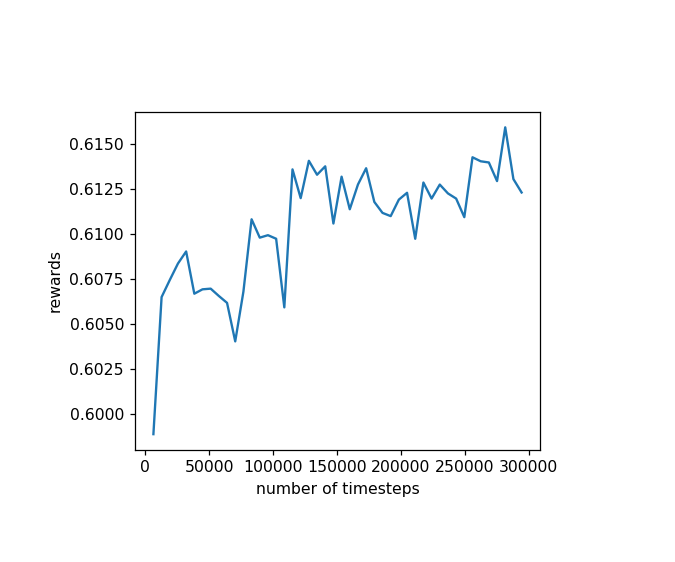

<IPython.core.display.Javascript object>


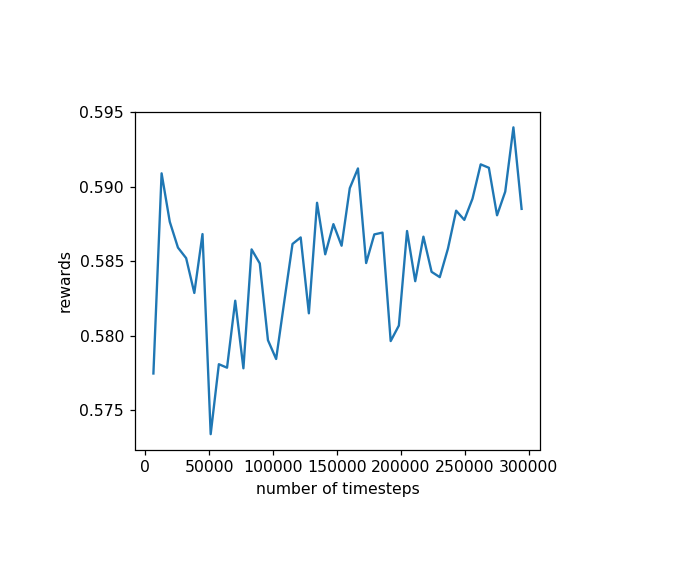

seed 2
seed 2: model definition ..
Using cuda device
seed 2: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cb93d0b8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cb90ff28>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cb93d0b8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cba0fa58>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarn

----------------------------------------
| time/                   |            |
|    fps                  | 153        |
|    iterations           | 1          |
|    time_elapsed         | 1          |
|    total_timesteps      | 256        |
| train/                  |            |
|    approx_kl            | 0.26795948 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.97       |
|    explained_variance   | 0.988      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 23440      |
|    policy_gradient_loss | -0.0957    |
|    std                  | 0.0897     |
|    value_loss           | 0.000363   |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 90           |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 66          |
|    iterations           | 12          |
|    time_elapsed         | 46          |
|    total_timesteps      | 3072        |
| train/                  |             |
|    approx_kl            | 0.039196894 |
|    clip_fraction        | 0.443       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.93        |
|    explained_variance   | 0.906       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.118      |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0864     |
|    std                  | 0.149       |
|    value_loss           | 0.00356     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 66         |
|    iterations           | 13         |
|    time_elapsed         | 50        

-----------------------------------------
| time/                   |             |
|    fps                  | 64          |
|    iterations           | 23          |
|    time_elapsed         | 91          |
|    total_timesteps      | 5888        |
| train/                  |             |
|    approx_kl            | 0.054405615 |
|    clip_fraction        | 0.431       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.95        |
|    explained_variance   | 0.885       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.117      |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.093      |
|    std                  | 0.149       |
|    value_loss           | 0.00287     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 64         |
|    iterations           | 24         |
|    time_elapsed         | 95        

---------------------------------------
| time/                   |           |
|    fps                  | 61        |
|    iterations           | 33        |
|    time_elapsed         | 137       |
|    total_timesteps      | 8448      |
| train/                  |           |
|    approx_kl            | 0.0601613 |
|    clip_fraction        | 0.473     |
|    clip_range           | 0.2       |
|    entropy_loss         | 1.96      |
|    explained_variance   | 0.921     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.132    |
|    n_updates            | 640       |
|    policy_gradient_loss | -0.0889   |
|    std                  | 0.148     |
|    value_loss           | 0.00181   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 34         |
|    time_elapsed         | 141        |
|    total_timesteps      | 8704   

----------------------------------------
| time/                   |            |
|    fps                  | 62         |
|    iterations           | 44         |
|    time_elapsed         | 179        |
|    total_timesteps      | 11264      |
| train/                  |            |
|    approx_kl            | 0.06502345 |
|    clip_fraction        | 0.537      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.98       |
|    explained_variance   | 0.924      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.133     |
|    n_updates            | 860        |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.147      |
|    value_loss           | 0.00157    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 45          |
|    time_elapsed         | 182         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 54         |
|    time_elapsed         | 227        |
|    total_timesteps      | 13824      |
| train/                  |            |
|    approx_kl            | 0.06828439 |
|    clip_fraction        | 0.506      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2          |
|    explained_variance   | 0.909      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 1060       |
|    policy_gradient_loss | -0.0966    |
|    std                  | 0.147      |
|    value_loss           | 0.00194    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 55         |
|    time_elapsed         | 231        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 65         |
|    time_elapsed         | 269        |
|    total_timesteps      | 16640      |
| train/                  |            |
|    approx_kl            | 0.09579684 |
|    clip_fraction        | 0.574      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.01       |
|    explained_variance   | 0.928      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 1280       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.146      |
|    value_loss           | 0.00158    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 66         |
|    time_elapsed         | 272        |
|    total_times

Eval num_timesteps=19200, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.51 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_rew

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 83        |
|    time_elapsed         | 370       |
|    total_timesteps      | 21248     |
| train/                  |           |
|    approx_kl            | 0.1061218 |
|    clip_fraction        | 0.487     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.04      |
|    explained_variance   | 0.9       |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0824   |
|    n_updates            | 1640      |
|    policy_gradient_loss | -0.0877   |
|    std                  | 0.145     |
|    value_loss           | 0.00172   |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 84          |
|    time_elapsed         | 374         |
|    total_timesteps      | 21

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 94          |
|    time_elapsed         | 411         |
|    total_timesteps      | 24064       |
| train/                  |             |
|    approx_kl            | 0.099681064 |
|    clip_fraction        | 0.528       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.06        |
|    explained_variance   | 0.947       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.112      |
|    n_updates            | 1860        |
|    policy_gradient_loss | -0.103      |
|    std                  | 0.145       |
|    value_loss           | 0.00151     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 95          |
|    time_elapsed         | 415   

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 105        |
|    time_elapsed         | 461        |
|    total_timesteps      | 26880      |
| train/                  |            |
|    approx_kl            | 0.13548113 |
|    clip_fraction        | 0.549      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.07       |
|    explained_variance   | 0.951      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.108     |
|    n_updates            | 2080       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.144      |
|    value_loss           | 0.00129    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 106        |
|    time_elapsed         | 465        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 116         |
|    time_elapsed         | 502         |
|    total_timesteps      | 29696       |
| train/                  |             |
|    approx_kl            | 0.053865816 |
|    clip_fraction        | 0.558       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.08        |
|    explained_variance   | 0.952       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.112      |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.0958     |
|    std                  | 0.144       |
|    value_loss           | 0.00133     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 117        |
|    time_elapsed         | 506       

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 127        |
|    time_elapsed         | 554        |
|    total_timesteps      | 32512      |
| train/                  |            |
|    approx_kl            | 0.06873866 |
|    clip_fraction        | 0.536      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.1        |
|    explained_variance   | 0.928      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0949    |
|    n_updates            | 2520       |
|    policy_gradient_loss | -0.0947    |
|    std                  | 0.143      |
|    value_loss           | 0.00151    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 128         |
|    time_elapsed         | 557         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 138        |
|    time_elapsed         | 595        |
|    total_timesteps      | 35328      |
| train/                  |            |
|    approx_kl            | 0.11691859 |
|    clip_fraction        | 0.541      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.11       |
|    explained_variance   | 0.945      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0875    |
|    n_updates            | 2740       |
|    policy_gradient_loss | -0.0838    |
|    std                  | 0.143      |
|    value_loss           | 0.00138    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 139        |
|    time_elapsed         | 598        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 149        |
|    time_elapsed         | 636        |
|    total_timesteps      | 38144      |
| train/                  |            |
|    approx_kl            | 0.04762791 |
|    clip_fraction        | 0.626      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.13       |
|    explained_variance   | 0.942      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.137     |
|    n_updates            | 2960       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.142      |
|    value_loss           | 0.00211    |
----------------------------------------
Eval num_timesteps=38400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.47 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, epi

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 157        |
|    time_elapsed         | 703        |
|    total_timesteps      | 40192      |
| train/                  |            |
|    approx_kl            | 0.10532484 |
|    clip_fraction        | 0.579      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.14       |
|    explained_variance   | 0.925      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 3120       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.142      |
|    value_loss           | 0.00145    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 158         |
|    time_elapsed         | 706         |
|    total_

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 168       |
|    time_elapsed         | 744       |
|    total_timesteps      | 43008     |
| train/                  |           |
|    approx_kl            | 0.1350896 |
|    clip_fraction        | 0.591     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.16      |
|    explained_variance   | 0.959     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.129    |
|    n_updates            | 3340      |
|    policy_gradient_loss | -0.098    |
|    std                  | 0.141     |
|    value_loss           | 0.0012    |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 169        |
|    time_elapsed         | 748        |
|    total_timesteps      | 43264  

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 179        |
|    time_elapsed         | 794        |
|    total_timesteps      | 45824      |
| train/                  |            |
|    approx_kl            | 0.07786597 |
|    clip_fraction        | 0.56       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.19       |
|    explained_variance   | 0.938      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.135     |
|    n_updates            | 3560       |
|    policy_gradient_loss | -0.0967    |
|    std                  | 0.14       |
|    value_loss           | 0.00152    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 180         |
|    time_elapsed         | 798         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 190        |
|    time_elapsed         | 835        |
|    total_timesteps      | 48640      |
| train/                  |            |
|    approx_kl            | 0.08871418 |
|    clip_fraction        | 0.611      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.2        |
|    explained_variance   | 0.942      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 3780       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.14       |
|    value_loss           | 0.00113    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 191         |
|    time_elapsed         | 839         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 201        |
|    time_elapsed         | 885        |
|    total_timesteps      | 51456      |
| train/                  |            |
|    approx_kl            | 0.08575066 |
|    clip_fraction        | 0.547      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.22       |
|    explained_variance   | 0.959      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.122     |
|    n_updates            | 4000       |
|    policy_gradient_loss | -0.0924    |
|    std                  | 0.139      |
|    value_loss           | 0.000953   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 202        |
|    time_elapsed         | 889        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 212        |
|    time_elapsed         | 926        |
|    total_timesteps      | 54272      |
| train/                  |            |
|    approx_kl            | 0.15600032 |
|    clip_fraction        | 0.637      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.25       |
|    explained_variance   | 0.963      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.135     |
|    n_updates            | 4220       |
|    policy_gradient_loss | -0.108     |
|    std                  | 0.138      |
|    value_loss           | 0.000985   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 213        |
|    time_elapsed         | 929        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 223        |
|    time_elapsed         | 967        |
|    total_timesteps      | 57088      |
| train/                  |            |
|    approx_kl            | 0.09314345 |
|    clip_fraction        | 0.595      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.27       |
|    explained_variance   | 0.941      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 4440       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.137      |
|    value_loss           | 0.00144    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 224        |
|    time_elapsed         | 971        |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 56        |
|    iterations           | 230       |
|    time_elapsed         | 1038      |
|    total_timesteps      | 58880     |
| train/                  |           |
|    approx_kl            | 0.1284817 |
|    clip_fraction        | 0.569     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.28      |
|    explained_variance   | 0.927     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.137    |
|    n_updates            | 4580      |
|    policy_gradient_loss | -0.0947   |
|    std                  | 0.137     |
|    value_loss           | 0.00141   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 231        |
|    time_elapsed         | 1041       |
|    total_timesteps      | 59136  

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 241        |
|    time_elapsed         | 1079       |
|    total_timesteps      | 61696      |
| train/                  |            |
|    approx_kl            | 0.13738036 |
|    clip_fraction        | 0.601      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.29       |
|    explained_variance   | 0.956      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 4800       |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.136      |
|    value_loss           | 0.00123    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 242         |
|    time_elapsed         | 1083        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 252        |
|    time_elapsed         | 1128       |
|    total_timesteps      | 64512      |
| train/                  |            |
|    approx_kl            | 0.17715503 |
|    clip_fraction        | 0.638      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.31       |
|    explained_variance   | 0.923      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 5020       |
|    policy_gradient_loss | -0.0972    |
|    std                  | 0.136      |
|    value_loss           | 0.00167    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 253        |
|    time_elapsed         | 1132       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 263       |
|    time_elapsed         | 1169      |
|    total_timesteps      | 67328     |
| train/                  |           |
|    approx_kl            | 0.1298646 |
|    clip_fraction        | 0.588     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.33      |
|    explained_variance   | 0.952     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.12     |
|    n_updates            | 5240      |
|    policy_gradient_loss | -0.0902   |
|    std                  | 0.135     |
|    value_loss           | 0.00118   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 264        |
|    time_elapsed         | 1173       |
|    total_timesteps      | 67584  

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 274        |
|    time_elapsed         | 1210       |
|    total_timesteps      | 70144      |
| train/                  |            |
|    approx_kl            | 0.14540093 |
|    clip_fraction        | 0.613      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.35       |
|    explained_variance   | 0.959      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 5460       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.134      |
|    value_loss           | 0.00105    |
----------------------------------------
Eval num_timesteps=70400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=70400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/   

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 285        |
|    time_elapsed         | 1259       |
|    total_timesteps      | 72960      |
| train/                  |            |
|    approx_kl            | 0.08136338 |
|    clip_fraction        | 0.63       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.37       |
|    explained_variance   | 0.966      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 5680       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.134      |
|    value_loss           | 0.000956   |
----------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 57       |
|    iterations           | 286      |
|    time_elapsed         | 1263     |
|    total_timesteps      

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 296        |
|    time_elapsed         | 1300       |
|    total_timesteps      | 75776      |
| train/                  |            |
|    approx_kl            | 0.10349079 |
|    clip_fraction        | 0.613      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.38       |
|    explained_variance   | 0.956      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0716    |
|    n_updates            | 5900       |
|    policy_gradient_loss | -0.0937    |
|    std                  | 0.133      |
|    value_loss           | 0.00101    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 297         |
|    time_elapsed         | 1304        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 303        |
|    time_elapsed         | 1366       |
|    total_timesteps      | 77568      |
| train/                  |            |
|    approx_kl            | 0.08528364 |
|    clip_fraction        | 0.559      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.39       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.051     |
|    n_updates            | 6040       |
|    policy_gradient_loss | -0.0921    |
|    std                  | 0.133      |
|    value_loss           | 0.000897   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 304        |
|    time_elapsed         | 1370       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 314        |
|    time_elapsed         | 1407       |
|    total_timesteps      | 80384      |
| train/                  |            |
|    approx_kl            | 0.14753976 |
|    clip_fraction        | 0.608      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.41       |
|    explained_variance   | 0.952      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.122     |
|    n_updates            | 6260       |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.132      |
|    value_loss           | 0.00108    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 315       |
|    time_elapsed         | 1411      |
|    total_timesteps 

Eval num_timesteps=83200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=83200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.59       |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 325        |
|    time_elapsed         | 1455       |
|    total_timesteps      | 83200      |
| train/                  |            |
|    approx_kl            | 0.18418846 |
|    clip_fraction        | 0.676      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.43       |
|    explained_variance   | 0.949      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0913    |
|    n_updates            | 6480       |
|    policy_gradient_loss | -0.106     |
|    std                  | 0.132      |
|    value

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 336       |
|    time_elapsed         | 1496      |
|    total_timesteps      | 86016     |
| train/                  |           |
|    approx_kl            | 0.1583518 |
|    clip_fraction        | 0.601     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.45      |
|    explained_variance   | 0.944     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.151    |
|    n_updates            | 6700      |
|    policy_gradient_loss | -0.101    |
|    std                  | 0.131     |
|    value_loss           | 0.00104   |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 337         |
|    time_elapsed         | 1500        |
|    total_timesteps      | 86

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 347        |
|    time_elapsed         | 1538       |
|    total_timesteps      | 88832      |
| train/                  |            |
|    approx_kl            | 0.14338706 |
|    clip_fraction        | 0.597      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.46       |
|    explained_variance   | 0.926      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0902    |
|    n_updates            | 6920       |
|    policy_gradient_loss | -0.0951    |
|    std                  | 0.131      |
|    value_loss           | 0.00116    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 348         |
|    time_elapsed         | 1541        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 358        |
|    time_elapsed         | 1587       |
|    total_timesteps      | 91648      |
| train/                  |            |
|    approx_kl            | 0.19099897 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.49       |
|    explained_variance   | 0.947      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 7140       |
|    policy_gradient_loss | -0.0983    |
|    std                  | 0.13       |
|    value_loss           | 0.00107    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 359       |
|    time_elapsed         | 1591      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 369        |
|    time_elapsed         | 1628       |
|    total_timesteps      | 94464      |
| train/                  |            |
|    approx_kl            | 0.12833796 |
|    clip_fraction        | 0.633      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.51       |
|    explained_variance   | 0.932      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 7360       |
|    policy_gradient_loss | -0.0985    |
|    std                  | 0.129      |
|    value_loss           | 0.00143    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 370        |
|    time_elapsed         | 1631       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 377        |
|    time_elapsed         | 1685       |
|    total_timesteps      | 96512      |
| train/                  |            |
|    approx_kl            | 0.18260187 |
|    clip_fraction        | 0.648      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.52       |
|    explained_variance   | 0.954      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.128     |
|    n_updates            | 7520       |
|    policy_gradient_loss | -0.095     |
|    std                  | 0.129      |
|    value_loss           | 0.0013     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 378        |
|    time_elapsed         | 1689       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 388         |
|    time_elapsed         | 1726        |
|    total_timesteps      | 99328       |
| train/                  |             |
|    approx_kl            | 0.076863825 |
|    clip_fraction        | 0.652       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.53        |
|    explained_variance   | 0.954       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.138      |
|    n_updates            | 7740        |
|    policy_gradient_loss | -0.109      |
|    std                  | 0.128       |
|    value_loss           | 0.000989    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 389        |
|    time_elapsed         | 1730      

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 399        |
|    time_elapsed         | 1767       |
|    total_timesteps      | 102144     |
| train/                  |            |
|    approx_kl            | 0.07498231 |
|    clip_fraction        | 0.63       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.55       |
|    explained_variance   | 0.947      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.131     |
|    n_updates            | 7960       |
|    policy_gradient_loss | -0.0957    |
|    std                  | 0.128      |
|    value_loss           | 0.00121    |
----------------------------------------
Eval num_timesteps=102400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=102400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/ 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 410        |
|    time_elapsed         | 1816       |
|    total_timesteps      | 104960     |
| train/                  |            |
|    approx_kl            | 0.11189942 |
|    clip_fraction        | 0.626      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.57       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 8180       |
|    policy_gradient_loss | -0.0904    |
|    std                  | 0.127      |
|    value_loss           | 0.000679   |
----------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 57       |
|    iterations           | 411      |
|    time_elapsed         | 1819     |
|    total_timesteps      

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 421        |
|    time_elapsed         | 1857       |
|    total_timesteps      | 107776     |
| train/                  |            |
|    approx_kl            | 0.18480733 |
|    clip_fraction        | 0.671      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.58       |
|    explained_variance   | 0.94       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0984    |
|    n_updates            | 8400       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.127      |
|    value_loss           | 0.00108    |
----------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 58       |
|    iterations           | 422      |
|    time_elapsed         | 1860     |
|    total_timesteps      

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 432         |
|    time_elapsed         | 1906        |
|    total_timesteps      | 110592      |
| train/                  |             |
|    approx_kl            | 0.098098055 |
|    clip_fraction        | 0.672       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.6         |
|    explained_variance   | 0.959       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.113      |
|    n_updates            | 8620        |
|    policy_gradient_loss | -0.0976     |
|    std                  | 0.126       |
|    value_loss           | 0.00111     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 433        |
|    time_elapsed         | 1909      

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 443        |
|    time_elapsed         | 1947       |
|    total_timesteps      | 113408     |
| train/                  |            |
|    approx_kl            | 0.14062558 |
|    clip_fraction        | 0.622      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.62       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 8840       |
|    policy_gradient_loss | -0.096     |
|    std                  | 0.126      |
|    value_loss           | 0.000797   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 444        |
|    time_elapsed         | 1950       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 451        |
|    time_elapsed         | 2006       |
|    total_timesteps      | 115456     |
| train/                  |            |
|    approx_kl            | 0.11697525 |
|    clip_fraction        | 0.66       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.63       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 9000       |
|    policy_gradient_loss | -0.0975    |
|    std                  | 0.125      |
|    value_loss           | 0.00103    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 452        |
|    time_elapsed         | 2010       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 462        |
|    time_elapsed         | 2048       |
|    total_timesteps      | 118272     |
| train/                  |            |
|    approx_kl            | 0.21411304 |
|    clip_fraction        | 0.655      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.66       |
|    explained_variance   | 0.957      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 9220       |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.125      |
|    value_loss           | 0.000983   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 463        |
|    time_elapsed         | 2051       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 473        |
|    time_elapsed         | 2089       |
|    total_timesteps      | 121088     |
| train/                  |            |
|    approx_kl            | 0.19415857 |
|    clip_fraction        | 0.69       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.67       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0989    |
|    n_updates            | 9440       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.124      |
|    value_loss           | 0.00086    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 474        |
|    time_elapsed         | 2092       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 484        |
|    time_elapsed         | 2137       |
|    total_timesteps      | 123904     |
| train/                  |            |
|    approx_kl            | 0.15875289 |
|    clip_fraction        | 0.625      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.69       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 9660       |
|    policy_gradient_loss | -0.0964    |
|    std                  | 0.124      |
|    value_loss           | 0.000829   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 485        |
|    time_elapsed         | 2141       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 495        |
|    time_elapsed         | 2178       |
|    total_timesteps      | 126720     |
| train/                  |            |
|    approx_kl            | 0.22196577 |
|    clip_fraction        | 0.679      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.71       |
|    explained_variance   | 0.962      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 9880       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.123      |
|    value_loss           | 0.000965   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 496        |
|    time_elapsed         | 2182       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 506        |
|    time_elapsed         | 2227       |
|    total_timesteps      | 129536     |
| train/                  |            |
|    approx_kl            | 0.17339343 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.73       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.13      |
|    n_updates            | 10100      |
|    policy_gradient_loss | -0.111     |
|    std                  | 0.122      |
|    value_loss           | 0.000893   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 507       |
|    time_elapsed         | 2231      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 517        |
|    time_elapsed         | 2268       |
|    total_timesteps      | 132352     |
| train/                  |            |
|    approx_kl            | 0.17702022 |
|    clip_fraction        | 0.618      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.75       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.106     |
|    n_updates            | 10320      |
|    policy_gradient_loss | -0.0944    |
|    std                  | 0.122      |
|    value_loss           | 0.000731   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 518        |
|    time_elapsed         | 2272       |
|    total_times

Eval num_timesteps=134400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=134400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=134400, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=134400, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=134400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.587      |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 525        |
|    time_elapsed         | 2330       |
|    total_timesteps      | 134400     |
| train/                  |            |
|    approx_kl            | 0.19797072 |
|    clip_fraction        | 0.667      |
|    clip_ra

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 535        |
|    time_elapsed         | 2368       |
|    total_timesteps      | 136960     |
| train/                  |            |
|    approx_kl            | 0.12429883 |
|    clip_fraction        | 0.672      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.78       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 10680      |
|    policy_gradient_loss | -0.098     |
|    std                  | 0.121      |
|    value_loss           | 0.00115    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 536        |
|    time_elapsed         | 2372       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 546        |
|    time_elapsed         | 2409       |
|    total_timesteps      | 139776     |
| train/                  |            |
|    approx_kl            | 0.20132338 |
|    clip_fraction        | 0.671      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.8        |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.134     |
|    n_updates            | 10900      |
|    policy_gradient_loss | -0.0966    |
|    std                  | 0.12       |
|    value_loss           | 0.000967   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 547        |
|    time_elapsed         | 2413       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 557       |
|    time_elapsed         | 2460      |
|    total_timesteps      | 142592    |
| train/                  |           |
|    approx_kl            | 0.1742975 |
|    clip_fraction        | 0.643     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.82      |
|    explained_variance   | 0.977     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.111    |
|    n_updates            | 11120     |
|    policy_gradient_loss | -0.101    |
|    std                  | 0.12      |
|    value_loss           | 0.000734  |
---------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 57       |
|    iterations           | 558      |
|    time_elapsed         | 2463     |
|    total_timesteps      | 142848   |
| trai

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 568        |
|    time_elapsed         | 2501       |
|    total_timesteps      | 145408     |
| train/                  |            |
|    approx_kl            | 0.19947135 |
|    clip_fraction        | 0.655      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.83       |
|    explained_variance   | 0.965      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.131     |
|    n_updates            | 11340      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.119      |
|    value_loss           | 0.000717   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 569        |
|    time_elapsed         | 2505       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 579        |
|    time_elapsed         | 2551       |
|    total_timesteps      | 148224     |
| train/                  |            |
|    approx_kl            | 0.14967148 |
|    clip_fraction        | 0.628      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.86       |
|    explained_variance   | 0.966      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.137     |
|    n_updates            | 11560      |
|    policy_gradient_loss | -0.097     |
|    std                  | 0.118      |
|    value_loss           | 0.000866   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 580        |
|    time_elapsed         | 2555       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 590        |
|    time_elapsed         | 2593       |
|    total_timesteps      | 151040     |
| train/                  |            |
|    approx_kl            | 0.07264364 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.88       |
|    explained_variance   | 0.97       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0982    |
|    n_updates            | 11780      |
|    policy_gradient_loss | -0.0989    |
|    std                  | 0.118      |
|    value_loss           | 0.000894   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 591       |
|    time_elapsed         | 2596      |
|    total_timesteps 

Eval num_timesteps=153600, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.51 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.55 +/- 0.0

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 608         |
|    time_elapsed         | 2685        |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.117346846 |
|    clip_fraction        | 0.666       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.91        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.112      |
|    n_updates            | 12140       |
|    policy_gradient_loss | -0.0999     |
|    std                  | 0.117       |
|    value_loss           | 0.000758    |
-----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 609       |
|    time_elapsed         | 2689      |
| 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 619        |
|    time_elapsed         | 2726       |
|    total_timesteps      | 158464     |
| train/                  |            |
|    approx_kl            | 0.15997736 |
|    clip_fraction        | 0.614      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.93       |
|    explained_variance   | 0.966      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0673    |
|    n_updates            | 12360      |
|    policy_gradient_loss | -0.0968    |
|    std                  | 0.116      |
|    value_loss           | 0.000724   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 620        |
|    time_elapsed         | 2730       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 630        |
|    time_elapsed         | 2775       |
|    total_timesteps      | 161280     |
| train/                  |            |
|    approx_kl            | 0.16880092 |
|    clip_fraction        | 0.667      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.95       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.131     |
|    n_updates            | 12580      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.116      |
|    value_loss           | 0.000491   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 631        |
|    time_elapsed         | 2779       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 641        |
|    time_elapsed         | 2816       |
|    total_timesteps      | 164096     |
| train/                  |            |
|    approx_kl            | 0.14777754 |
|    clip_fraction        | 0.681      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.97       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 12800      |
|    policy_gradient_loss | -0.107     |
|    std                  | 0.115      |
|    value_loss           | 0.000645   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 642        |
|    time_elapsed         | 2820       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 652        |
|    time_elapsed         | 2865       |
|    total_timesteps      | 166912     |
| train/                  |            |
|    approx_kl            | 0.28668094 |
|    clip_fraction        | 0.705      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.99       |
|    explained_variance   | 0.966      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0918    |
|    n_updates            | 13020      |
|    policy_gradient_loss | -0.0905    |
|    std                  | 0.115      |
|    value_loss           | 0.000903   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 653        |
|    time_elapsed         | 2869       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 663        |
|    time_elapsed         | 2906       |
|    total_timesteps      | 169728     |
| train/                  |            |
|    approx_kl            | 0.31143233 |
|    clip_fraction        | 0.718      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.01       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.103     |
|    n_updates            | 13240      |
|    policy_gradient_loss | -0.106     |
|    std                  | 0.114      |
|    value_loss           | 0.000667   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 664        |
|    time_elapsed         | 2910       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 674        |
|    time_elapsed         | 2948       |
|    total_timesteps      | 172544     |
| train/                  |            |
|    approx_kl            | 0.25135335 |
|    clip_fraction        | 0.642      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.02       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.145     |
|    n_updates            | 13460      |
|    policy_gradient_loss | -0.0918    |
|    std                  | 0.114      |
|    value_loss           | 0.000655   |
----------------------------------------
Eval num_timesteps=172800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.48 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.58 +/

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 682        |
|    time_elapsed         | 2997       |
|    total_timesteps      | 174592     |
| train/                  |            |
|    approx_kl            | 0.23125793 |
|    clip_fraction        | 0.683      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.04       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.137     |
|    n_updates            | 13620      |
|    policy_gradient_loss | -0.0971    |
|    std                  | 0.113      |
|    value_loss           | 0.000737   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 683       |
|    time_elapsed         | 3001      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 693        |
|    time_elapsed         | 3039       |
|    total_timesteps      | 177408     |
| train/                  |            |
|    approx_kl            | 0.20723248 |
|    clip_fraction        | 0.662      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.05       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 13840      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.113      |
|    value_loss           | 0.000798   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 694        |
|    time_elapsed         | 3043       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 704        |
|    time_elapsed         | 3088       |
|    total_timesteps      | 180224     |
| train/                  |            |
|    approx_kl            | 0.24176678 |
|    clip_fraction        | 0.697      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.07       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 14060      |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.112      |
|    value_loss           | 0.00076    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 705        |
|    time_elapsed         | 3092       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 715        |
|    time_elapsed         | 3129       |
|    total_timesteps      | 183040     |
| train/                  |            |
|    approx_kl            | 0.23289067 |
|    clip_fraction        | 0.664      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.09       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 14280      |
|    policy_gradient_loss | -0.0896    |
|    std                  | 0.112      |
|    value_loss           | 0.000525   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 716        |
|    time_elapsed         | 3133       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 726        |
|    time_elapsed         | 3178       |
|    total_timesteps      | 185856     |
| train/                  |            |
|    approx_kl            | 0.15074041 |
|    clip_fraction        | 0.659      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.11       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 14500      |
|    policy_gradient_loss | -0.0969    |
|    std                  | 0.111      |
|    value_loss           | 0.000601   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 727       |
|    time_elapsed         | 3182      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 737        |
|    time_elapsed         | 3220       |
|    total_timesteps      | 188672     |
| train/                  |            |
|    approx_kl            | 0.19855508 |
|    clip_fraction        | 0.657      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.13       |
|    explained_variance   | 0.958      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 14720      |
|    policy_gradient_loss | -0.0922    |
|    std                  | 0.111      |
|    value_loss           | 0.00082    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 738        |
|    time_elapsed         | 3223       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 748       |
|    time_elapsed         | 3261      |
|    total_timesteps      | 191488    |
| train/                  |           |
|    approx_kl            | 0.1877195 |
|    clip_fraction        | 0.699     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.14      |
|    explained_variance   | 0.969     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.119    |
|    n_updates            | 14940     |
|    policy_gradient_loss | -0.105    |
|    std                  | 0.11      |
|    value_loss           | 0.000789  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 749       |
|    time_elapsed         | 3265      |
|    total_timesteps      | 191744    |


----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 756        |
|    time_elapsed         | 3307       |
|    total_timesteps      | 193536     |
| train/                  |            |
|    approx_kl            | 0.24670537 |
|    clip_fraction        | 0.684      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.16       |
|    explained_variance   | 0.96       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 15100      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.11       |
|    value_loss           | 0.000976   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 757        |
|    time_elapsed         | 3311       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 767       |
|    time_elapsed         | 3348      |
|    total_timesteps      | 196352    |
| train/                  |           |
|    approx_kl            | 0.2693516 |
|    clip_fraction        | 0.643     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.17      |
|    explained_variance   | 0.976     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0918   |
|    n_updates            | 15320     |
|    policy_gradient_loss | -0.0886   |
|    std                  | 0.109     |
|    value_loss           | 0.000782  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 768        |
|    time_elapsed         | 3352       |
|    total_timesteps      | 196608 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 778        |
|    time_elapsed         | 3397       |
|    total_timesteps      | 199168     |
| train/                  |            |
|    approx_kl            | 0.18749872 |
|    clip_fraction        | 0.704      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.19       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 15540      |
|    policy_gradient_loss | -0.098     |
|    std                  | 0.109      |
|    value_loss           | 0.000595   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 779        |
|    time_elapsed         | 3401       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 789       |
|    time_elapsed         | 3438      |
|    total_timesteps      | 201984    |
| train/                  |           |
|    approx_kl            | 0.3062024 |
|    clip_fraction        | 0.728     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.21      |
|    explained_variance   | 0.981     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.135    |
|    n_updates            | 15760     |
|    policy_gradient_loss | -0.108    |
|    std                  | 0.108     |
|    value_loss           | 0.00053   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 790       |
|    time_elapsed         | 3442      |
|    total_timesteps      | 202240    |


Eval num_timesteps=204800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=204800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 5         |
|    mean_reward          | 0.593     |
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 800       |
|    time_elapsed         | 3489      |
|    total_timesteps      | 204800    |
| train/                  |           |
|    approx_kl            | 0.3370076 |
|    clip_fraction        | 0.676     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.23      |
|    explained_variance   | 0.98      |
|    learning_rate        | 1e-05     |
|    loss                 | -0.112    |
|    n_updates            | 15980     |
|    policy_gradient_loss | -0.105    |
|    std                  | 0.108     |
|    v

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 811        |
|    time_elapsed         | 3530       |
|    total_timesteps      | 207616     |
| train/                  |            |
|    approx_kl            | 0.24956329 |
|    clip_fraction        | 0.655      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.25       |
|    explained_variance   | 0.968      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0818    |
|    n_updates            | 16200      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.107      |
|    value_loss           | 0.000814   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 812        |
|    time_elapsed         | 3534       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 822        |
|    time_elapsed         | 3571       |
|    total_timesteps      | 210432     |
| train/                  |            |
|    approx_kl            | 0.19419807 |
|    clip_fraction        | 0.682      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.27       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 16420      |
|    policy_gradient_loss | -0.0998    |
|    std                  | 0.107      |
|    value_loss           | 0.000576   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 823       |
|    time_elapsed         | 3575      |
|    total_timesteps 

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 830       |
|    time_elapsed         | 3620      |
|    total_timesteps      | 212480    |
| train/                  |           |
|    approx_kl            | 0.1722634 |
|    clip_fraction        | 0.68      |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.29      |
|    explained_variance   | 0.975     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.135    |
|    n_updates            | 16580     |
|    policy_gradient_loss | -0.102    |
|    std                  | 0.106     |
|    value_loss           | 0.000663  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 831       |
|    time_elapsed         | 3624      |
|    total_timesteps      | 212736    |


----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 841        |
|    time_elapsed         | 3661       |
|    total_timesteps      | 215296     |
| train/                  |            |
|    approx_kl            | 0.26445872 |
|    clip_fraction        | 0.672      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.31       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0291    |
|    n_updates            | 16800      |
|    policy_gradient_loss | -0.0925    |
|    std                  | 0.106      |
|    value_loss           | 0.000973   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 842        |
|    time_elapsed         | 3665       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 852        |
|    time_elapsed         | 3710       |
|    total_timesteps      | 218112     |
| train/                  |            |
|    approx_kl            | 0.22821495 |
|    clip_fraction        | 0.673      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.33       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0883    |
|    n_updates            | 17020      |
|    policy_gradient_loss | -0.0918    |
|    std                  | 0.105      |
|    value_loss           | 0.000706   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 853        |
|    time_elapsed         | 3714       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 863        |
|    time_elapsed         | 3751       |
|    total_timesteps      | 220928     |
| train/                  |            |
|    approx_kl            | 0.25791872 |
|    clip_fraction        | 0.666      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.35       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 17240      |
|    policy_gradient_loss | -0.0943    |
|    std                  | 0.105      |
|    value_loss           | 0.000854   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 864        |
|    time_elapsed         | 3755       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 874        |
|    time_elapsed         | 3792       |
|    total_timesteps      | 223744     |
| train/                  |            |
|    approx_kl            | 0.21005939 |
|    clip_fraction        | 0.687      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.37       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 17460      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.104      |
|    value_loss           | 0.000601   |
----------------------------------------
Eval num_timesteps=224000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=224000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/ 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 885        |
|    time_elapsed         | 3841       |
|    total_timesteps      | 226560     |
| train/                  |            |
|    approx_kl            | 0.18523696 |
|    clip_fraction        | 0.675      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.39       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0885    |
|    n_updates            | 17680      |
|    policy_gradient_loss | -0.0952    |
|    std                  | 0.104      |
|    value_loss           | 0.000785   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 886        |
|    time_elapsed         | 3845       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 896        |
|    time_elapsed         | 3883       |
|    total_timesteps      | 229376     |
| train/                  |            |
|    approx_kl            | 0.34597638 |
|    clip_fraction        | 0.683      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.42       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 17900      |
|    policy_gradient_loss | -0.0968    |
|    std                  | 0.103      |
|    value_loss           | 0.000602   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 897        |
|    time_elapsed         | 3886       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 904        |
|    time_elapsed         | 3937       |
|    total_timesteps      | 231424     |
| train/                  |            |
|    approx_kl            | 0.25852203 |
|    clip_fraction        | 0.723      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.43       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.128     |
|    n_updates            | 18060      |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.103      |
|    value_loss           | 0.000655   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 905        |
|    time_elapsed         | 3940       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 915       |
|    time_elapsed         | 3978      |
|    total_timesteps      | 234240    |
| train/                  |           |
|    approx_kl            | 0.2712754 |
|    clip_fraction        | 0.671     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.45      |
|    explained_variance   | 0.981     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.118    |
|    n_updates            | 18280     |
|    policy_gradient_loss | -0.096    |
|    std                  | 0.102     |
|    value_loss           | 0.000702  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 916        |
|    time_elapsed         | 3982       |
|    total_timesteps      | 234496 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 926        |
|    time_elapsed         | 4027       |
|    total_timesteps      | 237056     |
| train/                  |            |
|    approx_kl            | 0.17497852 |
|    clip_fraction        | 0.703      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.47       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.101     |
|    n_updates            | 18500      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.102      |
|    value_loss           | 0.000662   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 927       |
|    time_elapsed         | 4031      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 937        |
|    time_elapsed         | 4068       |
|    total_timesteps      | 239872     |
| train/                  |            |
|    approx_kl            | 0.23464522 |
|    clip_fraction        | 0.676      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.5        |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 18720      |
|    policy_gradient_loss | -0.0969    |
|    std                  | 0.101      |
|    value_loss           | 0.000629   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 938       |
|    time_elapsed         | 4071      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 948        |
|    time_elapsed         | 4109       |
|    total_timesteps      | 242688     |
| train/                  |            |
|    approx_kl            | 0.17298448 |
|    clip_fraction        | 0.695      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.51       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.121     |
|    n_updates            | 18940      |
|    policy_gradient_loss | -0.0938    |
|    std                  | 0.101      |
|    value_loss           | 0.000558   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 949        |
|    time_elapsed         | 4113       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 959       |
|    time_elapsed         | 4158      |
|    total_timesteps      | 245504    |
| train/                  |           |
|    approx_kl            | 0.2861306 |
|    clip_fraction        | 0.647     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.53      |
|    explained_variance   | 0.967     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.109    |
|    n_updates            | 19160     |
|    policy_gradient_loss | -0.0884   |
|    std                  | 0.1       |
|    value_loss           | 0.000831  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 960        |
|    time_elapsed         | 4162       |
|    total_timesteps      | 245760 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 970        |
|    time_elapsed         | 4199       |
|    total_timesteps      | 248320     |
| train/                  |            |
|    approx_kl            | 0.24394678 |
|    clip_fraction        | 0.672      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.55       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 19380      |
|    policy_gradient_loss | -0.0959    |
|    std                  | 0.0996     |
|    value_loss           | 0.000673   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 971       |
|    time_elapsed         | 4203      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 978        |
|    time_elapsed         | 4247       |
|    total_timesteps      | 250368     |
| train/                  |            |
|    approx_kl            | 0.23257618 |
|    clip_fraction        | 0.707      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.56       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 19540      |
|    policy_gradient_loss | -0.0961    |
|    std                  | 0.0993     |
|    value_loss           | 0.000575   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 979        |
|    time_elapsed         | 4251       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 989        |
|    time_elapsed         | 4288       |
|    total_timesteps      | 253184     |
| train/                  |            |
|    approx_kl            | 0.22586042 |
|    clip_fraction        | 0.691      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.58       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 19760      |
|    policy_gradient_loss | -0.0985    |
|    std                  | 0.0988     |
|    value_loss           | 0.000679   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 990        |
|    time_elapsed         | 4292       |
|    total_times

Eval num_timesteps=256000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=256000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.586      |
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1000       |
|    time_elapsed         | 4337       |
|    total_timesteps      | 256000     |
| train/                  |            |
|    approx_kl            | 0.25763935 |
|    clip_fraction        | 0.708      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.6        |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 19980      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.0985     |
|    val

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1011       |
|    time_elapsed         | 4379       |
|    total_timesteps      | 258816     |
| train/                  |            |
|    approx_kl            | 0.23086086 |
|    clip_fraction        | 0.696      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.62       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0742    |
|    n_updates            | 20200      |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.098      |
|    value_loss           | 0.000718   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1012       |
|    time_elapsed         | 4382       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1022      |
|    time_elapsed         | 4421      |
|    total_timesteps      | 261632    |
| train/                  |           |
|    approx_kl            | 0.2049787 |
|    clip_fraction        | 0.703     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.64      |
|    explained_variance   | 0.98      |
|    learning_rate        | 1e-05     |
|    loss                 | -0.121    |
|    n_updates            | 20420     |
|    policy_gradient_loss | -0.105    |
|    std                  | 0.0974    |
|    value_loss           | 0.000609  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1023      |
|    time_elapsed         | 4424      |
|    total_timesteps      | 261888    |


----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1033       |
|    time_elapsed         | 4471       |
|    total_timesteps      | 264448     |
| train/                  |            |
|    approx_kl            | 0.25529647 |
|    clip_fraction        | 0.636      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.66       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0997    |
|    n_updates            | 20640      |
|    policy_gradient_loss | -0.0841    |
|    std                  | 0.097      |
|    value_loss           | 0.000567   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1034       |
|    time_elapsed         | 4475       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1044      |
|    time_elapsed         | 4514      |
|    total_timesteps      | 267264    |
| train/                  |           |
|    approx_kl            | 0.1874277 |
|    clip_fraction        | 0.671     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.68      |
|    explained_variance   | 0.982     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.138    |
|    n_updates            | 20860     |
|    policy_gradient_loss | -0.101    |
|    std                  | 0.0965    |
|    value_loss           | 0.000522  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1045      |
|    time_elapsed         | 4518      |
|    total_timesteps      | 267520    |


----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1052       |
|    time_elapsed         | 4564       |
|    total_timesteps      | 269312     |
| train/                  |            |
|    approx_kl            | 0.27725178 |
|    clip_fraction        | 0.696      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.69       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0976    |
|    n_updates            | 21020      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.0961     |
|    value_loss           | 0.000628   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1053       |
|    time_elapsed         | 4568       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1063       |
|    time_elapsed         | 4605       |
|    total_timesteps      | 272128     |
| train/                  |            |
|    approx_kl            | 0.25651747 |
|    clip_fraction        | 0.701      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.71       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.132     |
|    n_updates            | 21240      |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.0957     |
|    value_loss           | 0.000642   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1064       |
|    time_elapsed         | 4609       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1074       |
|    time_elapsed         | 4647       |
|    total_timesteps      | 274944     |
| train/                  |            |
|    approx_kl            | 0.20696291 |
|    clip_fraction        | 0.741      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.73       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 21460      |
|    policy_gradient_loss | -0.106     |
|    std                  | 0.0952     |
|    value_loss           | 0.000682   |
----------------------------------------
Eval num_timesteps=275200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=275200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
---------------------------------------
| eval/  

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1085      |
|    time_elapsed         | 4697      |
|    total_timesteps      | 277760    |
| train/                  |           |
|    approx_kl            | 0.2178095 |
|    clip_fraction        | 0.671     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.75      |
|    explained_variance   | 0.966     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0663   |
|    n_updates            | 21680     |
|    policy_gradient_loss | -0.0886   |
|    std                  | 0.0947    |
|    value_loss           | 0.000698  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1086       |
|    time_elapsed         | 4701       |
|    total_timesteps      | 278016 

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1096      |
|    time_elapsed         | 4740      |
|    total_timesteps      | 280576    |
| train/                  |           |
|    approx_kl            | 0.2943394 |
|    clip_fraction        | 0.738     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.77      |
|    explained_variance   | 0.982     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.141    |
|    n_updates            | 21900     |
|    policy_gradient_loss | -0.109    |
|    std                  | 0.0943    |
|    value_loss           | 0.000626  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1097       |
|    time_elapsed         | 4744       |
|    total_timesteps      | 280832 

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1107      |
|    time_elapsed         | 4791      |
|    total_timesteps      | 283392    |
| train/                  |           |
|    approx_kl            | 0.2716776 |
|    clip_fraction        | 0.659     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.79      |
|    explained_variance   | 0.984     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0554   |
|    n_updates            | 22120     |
|    policy_gradient_loss | -0.0893   |
|    std                  | 0.0939    |
|    value_loss           | 0.000499  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1108      |
|    time_elapsed         | 4795      |
|    total_timesteps      | 283648    |


----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1118       |
|    time_elapsed         | 4835       |
|    total_timesteps      | 286208     |
| train/                  |            |
|    approx_kl            | 0.29194155 |
|    clip_fraction        | 0.712      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.81       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 22340      |
|    policy_gradient_loss | -0.0986    |
|    std                  | 0.0933     |
|    value_loss           | 0.000563   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1119       |
|    time_elapsed         | 4839       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1126       |
|    time_elapsed         | 4889       |
|    total_timesteps      | 288256     |
| train/                  |            |
|    approx_kl            | 0.24182454 |
|    clip_fraction        | 0.708      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.82       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 22500      |
|    policy_gradient_loss | -0.0986    |
|    std                  | 0.093      |
|    value_loss           | 0.000704   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1127       |
|    time_elapsed         | 4893       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1137       |
|    time_elapsed         | 4933       |
|    total_timesteps      | 291072     |
| train/                  |            |
|    approx_kl            | 0.21406586 |
|    clip_fraction        | 0.683      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.84       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.127     |
|    n_updates            | 22720      |
|    policy_gradient_loss | -0.0964    |
|    std                  | 0.0926     |
|    value_loss           | 0.000618   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1138       |
|    time_elapsed         | 4937       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1148       |
|    time_elapsed         | 4977       |
|    total_timesteps      | 293888     |
| train/                  |            |
|    approx_kl            | 0.18219364 |
|    clip_fraction        | 0.726      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.87       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.145     |
|    n_updates            | 22940      |
|    policy_gradient_loss | -0.11      |
|    std                  | 0.092      |
|    value_loss           | 0.000581   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1149      |
|    time_elapsed         | 4981      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1159       |
|    time_elapsed         | 5029       |
|    total_timesteps      | 296704     |
| train/                  |            |
|    approx_kl            | 0.21552864 |
|    clip_fraction        | 0.682      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.89       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 23160      |
|    policy_gradient_loss | -0.0958    |
|    std                  | 0.0915     |
|    value_loss           | 0.0007     |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 1160      |
|    time_elapsed         | 5033      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1170       |
|    time_elapsed         | 5074       |
|    total_timesteps      | 299520     |
| train/                  |            |
|    approx_kl            | 0.33969557 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.91       |
|    explained_variance   | 0.987      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.102     |
|    n_updates            | 23380      |
|    policy_gradient_loss | -0.0995    |
|    std                  | 0.0911     |
|    value_loss           | 0.000524   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1171       |
|    time_elapsed         | 5078       |
|    total_times

<IPython.core.display.Javascript object>


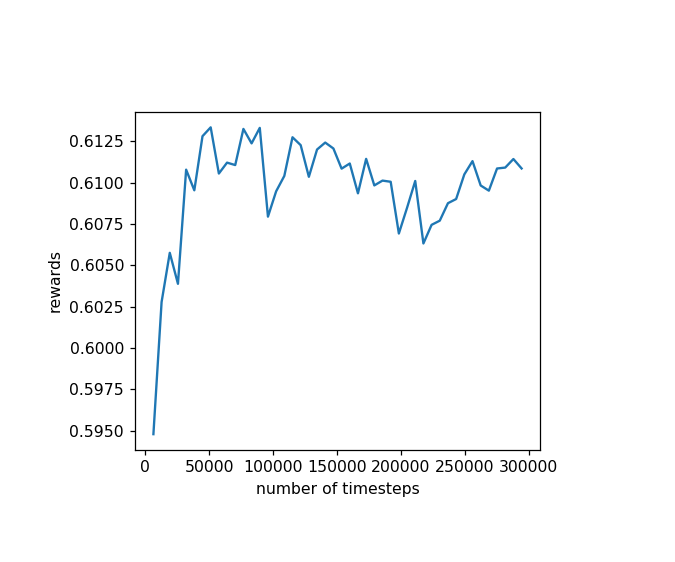

<IPython.core.display.Javascript object>


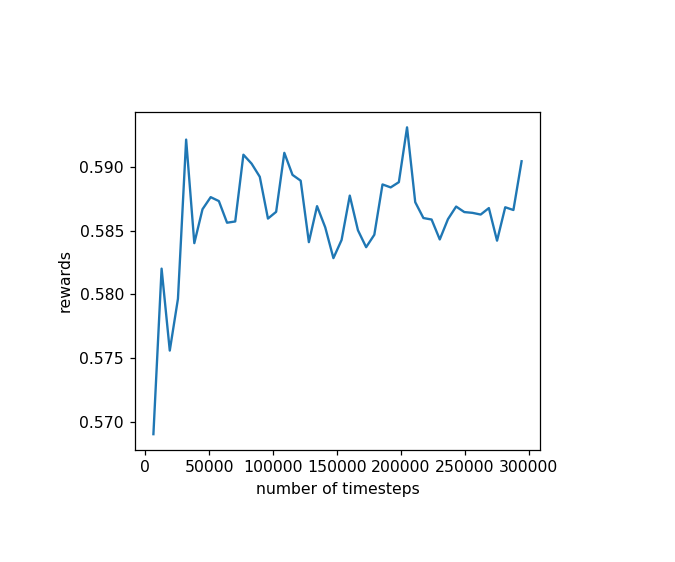

seed 3
seed 3: model definition ..
Using cuda device
seed 3: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cb7c2a90> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cb796ef0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cb7c2a90> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cb7a35f8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarn

---------------------------------------
| time/                   |           |
|    fps                  | 149       |
|    iterations           | 1         |
|    time_elapsed         | 1         |
|    total_timesteps      | 256       |
| train/                  |           |
|    approx_kl            | 0.1690977 |
|    clip_fraction        | 0.667     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.91      |
|    explained_variance   | 0.984     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0629   |
|    n_updates            | 23440     |
|    policy_gradient_loss | -0.0918   |
|    std                  | 0.0911    |
|    value_loss           | 0.000467  |
---------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps     

-----------------------------------------
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 12          |
|    time_elapsed         | 48          |
|    total_timesteps      | 3072        |
| train/                  |             |
|    approx_kl            | 0.036903046 |
|    clip_fraction        | 0.382       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.94        |
|    explained_variance   | 0.908       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.111      |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0807     |
|    std                  | 0.149       |
|    value_loss           | 0.00186     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 13          |
|    time_elapsed         | 52    

-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 23          |
|    time_elapsed         | 94          |
|    total_timesteps      | 5888        |
| train/                  |             |
|    approx_kl            | 0.036119208 |
|    clip_fraction        | 0.436       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.96        |
|    explained_variance   | 0.914       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.101      |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0882     |
|    std                  | 0.148       |
|    value_loss           | 0.0019      |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 24         |
|    time_elapsed         | 99        

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 33          |
|    time_elapsed         | 144         |
|    total_timesteps      | 8448        |
| train/                  |             |
|    approx_kl            | 0.098535836 |
|    clip_fraction        | 0.478       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.97        |
|    explained_variance   | 0.865       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.102      |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0926     |
|    std                  | 0.148       |
|    value_loss           | 0.00255     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 34          |
|    time_elapsed         | 148   

----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 44         |
|    time_elapsed         | 186        |
|    total_timesteps      | 11264      |
| train/                  |            |
|    approx_kl            | 0.05563374 |
|    clip_fraction        | 0.464      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.98       |
|    explained_variance   | 0.935      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.121     |
|    n_updates            | 860        |
|    policy_gradient_loss | -0.0976    |
|    std                  | 0.147      |
|    value_loss           | 0.00129    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 60         |
|    iterations           | 45         |
|    time_elapsed         | 190        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 54          |
|    time_elapsed         | 236         |
|    total_timesteps      | 13824       |
| train/                  |             |
|    approx_kl            | 0.070288576 |
|    clip_fraction        | 0.511       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.99        |
|    explained_variance   | 0.91        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0997     |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.0893     |
|    std                  | 0.147       |
|    value_loss           | 0.00145     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 55         |
|    time_elapsed         | 240       

-----------------------------------------
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 65          |
|    time_elapsed         | 278         |
|    total_timesteps      | 16640       |
| train/                  |             |
|    approx_kl            | 0.030597644 |
|    clip_fraction        | 0.496       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.01        |
|    explained_variance   | 0.936       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.141      |
|    n_updates            | 1280        |
|    policy_gradient_loss | -0.0926     |
|    std                  | 0.146       |
|    value_loss           | 0.00151     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 66         |
|    time_elapsed         | 282       

Eval num_timesteps=19200, episode_reward=0.48 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_rew

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 83         |
|    time_elapsed         | 378        |
|    total_timesteps      | 21248      |
| train/                  |            |
|    approx_kl            | 0.10777082 |
|    clip_fraction        | 0.508      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.04       |
|    explained_variance   | 0.93       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0792    |
|    n_updates            | 1640       |
|    policy_gradient_loss | -0.0907    |
|    std                  | 0.145      |
|    value_loss           | 0.002      |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 84          |
|    time_elapsed         | 382         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 94         |
|    time_elapsed         | 420        |
|    total_timesteps      | 24064      |
| train/                  |            |
|    approx_kl            | 0.10309366 |
|    clip_fraction        | 0.572      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.06       |
|    explained_variance   | 0.937      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 1860       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.145      |
|    value_loss           | 0.0016     |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 95          |
|    time_elapsed         | 423         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 105        |
|    time_elapsed         | 469        |
|    total_timesteps      | 26880      |
| train/                  |            |
|    approx_kl            | 0.08620328 |
|    clip_fraction        | 0.571      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.08       |
|    explained_variance   | 0.946      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.13      |
|    n_updates            | 2080       |
|    policy_gradient_loss | -0.0953    |
|    std                  | 0.144      |
|    value_loss           | 0.00119    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 106         |
|    time_elapsed         | 473         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 116        |
|    time_elapsed         | 510        |
|    total_timesteps      | 29696      |
| train/                  |            |
|    approx_kl            | 0.08928231 |
|    clip_fraction        | 0.518      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.09       |
|    explained_variance   | 0.922      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 2300       |
|    policy_gradient_loss | -0.0918    |
|    std                  | 0.144      |
|    value_loss           | 0.00144    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 117         |
|    time_elapsed         | 514         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 127        |
|    time_elapsed         | 561        |
|    total_timesteps      | 32512      |
| train/                  |            |
|    approx_kl            | 0.07931143 |
|    clip_fraction        | 0.562      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.11       |
|    explained_variance   | 0.883      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 2520       |
|    policy_gradient_loss | -0.0934    |
|    std                  | 0.143      |
|    value_loss           | 0.00163    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 128        |
|    time_elapsed         | 565        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 138         |
|    time_elapsed         | 602         |
|    total_timesteps      | 35328       |
| train/                  |             |
|    approx_kl            | 0.100798205 |
|    clip_fraction        | 0.573       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.13        |
|    explained_variance   | 0.925       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.133      |
|    n_updates            | 2740        |
|    policy_gradient_loss | -0.0971     |
|    std                  | 0.142       |
|    value_loss           | 0.00144     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 139        |
|    time_elapsed         | 606       

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 149        |
|    time_elapsed         | 644        |
|    total_timesteps      | 38144      |
| train/                  |            |
|    approx_kl            | 0.08882446 |
|    clip_fraction        | 0.592      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.15       |
|    explained_variance   | 0.945      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.133     |
|    n_updates            | 2960       |
|    policy_gradient_loss | -0.0993    |
|    std                  | 0.141      |
|    value_loss           | 0.00126    |
----------------------------------------
Eval num_timesteps=38400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval nu

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 156        |
|    time_elapsed         | 724        |
|    total_timesteps      | 39936      |
| train/                  |            |
|    approx_kl            | 0.14922911 |
|    clip_fraction        | 0.594      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.16       |
|    explained_variance   | 0.955      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 3100       |
|    policy_gradient_loss | -0.0882    |
|    std                  | 0.141      |
|    value_loss           | 0.00128    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 157        |
|    time_elapsed         | 728        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 167        |
|    time_elapsed         | 765        |
|    total_timesteps      | 42752      |
| train/                  |            |
|    approx_kl            | 0.14306608 |
|    clip_fraction        | 0.589      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.19       |
|    explained_variance   | 0.949      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.1       |
|    n_updates            | 3320       |
|    policy_gradient_loss | -0.0946    |
|    std                  | 0.14       |
|    value_loss           | 0.00118    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 168        |
|    time_elapsed         | 769        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 178        |
|    time_elapsed         | 816        |
|    total_timesteps      | 45568      |
| train/                  |            |
|    approx_kl            | 0.15034048 |
|    clip_fraction        | 0.642      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.21       |
|    explained_variance   | 0.952      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 3540       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.139      |
|    value_loss           | 0.00113    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 179        |
|    time_elapsed         | 819        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 189        |
|    time_elapsed         | 857        |
|    total_timesteps      | 48384      |
| train/                  |            |
|    approx_kl            | 0.11497623 |
|    clip_fraction        | 0.594      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.22       |
|    explained_variance   | 0.913      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 3760       |
|    policy_gradient_loss | -0.093     |
|    std                  | 0.139      |
|    value_loss           | 0.00149    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 190         |
|    time_elapsed         | 860         |
|    total_

Eval num_timesteps=51200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=51200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.591      |
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 200        |
|    time_elapsed         | 906        |
|    total_timesteps      | 51200      |
| train/                  |            |
|    approx_kl            | 0.09043774 |
|    clip_fraction        | 0.614      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.24       |
|    explained_variance   | 0.955      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 3980       |
|    policy_gradient_loss | -0.0903    |
|    std                  | 0.138      |
|    value

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 211        |
|    time_elapsed         | 947        |
|    total_timesteps      | 54016      |
| train/                  |            |
|    approx_kl            | 0.08232385 |
|    clip_fraction        | 0.588      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.26       |
|    explained_variance   | 0.95       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 4200       |
|    policy_gradient_loss | -0.0932    |
|    std                  | 0.137      |
|    value_loss           | 0.00113    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 212        |
|    time_elapsed         | 951        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 222        |
|    time_elapsed         | 988        |
|    total_timesteps      | 56832      |
| train/                  |            |
|    approx_kl            | 0.14911528 |
|    clip_fraction        | 0.592      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.28       |
|    explained_variance   | 0.961      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 4420       |
|    policy_gradient_loss | -0.0887    |
|    std                  | 0.137      |
|    value_loss           | 0.000916   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 223        |
|    time_elapsed         | 992        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 230        |
|    time_elapsed         | 1054       |
|    total_timesteps      | 58880      |
| train/                  |            |
|    approx_kl            | 0.10781503 |
|    clip_fraction        | 0.582      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.3        |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 4580       |
|    policy_gradient_loss | -0.0957    |
|    std                  | 0.136      |
|    value_loss           | 0.000841   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 231        |
|    time_elapsed         | 1057       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 241        |
|    time_elapsed         | 1095       |
|    total_timesteps      | 61696      |
| train/                  |            |
|    approx_kl            | 0.16754462 |
|    clip_fraction        | 0.583      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.32       |
|    explained_variance   | 0.957      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0956    |
|    n_updates            | 4800       |
|    policy_gradient_loss | -0.0972    |
|    std                  | 0.135      |
|    value_loss           | 0.00115    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 242        |
|    time_elapsed         | 1098       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 252        |
|    time_elapsed         | 1144       |
|    total_timesteps      | 64512      |
| train/                  |            |
|    approx_kl            | 0.12809393 |
|    clip_fraction        | 0.593      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.34       |
|    explained_variance   | 0.955      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0903    |
|    n_updates            | 5020       |
|    policy_gradient_loss | -0.0931    |
|    std                  | 0.135      |
|    value_loss           | 0.000978   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 253        |
|    time_elapsed         | 1147       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 263         |
|    time_elapsed         | 1185        |
|    total_timesteps      | 67328       |
| train/                  |             |
|    approx_kl            | 0.110092066 |
|    clip_fraction        | 0.596       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.36        |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.119      |
|    n_updates            | 5240        |
|    policy_gradient_loss | -0.0979     |
|    std                  | 0.134       |
|    value_loss           | 0.000804    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 264        |
|    time_elapsed         | 1188      

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 274       |
|    time_elapsed         | 1226      |
|    total_timesteps      | 70144     |
| train/                  |           |
|    approx_kl            | 0.1708002 |
|    clip_fraction        | 0.624     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.38      |
|    explained_variance   | 0.976     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.114    |
|    n_updates            | 5460      |
|    policy_gradient_loss | -0.096    |
|    std                  | 0.134     |
|    value_loss           | 0.000729  |
---------------------------------------
Eval num_timesteps=70400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=70400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 285        |
|    time_elapsed         | 1276       |
|    total_timesteps      | 72960      |
| train/                  |            |
|    approx_kl            | 0.14784592 |
|    clip_fraction        | 0.642      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.4        |
|    explained_variance   | 0.954      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 5680       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.133      |
|    value_loss           | 0.000951   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 286        |
|    time_elapsed         | 1280       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 296        |
|    time_elapsed         | 1317       |
|    total_timesteps      | 75776      |
| train/                  |            |
|    approx_kl            | 0.13207383 |
|    clip_fraction        | 0.64       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.41       |
|    explained_variance   | 0.958      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 5900       |
|    policy_gradient_loss | -0.0911    |
|    std                  | 0.132      |
|    value_loss           | 0.00108    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 297        |
|    time_elapsed         | 1320       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 304         |
|    time_elapsed         | 1372        |
|    total_timesteps      | 77824       |
| train/                  |             |
|    approx_kl            | 0.088066846 |
|    clip_fraction        | 0.613       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.42        |
|    explained_variance   | 0.979       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0776     |
|    n_updates            | 6060        |
|    policy_gradient_loss | -0.0946     |
|    std                  | 0.132       |
|    value_loss           | 0.000583    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 305        |
|    time_elapsed         | 1376      

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 315        |
|    time_elapsed         | 1413       |
|    total_timesteps      | 80640      |
| train/                  |            |
|    approx_kl            | 0.12578747 |
|    clip_fraction        | 0.619      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.45       |
|    explained_variance   | 0.965      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 6280       |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.131      |
|    value_loss           | 0.000867   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 316        |
|    time_elapsed         | 1417       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 326        |
|    time_elapsed         | 1464       |
|    total_timesteps      | 83456      |
| train/                  |            |
|    approx_kl            | 0.09164744 |
|    clip_fraction        | 0.56       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.47       |
|    explained_variance   | 0.963      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 6500       |
|    policy_gradient_loss | -0.0904    |
|    std                  | 0.131      |
|    value_loss           | 0.000867   |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 327         |
|    time_elapsed         | 1468        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 337         |
|    time_elapsed         | 1505        |
|    total_timesteps      | 86272       |
| train/                  |             |
|    approx_kl            | 0.036554873 |
|    clip_fraction        | 0.611       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.49        |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.12       |
|    n_updates            | 6720        |
|    policy_gradient_loss | -0.0933     |
|    std                  | 0.13        |
|    value_loss           | 0.0007      |
-----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 338       |
|    time_elapsed         | 1509      |
| 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 348        |
|    time_elapsed         | 1546       |
|    total_timesteps      | 89088      |
| train/                  |            |
|    approx_kl            | 0.12225442 |
|    clip_fraction        | 0.602      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.51       |
|    explained_variance   | 0.963      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.131     |
|    n_updates            | 6940       |
|    policy_gradient_loss | -0.0909    |
|    std                  | 0.129      |
|    value_loss           | 0.000749   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 349        |
|    time_elapsed         | 1550       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 359        |
|    time_elapsed         | 1595       |
|    total_timesteps      | 91904      |
| train/                  |            |
|    approx_kl            | 0.16294952 |
|    clip_fraction        | 0.611      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.53       |
|    explained_variance   | 0.968      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0958    |
|    n_updates            | 7160       |
|    policy_gradient_loss | -0.0948    |
|    std                  | 0.129      |
|    value_loss           | 0.000869   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 360       |
|    time_elapsed         | 1599      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 370        |
|    time_elapsed         | 1636       |
|    total_timesteps      | 94720      |
| train/                  |            |
|    approx_kl            | 0.10441557 |
|    clip_fraction        | 0.589      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.55       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 7380       |
|    policy_gradient_loss | -0.0857    |
|    std                  | 0.128      |
|    value_loss           | 0.000742   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 371        |
|    time_elapsed         | 1640       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 378        |
|    time_elapsed         | 1687       |
|    total_timesteps      | 96768      |
| train/                  |            |
|    approx_kl            | 0.12135477 |
|    clip_fraction        | 0.609      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.56       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 7540       |
|    policy_gradient_loss | -0.0939    |
|    std                  | 0.128      |
|    value_loss           | 0.00082    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 379        |
|    time_elapsed         | 1691       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 389        |
|    time_elapsed         | 1729       |
|    total_timesteps      | 99584      |
| train/                  |            |
|    approx_kl            | 0.13096097 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.57       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.127     |
|    n_updates            | 7760       |
|    policy_gradient_loss | -0.108     |
|    std                  | 0.127      |
|    value_loss           | 0.000807   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 390        |
|    time_elapsed         | 1732       |
|    total_times

Eval num_timesteps=102400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=102400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 5         |
|    mean_reward          | 0.587     |
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 400       |
|    time_elapsed         | 1778      |
|    total_timesteps      | 102400    |
| train/                  |           |
|    approx_kl            | 0.2068902 |
|    clip_fraction        | 0.64      |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.6       |
|    explained_variance   | 0.962     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.135    |
|    n_updates            | 7980      |
|    policy_gradient_loss | -0.0978   |
|    std                  | 0.126     |
|    value_loss           | 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 411        |
|    time_elapsed         | 1819       |
|    total_timesteps      | 105216     |
| train/                  |            |
|    approx_kl            | 0.25462314 |
|    clip_fraction        | 0.649      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.61       |
|    explained_variance   | 0.963      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.106     |
|    n_updates            | 8200       |
|    policy_gradient_loss | -0.0902    |
|    std                  | 0.126      |
|    value_loss           | 0.000795   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 412        |
|    time_elapsed         | 1822       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 422        |
|    time_elapsed         | 1860       |
|    total_timesteps      | 108032     |
| train/                  |            |
|    approx_kl            | 0.18040183 |
|    clip_fraction        | 0.68       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.63       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0866    |
|    n_updates            | 8420       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.125      |
|    value_loss           | 0.000591   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 423        |
|    time_elapsed         | 1864       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 433        |
|    time_elapsed         | 1909       |
|    total_timesteps      | 110848     |
| train/                  |            |
|    approx_kl            | 0.10841954 |
|    clip_fraction        | 0.637      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.65       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0743    |
|    n_updates            | 8640       |
|    policy_gradient_loss | -0.0996    |
|    std                  | 0.125      |
|    value_loss           | 0.000653   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 434        |
|    time_elapsed         | 1913       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 444        |
|    time_elapsed         | 1950       |
|    total_timesteps      | 113664     |
| train/                  |            |
|    approx_kl            | 0.24889249 |
|    clip_fraction        | 0.663      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.67       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0976    |
|    n_updates            | 8860       |
|    policy_gradient_loss | -0.0946    |
|    std                  | 0.124      |
|    value_loss           | 0.000673   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 445        |
|    time_elapsed         | 1954       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 452       |
|    time_elapsed         | 2003      |
|    total_timesteps      | 115712    |
| train/                  |           |
|    approx_kl            | 0.1959471 |
|    clip_fraction        | 0.595     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.68      |
|    explained_variance   | 0.959     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.106    |
|    n_updates            | 9020      |
|    policy_gradient_loss | -0.0899   |
|    std                  | 0.124     |
|    value_loss           | 0.000842  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 453        |
|    time_elapsed         | 2006       |
|    total_timesteps      | 115968 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 463        |
|    time_elapsed         | 2044       |
|    total_timesteps      | 118528     |
| train/                  |            |
|    approx_kl            | 0.22614764 |
|    clip_fraction        | 0.683      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.7        |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.1       |
|    n_updates            | 9240       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.123      |
|    value_loss           | 0.000546   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 464        |
|    time_elapsed         | 2047       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 474       |
|    time_elapsed         | 2085      |
|    total_timesteps      | 121344    |
| train/                  |           |
|    approx_kl            | 0.2520967 |
|    clip_fraction        | 0.655     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.72      |
|    explained_variance   | 0.979     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.118    |
|    n_updates            | 9460      |
|    policy_gradient_loss | -0.0989   |
|    std                  | 0.123     |
|    value_loss           | 0.000581  |
---------------------------------------
Eval num_timesteps=121600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=121600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 485       |
|    time_elapsed         | 2134      |
|    total_timesteps      | 124160    |
| train/                  |           |
|    approx_kl            | 0.1420582 |
|    clip_fraction        | 0.622     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.74      |
|    explained_variance   | 0.976     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.103    |
|    n_updates            | 9680      |
|    policy_gradient_loss | -0.0925   |
|    std                  | 0.122     |
|    value_loss           | 0.000738  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 486        |
|    time_elapsed         | 2137       |
|    total_timesteps      | 124416 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 496        |
|    time_elapsed         | 2175       |
|    total_timesteps      | 126976     |
| train/                  |            |
|    approx_kl            | 0.24418262 |
|    clip_fraction        | 0.645      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.75       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.102     |
|    n_updates            | 9900       |
|    policy_gradient_loss | -0.0995    |
|    std                  | 0.122      |
|    value_loss           | 0.00055    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 497        |
|    time_elapsed         | 2179       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 507        |
|    time_elapsed         | 2224       |
|    total_timesteps      | 129792     |
| train/                  |            |
|    approx_kl            | 0.16389255 |
|    clip_fraction        | 0.614      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.77       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 10120      |
|    policy_gradient_loss | -0.0841    |
|    std                  | 0.121      |
|    value_loss           | 0.000644   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 508       |
|    time_elapsed         | 2228      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 518        |
|    time_elapsed         | 2265       |
|    total_timesteps      | 132608     |
| train/                  |            |
|    approx_kl            | 0.25282848 |
|    clip_fraction        | 0.633      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.78       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.135     |
|    n_updates            | 10340      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.121      |
|    value_loss           | 0.000633   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 519        |
|    time_elapsed         | 2269       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 526       |
|    time_elapsed         | 2317      |
|    total_timesteps      | 134656    |
| train/                  |           |
|    approx_kl            | 0.1749028 |
|    clip_fraction        | 0.627     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.8       |
|    explained_variance   | 0.98      |
|    learning_rate        | 1e-05     |
|    loss                 | -0.114    |
|    n_updates            | 10500     |
|    policy_gradient_loss | -0.0909   |
|    std                  | 0.12      |
|    value_loss           | 0.000668  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 527        |
|    time_elapsed         | 2321       |
|    total_timesteps      | 134912 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 537        |
|    time_elapsed         | 2359       |
|    total_timesteps      | 137472     |
| train/                  |            |
|    approx_kl            | 0.20079824 |
|    clip_fraction        | 0.645      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.82       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.106     |
|    n_updates            | 10720      |
|    policy_gradient_loss | -0.0799    |
|    std                  | 0.12       |
|    value_loss           | 0.000768   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 538        |
|    time_elapsed         | 2362       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 548        |
|    time_elapsed         | 2399       |
|    total_timesteps      | 140288     |
| train/                  |            |
|    approx_kl            | 0.13129026 |
|    clip_fraction        | 0.608      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.84       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 10940      |
|    policy_gradient_loss | -0.0959    |
|    std                  | 0.119      |
|    value_loss           | 0.000573   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 549        |
|    time_elapsed         | 2403       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 559         |
|    time_elapsed         | 2449        |
|    total_timesteps      | 143104      |
| train/                  |             |
|    approx_kl            | 0.104864635 |
|    clip_fraction        | 0.661       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.86        |
|    explained_variance   | 0.978       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.126      |
|    n_updates            | 11160       |
|    policy_gradient_loss | -0.0964     |
|    std                  | 0.118       |
|    value_loss           | 0.000705    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 560        |
|    time_elapsed         | 2453      

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 570        |
|    time_elapsed         | 2490       |
|    total_timesteps      | 145920     |
| train/                  |            |
|    approx_kl            | 0.14713243 |
|    clip_fraction        | 0.671      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.88       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0603    |
|    n_updates            | 11380      |
|    policy_gradient_loss | -0.094     |
|    std                  | 0.118      |
|    value_loss           | 0.000827   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 571        |
|    time_elapsed         | 2494       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 581        |
|    time_elapsed         | 2539       |
|    total_timesteps      | 148736     |
| train/                  |            |
|    approx_kl            | 0.15928563 |
|    clip_fraction        | 0.694      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.9        |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 11600      |
|    policy_gradient_loss | -0.112     |
|    std                  | 0.117      |
|    value_loss           | 0.000555   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 582       |
|    time_elapsed         | 2543      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 592        |
|    time_elapsed         | 2580       |
|    total_timesteps      | 151552     |
| train/                  |            |
|    approx_kl            | 0.19255576 |
|    clip_fraction        | 0.639      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.92       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0798    |
|    n_updates            | 11820      |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.117      |
|    value_loss           | 0.000702   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 593        |
|    time_elapsed         | 2584       |
|    total_times

Eval num_timesteps=153600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=153600, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.588      |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 600        |
|    time_elapsed         | 2629       |
|    total_timesteps      | 153600     |
| train/                  |            |
|    approx_kl            | 0.11896889 |
|    clip_fraction        | 0.644      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.93       |
|    explained_variance   | 0.98       |
|    learning_rate 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 610        |
|    time_elapsed         | 2666       |
|    total_timesteps      | 156160     |
| train/                  |            |
|    approx_kl            | 0.25542235 |
|    clip_fraction        | 0.675      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.95       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 12180      |
|    policy_gradient_loss | -0.0981    |
|    std                  | 0.116      |
|    value_loss           | 0.000676   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 611        |
|    time_elapsed         | 2670       |
|    total_times

--------------------------------------
| time/                   |          |
|    fps                  | 58       |
|    iterations           | 621      |
|    time_elapsed         | 2708     |
|    total_timesteps      | 158976   |
| train/                  |          |
|    approx_kl            | 0.186308 |
|    clip_fraction        | 0.654    |
|    clip_range           | 0.2      |
|    entropy_loss         | 2.97     |
|    explained_variance   | 0.966    |
|    learning_rate        | 1e-05    |
|    loss                 | -0.1     |
|    n_updates            | 12400    |
|    policy_gradient_loss | -0.0936  |
|    std                  | 0.115    |
|    value_loss           | 0.00086  |
--------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 622        |
|    time_elapsed         | 2711       |
|    total_timesteps      | 159232     |
| train/     

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 632        |
|    time_elapsed         | 2756       |
|    total_timesteps      | 161792     |
| train/                  |            |
|    approx_kl            | 0.18596849 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.99       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.101     |
|    n_updates            | 12620      |
|    policy_gradient_loss | -0.0946    |
|    std                  | 0.115      |
|    value_loss           | 0.000644   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 633        |
|    time_elapsed         | 2760       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 643        |
|    time_elapsed         | 2798       |
|    total_timesteps      | 164608     |
| train/                  |            |
|    approx_kl            | 0.16046491 |
|    clip_fraction        | 0.657      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.01       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0644    |
|    n_updates            | 12840      |
|    policy_gradient_loss | -0.0975    |
|    std                  | 0.114      |
|    value_loss           | 0.000452   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 644        |
|    time_elapsed         | 2801       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 654        |
|    time_elapsed         | 2847       |
|    total_timesteps      | 167424     |
| train/                  |            |
|    approx_kl            | 0.07337949 |
|    clip_fraction        | 0.619      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.03       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 13060      |
|    policy_gradient_loss | -0.095     |
|    std                  | 0.113      |
|    value_loss           | 0.000743   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 655        |
|    time_elapsed         | 2851       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 665        |
|    time_elapsed         | 2888       |
|    total_timesteps      | 170240     |
| train/                  |            |
|    approx_kl            | 0.21875131 |
|    clip_fraction        | 0.691      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.06       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0908    |
|    n_updates            | 13280      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.113      |
|    value_loss           | 0.000764   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 666        |
|    time_elapsed         | 2892       |
|    total_times

Eval num_timesteps=172800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.51 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_t

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 683        |
|    time_elapsed         | 2979       |
|    total_timesteps      | 174848     |
| train/                  |            |
|    approx_kl            | 0.19952224 |
|    clip_fraction        | 0.607      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.09       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 13640      |
|    policy_gradient_loss | -0.0923    |
|    std                  | 0.112      |
|    value_loss           | 0.000654   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 684        |
|    time_elapsed         | 2983       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 694        |
|    time_elapsed         | 3020       |
|    total_timesteps      | 177664     |
| train/                  |            |
|    approx_kl            | 0.21103853 |
|    clip_fraction        | 0.674      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.1        |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0946    |
|    n_updates            | 13860      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.111      |
|    value_loss           | 0.000669   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 695        |
|    time_elapsed         | 3024       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 705        |
|    time_elapsed         | 3069       |
|    total_timesteps      | 180480     |
| train/                  |            |
|    approx_kl            | 0.26591057 |
|    clip_fraction        | 0.655      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.12       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0378    |
|    n_updates            | 14080      |
|    policy_gradient_loss | -0.0958    |
|    std                  | 0.111      |
|    value_loss           | 0.000551   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 706        |
|    time_elapsed         | 3073       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 716        |
|    time_elapsed         | 3110       |
|    total_timesteps      | 183296     |
| train/                  |            |
|    approx_kl            | 0.12943318 |
|    clip_fraction        | 0.608      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.15       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 14300      |
|    policy_gradient_loss | -0.0867    |
|    std                  | 0.11       |
|    value_loss           | 0.000521   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 717        |
|    time_elapsed         | 3114       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 727       |
|    time_elapsed         | 3160      |
|    total_timesteps      | 186112    |
| train/                  |           |
|    approx_kl            | 0.2262084 |
|    clip_fraction        | 0.676     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.17      |
|    explained_variance   | 0.982     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.113    |
|    n_updates            | 14520     |
|    policy_gradient_loss | -0.102    |
|    std                  | 0.11      |
|    value_loss           | 0.000469  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 728        |
|    time_elapsed         | 3164       |
|    total_timesteps      | 186368 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 738        |
|    time_elapsed         | 3201       |
|    total_timesteps      | 188928     |
| train/                  |            |
|    approx_kl            | 0.25039423 |
|    clip_fraction        | 0.649      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.19       |
|    explained_variance   | 0.987      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.136     |
|    n_updates            | 14740      |
|    policy_gradient_loss | -0.0979    |
|    std                  | 0.109      |
|    value_loss           | 0.000482   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 739        |
|    time_elapsed         | 3204       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 749       |
|    time_elapsed         | 3242      |
|    total_timesteps      | 191744    |
| train/                  |           |
|    approx_kl            | 0.3042889 |
|    clip_fraction        | 0.651     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.21      |
|    explained_variance   | 0.981     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.118    |
|    n_updates            | 14960     |
|    policy_gradient_loss | -0.096    |
|    std                  | 0.108     |
|    value_loss           | 0.000475  |
---------------------------------------
Eval num_timesteps=192000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.49 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.57 +/- 0.00
Episode leng

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 757         |
|    time_elapsed         | 3297        |
|    total_timesteps      | 193792      |
| train/                  |             |
|    approx_kl            | 0.119138084 |
|    clip_fraction        | 0.65        |
|    clip_range           | 0.2         |
|    entropy_loss         | 3.22        |
|    explained_variance   | 0.974       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0732     |
|    n_updates            | 15120       |
|    policy_gradient_loss | -0.0918     |
|    std                  | 0.108       |
|    value_loss           | 0.000607    |
-----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 758       |
|    time_elapsed         | 3301      |
| 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 768        |
|    time_elapsed         | 3338       |
|    total_timesteps      | 196608     |
| train/                  |            |
|    approx_kl            | 0.21263424 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.24       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 15340      |
|    policy_gradient_loss | -0.0945    |
|    std                  | 0.108      |
|    value_loss           | 0.000684   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 769        |
|    time_elapsed         | 3342       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 779        |
|    time_elapsed         | 3387       |
|    total_timesteps      | 199424     |
| train/                  |            |
|    approx_kl            | 0.27726996 |
|    clip_fraction        | 0.663      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.26       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 15560      |
|    policy_gradient_loss | -0.0939    |
|    std                  | 0.107      |
|    value_loss           | 0.000768   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 780        |
|    time_elapsed         | 3391       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 790        |
|    time_elapsed         | 3428       |
|    total_timesteps      | 202240     |
| train/                  |            |
|    approx_kl            | 0.21433894 |
|    clip_fraction        | 0.656      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.28       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0743    |
|    n_updates            | 15780      |
|    policy_gradient_loss | -0.0952    |
|    std                  | 0.106      |
|    value_loss           | 0.000517   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 791        |
|    time_elapsed         | 3432       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 801       |
|    time_elapsed         | 3477      |
|    total_timesteps      | 205056    |
| train/                  |           |
|    approx_kl            | 0.1958858 |
|    clip_fraction        | 0.658     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.3       |
|    explained_variance   | 0.985     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.103    |
|    n_updates            | 16000     |
|    policy_gradient_loss | -0.0952   |
|    std                  | 0.106     |
|    value_loss           | 0.000488  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 802        |
|    time_elapsed         | 3481       |
|    total_timesteps      | 205312 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 812        |
|    time_elapsed         | 3519       |
|    total_timesteps      | 207872     |
| train/                  |            |
|    approx_kl            | 0.18744592 |
|    clip_fraction        | 0.66       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.31       |
|    explained_variance   | 0.988      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 16220      |
|    policy_gradient_loss | -0.0981    |
|    std                  | 0.106      |
|    value_loss           | 0.000478   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 813        |
|    time_elapsed         | 3522       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 823        |
|    time_elapsed         | 3560       |
|    total_timesteps      | 210688     |
| train/                  |            |
|    approx_kl            | 0.22664468 |
|    clip_fraction        | 0.663      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.33       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.121     |
|    n_updates            | 16440      |
|    policy_gradient_loss | -0.0913    |
|    std                  | 0.105      |
|    value_loss           | 0.000522   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 824        |
|    time_elapsed         | 3564       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 831        |
|    time_elapsed         | 3616       |
|    total_timesteps      | 212736     |
| train/                  |            |
|    approx_kl            | 0.28185672 |
|    clip_fraction        | 0.64       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.35       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0245    |
|    n_updates            | 16600      |
|    policy_gradient_loss | -0.0923    |
|    std                  | 0.105      |
|    value_loss           | 0.00061    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 832       |
|    time_elapsed         | 3620      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 842        |
|    time_elapsed         | 3657       |
|    total_timesteps      | 215552     |
| train/                  |            |
|    approx_kl            | 0.26082328 |
|    clip_fraction        | 0.663      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.36       |
|    explained_variance   | 0.985      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0945    |
|    n_updates            | 16820      |
|    policy_gradient_loss | -0.0945    |
|    std                  | 0.104      |
|    value_loss           | 0.000469   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 843        |
|    time_elapsed         | 3661       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 853        |
|    time_elapsed         | 3706       |
|    total_timesteps      | 218368     |
| train/                  |            |
|    approx_kl            | 0.23752075 |
|    clip_fraction        | 0.676      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.39       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 17040      |
|    policy_gradient_loss | -0.098     |
|    std                  | 0.104      |
|    value_loss           | 0.000531   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 854        |
|    time_elapsed         | 3710       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 864        |
|    time_elapsed         | 3747       |
|    total_timesteps      | 221184     |
| train/                  |            |
|    approx_kl            | 0.16301738 |
|    clip_fraction        | 0.66       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.4        |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 17260      |
|    policy_gradient_loss | -0.0961    |
|    std                  | 0.103      |
|    value_loss           | 0.000528   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 865        |
|    time_elapsed         | 3751       |
|    total_times

Eval num_timesteps=224000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=224000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.591      |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 875        |
|    time_elapsed         | 3798       |
|    total_timesteps      | 224000     |
| train/                  |            |
|    approx_kl            | 0.19246316 |
|    clip_fraction        | 0.695      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.43       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 17480      |
|    policy_gradient_loss | -0.103     |
|    std                  |

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 886        |
|    time_elapsed         | 3839       |
|    total_timesteps      | 226816     |
| train/                  |            |
|    approx_kl            | 0.22149983 |
|    clip_fraction        | 0.693      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.44       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0893    |
|    n_updates            | 17700      |
|    policy_gradient_loss | -0.0992    |
|    std                  | 0.102      |
|    value_loss           | 0.000526   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 887        |
|    time_elapsed         | 3843       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 897        |
|    time_elapsed         | 3880       |
|    total_timesteps      | 229632     |
| train/                  |            |
|    approx_kl            | 0.20725128 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.46       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 17920      |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.102      |
|    value_loss           | 0.000483   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 898        |
|    time_elapsed         | 3884       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 905        |
|    time_elapsed         | 3930       |
|    total_timesteps      | 231680     |
| train/                  |            |
|    approx_kl            | 0.15082483 |
|    clip_fraction        | 0.638      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.47       |
|    explained_variance   | 0.989      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.121     |
|    n_updates            | 18080      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.102      |
|    value_loss           | 0.000389   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 906        |
|    time_elapsed         | 3933       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 916        |
|    time_elapsed         | 3971       |
|    total_timesteps      | 234496     |
| train/                  |            |
|    approx_kl            | 0.23213166 |
|    clip_fraction        | 0.679      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.49       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.131     |
|    n_updates            | 18300      |
|    policy_gradient_loss | -0.0979    |
|    std                  | 0.101      |
|    value_loss           | 0.00057    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 917        |
|    time_elapsed         | 3974       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 927       |
|    time_elapsed         | 4020      |
|    total_timesteps      | 237312    |
| train/                  |           |
|    approx_kl            | 0.3114533 |
|    clip_fraction        | 0.638     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.51      |
|    explained_variance   | 0.987     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.125    |
|    n_updates            | 18520     |
|    policy_gradient_loss | -0.0905   |
|    std                  | 0.101     |
|    value_loss           | 0.000451  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 928        |
|    time_elapsed         | 4024       |
|    total_timesteps      | 237568 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 938        |
|    time_elapsed         | 4062       |
|    total_timesteps      | 240128     |
| train/                  |            |
|    approx_kl            | 0.19546257 |
|    clip_fraction        | 0.69       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.54       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.108     |
|    n_updates            | 18740      |
|    policy_gradient_loss | -0.0965    |
|    std                  | 0.0999     |
|    value_loss           | 0.000405   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 939        |
|    time_elapsed         | 4065       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 949        |
|    time_elapsed         | 4102       |
|    total_timesteps      | 242944     |
| train/                  |            |
|    approx_kl            | 0.27687865 |
|    clip_fraction        | 0.696      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.56       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0711    |
|    n_updates            | 18960      |
|    policy_gradient_loss | -0.09      |
|    std                  | 0.0994     |
|    value_loss           | 0.000584   |
----------------------------------------
Eval num_timesteps=243200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=243200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
---------------------------------------
| eval/  

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 960       |
|    time_elapsed         | 4151      |
|    total_timesteps      | 245760    |
| train/                  |           |
|    approx_kl            | 0.2913999 |
|    clip_fraction        | 0.682     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.57      |
|    explained_variance   | 0.986     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.119    |
|    n_updates            | 19180     |
|    policy_gradient_loss | -0.101    |
|    std                  | 0.099     |
|    value_loss           | 0.000531  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 961        |
|    time_elapsed         | 4155       |
|    total_timesteps      | 246016 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 971        |
|    time_elapsed         | 4193       |
|    total_timesteps      | 248576     |
| train/                  |            |
|    approx_kl            | 0.18935576 |
|    clip_fraction        | 0.658      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.59       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.083     |
|    n_updates            | 19400      |
|    policy_gradient_loss | -0.0937    |
|    std                  | 0.0985     |
|    value_loss           | 0.000432   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 972        |
|    time_elapsed         | 4196       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 979        |
|    time_elapsed         | 4240       |
|    total_timesteps      | 250624     |
| train/                  |            |
|    approx_kl            | 0.23595554 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.61       |
|    explained_variance   | 0.985      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0876    |
|    n_updates            | 19560      |
|    policy_gradient_loss | -0.0879    |
|    std                  | 0.0981     |
|    value_loss           | 0.000493   |
----------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 59       |
|    iterations           | 980      |
|    time_elapsed         | 4244     |
|    total_timesteps      

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 990        |
|    time_elapsed         | 4281       |
|    total_timesteps      | 253440     |
| train/                  |            |
|    approx_kl            | 0.24886094 |
|    clip_fraction        | 0.662      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.63       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0879    |
|    n_updates            | 19780      |
|    policy_gradient_loss | -0.0889    |
|    std                  | 0.0976     |
|    value_loss           | 0.000467   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 991        |
|    time_elapsed         | 4285       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1001       |
|    time_elapsed         | 4331       |
|    total_timesteps      | 256256     |
| train/                  |            |
|    approx_kl            | 0.21084023 |
|    clip_fraction        | 0.636      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.65       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 20000      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.0972     |
|    value_loss           | 0.000443   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1002      |
|    time_elapsed         | 4334      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1012       |
|    time_elapsed         | 4372       |
|    total_timesteps      | 259072     |
| train/                  |            |
|    approx_kl            | 0.21295698 |
|    clip_fraction        | 0.686      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.67       |
|    explained_variance   | 0.99       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 20220      |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.0968     |
|    value_loss           | 0.00033    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1013       |
|    time_elapsed         | 4375       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1023       |
|    time_elapsed         | 4413       |
|    total_timesteps      | 261888     |
| train/                  |            |
|    approx_kl            | 0.25678632 |
|    clip_fraction        | 0.675      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.68       |
|    explained_variance   | 0.987      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0991    |
|    n_updates            | 20440      |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.0963     |
|    value_loss           | 0.000458   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1024       |
|    time_elapsed         | 4417       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1034      |
|    time_elapsed         | 4462      |
|    total_timesteps      | 264704    |
| train/                  |           |
|    approx_kl            | 0.3222966 |
|    clip_fraction        | 0.706     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.7       |
|    explained_variance   | 0.981     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.15     |
|    n_updates            | 20660     |
|    policy_gradient_loss | -0.0986   |
|    std                  | 0.0959    |
|    value_loss           | 0.000539  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1035       |
|    time_elapsed         | 4466       |
|    total_timesteps      | 264960 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1045       |
|    time_elapsed         | 4503       |
|    total_timesteps      | 267520     |
| train/                  |            |
|    approx_kl            | 0.11264799 |
|    clip_fraction        | 0.655      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.72       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 20880      |
|    policy_gradient_loss | -0.095     |
|    std                  | 0.0956     |
|    value_loss           | 0.000562   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1046       |
|    time_elapsed         | 4507       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1053       |
|    time_elapsed         | 4560       |
|    total_timesteps      | 269568     |
| train/                  |            |
|    approx_kl            | 0.21350199 |
|    clip_fraction        | 0.701      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.73       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0865    |
|    n_updates            | 21040      |
|    policy_gradient_loss | -0.107     |
|    std                  | 0.0952     |
|    value_loss           | 0.000442   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1054       |
|    time_elapsed         | 4564       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1064      |
|    time_elapsed         | 4601      |
|    total_timesteps      | 272384    |
| train/                  |           |
|    approx_kl            | 0.2950219 |
|    clip_fraction        | 0.654     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.75      |
|    explained_variance   | 0.984     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.116    |
|    n_updates            | 21260     |
|    policy_gradient_loss | -0.0907   |
|    std                  | 0.0948    |
|    value_loss           | 0.000493  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1065       |
|    time_elapsed         | 4605       |
|    total_timesteps      | 272640 

Eval num_timesteps=275200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=275200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.593      |
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1075       |
|    time_elapsed         | 4650       |
|    total_timesteps      | 275200     |
| train/                  |            |
|    approx_kl            | 0.20605823 |
|    clip_fraction        | 0.669      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.77       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 21480      |
|    policy_gradient_loss | -0.0903    |
|    std                  | 0.0944     |
|    val

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1086       |
|    time_elapsed         | 4692       |
|    total_timesteps      | 278016     |
| train/                  |            |
|    approx_kl            | 0.16245747 |
|    clip_fraction        | 0.676      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.79       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.108     |
|    n_updates            | 21700      |
|    policy_gradient_loss | -0.0944    |
|    std                  | 0.0939     |
|    value_loss           | 0.000513   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1087       |
|    time_elapsed         | 4695       |
|    total_times

--------------------------------------
| time/                   |          |
|    fps                  | 59       |
|    iterations           | 1097     |
|    time_elapsed         | 4733     |
|    total_timesteps      | 280832   |
| train/                  |          |
|    approx_kl            | 0.206863 |
|    clip_fraction        | 0.663    |
|    clip_range           | 0.2      |
|    entropy_loss         | 3.8      |
|    explained_variance   | 0.985    |
|    learning_rate        | 1e-05    |
|    loss                 | -0.116   |
|    n_updates            | 21920    |
|    policy_gradient_loss | -0.101   |
|    std                  | 0.0935   |
|    value_loss           | 0.000541 |
--------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1098       |
|    time_elapsed         | 4737       |
|    total_timesteps      | 281088     |
| train/     

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1108       |
|    time_elapsed         | 4782       |
|    total_timesteps      | 283648     |
| train/                  |            |
|    approx_kl            | 0.22426122 |
|    clip_fraction        | 0.663      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.83       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0813    |
|    n_updates            | 22140      |
|    policy_gradient_loss | -0.0855    |
|    std                  | 0.0929     |
|    value_loss           | 0.000394   |
----------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 59       |
|    iterations           | 1109     |
|    time_elapsed         | 4786     |
|    total_timesteps      

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1119       |
|    time_elapsed         | 4824       |
|    total_timesteps      | 286464     |
| train/                  |            |
|    approx_kl            | 0.19645861 |
|    clip_fraction        | 0.68       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.85       |
|    explained_variance   | 0.989      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0562    |
|    n_updates            | 22360      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.0925     |
|    value_loss           | 0.000402   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1120       |
|    time_elapsed         | 4828       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1127       |
|    time_elapsed         | 4875       |
|    total_timesteps      | 288512     |
| train/                  |            |
|    approx_kl            | 0.21998206 |
|    clip_fraction        | 0.627      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.86       |
|    explained_variance   | 0.987      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.139     |
|    n_updates            | 22520      |
|    policy_gradient_loss | -0.0959    |
|    std                  | 0.0922     |
|    value_loss           | 0.000391   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1128       |
|    time_elapsed         | 4879       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1138       |
|    time_elapsed         | 4916       |
|    total_timesteps      | 291328     |
| train/                  |            |
|    approx_kl            | 0.28069323 |
|    clip_fraction        | 0.691      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.88       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.101     |
|    n_updates            | 22740      |
|    policy_gradient_loss | -0.0909    |
|    std                  | 0.0917     |
|    value_loss           | 0.000573   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1139       |
|    time_elapsed         | 4920       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1149      |
|    time_elapsed         | 4958      |
|    total_timesteps      | 294144    |
| train/                  |           |
|    approx_kl            | 0.1390422 |
|    clip_fraction        | 0.644     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.9       |
|    explained_variance   | 0.988     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.104    |
|    n_updates            | 22960     |
|    policy_gradient_loss | -0.0917   |
|    std                  | 0.0912    |
|    value_loss           | 0.000408  |
---------------------------------------
Eval num_timesteps=294400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=294400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eva

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1160       |
|    time_elapsed         | 5009       |
|    total_timesteps      | 296960     |
| train/                  |            |
|    approx_kl            | 0.28075552 |
|    clip_fraction        | 0.689      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.92       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.138     |
|    n_updates            | 23180      |
|    policy_gradient_loss | -0.0982    |
|    std                  | 0.0907     |
|    value_loss           | 0.000559   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1161       |
|    time_elapsed         | 5013       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1171      |
|    time_elapsed         | 5050      |
|    total_timesteps      | 299776    |
| train/                  |           |
|    approx_kl            | 0.2771711 |
|    clip_fraction        | 0.657     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.94      |
|    explained_variance   | 0.986     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0957   |
|    n_updates            | 23400     |
|    policy_gradient_loss | -0.097    |
|    std                  | 0.0903    |
|    value_loss           | 0.000469  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1172       |
|    time_elapsed         | 5054       |
|    total_timesteps      | 300032 

<IPython.core.display.Javascript object>


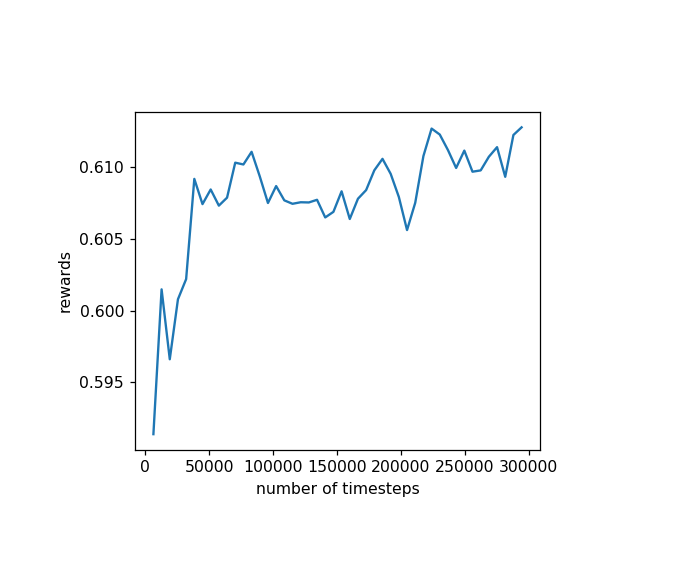

<IPython.core.display.Javascript object>


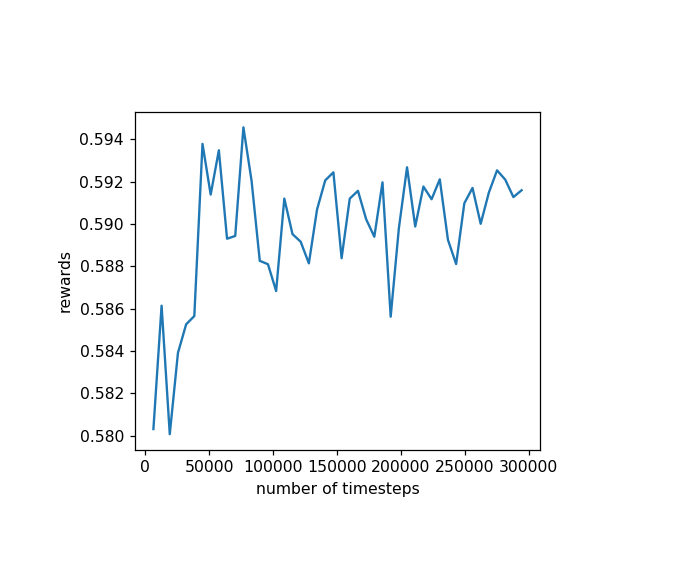

seed 4
seed 4: model definition ..
Using cuda device
seed 4: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cbb579e8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cbb27e80>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cbb579e8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cbb27dd8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarn

----------------------------------------
| time/                   |            |
|    fps                  | 167        |
|    iterations           | 1          |
|    time_elapsed         | 1          |
|    total_timesteps      | 256        |
| train/                  |            |
|    approx_kl            | 0.24757382 |
|    clip_fraction        | 0.671      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.95       |
|    explained_variance   | 0.989      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 23440      |
|    policy_gradient_loss | -0.0998    |
|    std                  | 0.0902     |
|    value_loss           | 0.000417   |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 69         |
|    iterations           | 12         |
|    time_elapsed         | 44         |
|    total_timesteps      | 3072       |
| train/                  |            |
|    approx_kl            | 0.05976528 |
|    clip_fraction        | 0.396      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.93       |
|    explained_variance   | 0.883      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.101     |
|    n_updates            | 220        |
|    policy_gradient_loss | -0.0856    |
|    std                  | 0.149      |
|    value_loss           | 0.00276    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 69          |
|    iterations           | 13          |
|    time_elapsed         | 48          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 23          |
|    time_elapsed         | 86          |
|    total_timesteps      | 5888        |
| train/                  |             |
|    approx_kl            | 0.028399818 |
|    clip_fraction        | 0.508       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.95        |
|    explained_variance   | 0.878       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.141      |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.101      |
|    std                  | 0.149       |
|    value_loss           | 0.00268     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 24          |
|    time_elapsed         | 90    

-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 33          |
|    time_elapsed         | 134         |
|    total_timesteps      | 8448        |
| train/                  |             |
|    approx_kl            | 0.059639767 |
|    clip_fraction        | 0.472       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.96        |
|    explained_variance   | 0.922       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0984     |
|    n_updates            | 640         |
|    policy_gradient_loss | -0.0929     |
|    std                  | 0.148       |
|    value_loss           | 0.00157     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 34          |
|    time_elapsed         | 138   

-----------------------------------------
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 44          |
|    time_elapsed         | 176         |
|    total_timesteps      | 11264       |
| train/                  |             |
|    approx_kl            | 0.037076224 |
|    clip_fraction        | 0.458       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.98        |
|    explained_variance   | 0.921       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.14       |
|    n_updates            | 860         |
|    policy_gradient_loss | -0.0909     |
|    std                  | 0.148       |
|    value_loss           | 0.00181     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 63         |
|    iterations           | 45         |
|    time_elapsed         | 180       

-----------------------------------------
| time/                   |             |
|    fps                  | 61          |
|    iterations           | 54          |
|    time_elapsed         | 224         |
|    total_timesteps      | 13824       |
| train/                  |             |
|    approx_kl            | 0.057749875 |
|    clip_fraction        | 0.559       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.99        |
|    explained_variance   | 0.897       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0985     |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.0961     |
|    std                  | 0.147       |
|    value_loss           | 0.00159     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 55         |
|    time_elapsed         | 227       

-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 65          |
|    time_elapsed         | 266         |
|    total_timesteps      | 16640       |
| train/                  |             |
|    approx_kl            | 0.039766923 |
|    clip_fraction        | 0.5         |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.01        |
|    explained_variance   | 0.938       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.12       |
|    n_updates            | 1280        |
|    policy_gradient_loss | -0.0992     |
|    std                  | 0.147       |
|    value_loss           | 0.00186     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 62         |
|    iterations           | 66         |
|    time_elapsed         | 270       

Eval num_timesteps=19200, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.53 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_rew

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 83         |
|    time_elapsed         | 377        |
|    total_timesteps      | 21248      |
| train/                  |            |
|    approx_kl            | 0.07804521 |
|    clip_fraction        | 0.543      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.03       |
|    explained_variance   | 0.897      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.14      |
|    n_updates            | 1640       |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.145      |
|    value_loss           | 0.00194    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 84          |
|    time_elapsed         | 380         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 94         |
|    time_elapsed         | 418        |
|    total_timesteps      | 24064      |
| train/                  |            |
|    approx_kl            | 0.05936959 |
|    clip_fraction        | 0.551      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.05       |
|    explained_variance   | 0.908      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 1860       |
|    policy_gradient_loss | -0.0954    |
|    std                  | 0.145      |
|    value_loss           | 0.00192    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 95          |
|    time_elapsed         | 422         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 104        |
|    time_elapsed         | 467        |
|    total_timesteps      | 26624      |
| train/                  |            |
|    approx_kl            | 0.08682667 |
|    clip_fraction        | 0.553      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.07       |
|    explained_variance   | 0.928      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 2060       |
|    policy_gradient_loss | -0.0998    |
|    std                  | 0.144      |
|    value_loss           | 0.00154    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 105        |
|    time_elapsed         | 471        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 115        |
|    time_elapsed         | 509        |
|    total_timesteps      | 29440      |
| train/                  |            |
|    approx_kl            | 0.08709027 |
|    clip_fraction        | 0.529      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.09       |
|    explained_variance   | 0.923      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 2280       |
|    policy_gradient_loss | -0.0927    |
|    std                  | 0.143      |
|    value_loss           | 0.0017     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 116        |
|    time_elapsed         | 513        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 126        |
|    time_elapsed         | 560        |
|    total_timesteps      | 32256      |
| train/                  |            |
|    approx_kl            | 0.06412838 |
|    clip_fraction        | 0.588      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.11       |
|    explained_variance   | 0.937      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0823    |
|    n_updates            | 2500       |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.143      |
|    value_loss           | 0.00116    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 127        |
|    time_elapsed         | 564        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 137         |
|    time_elapsed         | 602         |
|    total_timesteps      | 35072       |
| train/                  |             |
|    approx_kl            | 0.117449105 |
|    clip_fraction        | 0.643       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.12        |
|    explained_variance   | 0.94        |
|    learning_rate        | 1e-05       |
|    loss                 | -0.125      |
|    n_updates            | 2720        |
|    policy_gradient_loss | -0.103      |
|    std                  | 0.142       |
|    value_loss           | 0.00191     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 138        |
|    time_elapsed         | 606       

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 148        |
|    time_elapsed         | 644        |
|    total_timesteps      | 37888      |
| train/                  |            |
|    approx_kl            | 0.07043937 |
|    clip_fraction        | 0.57       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.15       |
|    explained_variance   | 0.934      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.094     |
|    n_updates            | 2940       |
|    policy_gradient_loss | -0.0936    |
|    std                  | 0.141      |
|    value_loss           | 0.00119    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 149        |
|    time_elapsed         | 647        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 156        |
|    time_elapsed         | 712        |
|    total_timesteps      | 39936      |
| train/                  |            |
|    approx_kl            | 0.13150963 |
|    clip_fraction        | 0.576      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.16       |
|    explained_variance   | 0.948      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.137     |
|    n_updates            | 3100       |
|    policy_gradient_loss | -0.0924    |
|    std                  | 0.141      |
|    value_loss           | 0.00115    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 157        |
|    time_elapsed         | 716        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 167        |
|    time_elapsed         | 753        |
|    total_timesteps      | 42752      |
| train/                  |            |
|    approx_kl            | 0.11866197 |
|    clip_fraction        | 0.562      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.17       |
|    explained_variance   | 0.942      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.092     |
|    n_updates            | 3320       |
|    policy_gradient_loss | -0.0878    |
|    std                  | 0.141      |
|    value_loss           | 0.00124    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 168        |
|    time_elapsed         | 757        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 178        |
|    time_elapsed         | 804        |
|    total_timesteps      | 45568      |
| train/                  |            |
|    approx_kl            | 0.07573525 |
|    clip_fraction        | 0.598      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.19       |
|    explained_variance   | 0.939      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 3540       |
|    policy_gradient_loss | -0.0968    |
|    std                  | 0.14       |
|    value_loss           | 0.00108    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 179        |
|    time_elapsed         | 807        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 189        |
|    time_elapsed         | 845        |
|    total_timesteps      | 48384      |
| train/                  |            |
|    approx_kl            | 0.11754685 |
|    clip_fraction        | 0.643      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.2        |
|    explained_variance   | 0.942      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.105     |
|    n_updates            | 3760       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.139      |
|    value_loss           | 0.00119    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 190        |
|    time_elapsed         | 849        |
|    total_times

Eval num_timesteps=51200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=51200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.585      |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 200        |
|    time_elapsed         | 894        |
|    total_timesteps      | 51200      |
| train/                  |            |
|    approx_kl            | 0.06941596 |
|    clip_fraction        | 0.581      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.22       |
|    explained_variance   | 0.947      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.105     |
|    n_updates            | 3980       |
|    policy_gradient_loss | -0.0859    |
|    std                  | 0.139      |
|    value

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 211        |
|    time_elapsed         | 936        |
|    total_timesteps      | 54016      |
| train/                  |            |
|    approx_kl            | 0.20784035 |
|    clip_fraction        | 0.632      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.24       |
|    explained_variance   | 0.948      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.13      |
|    n_updates            | 4200       |
|    policy_gradient_loss | -0.0941    |
|    std                  | 0.138      |
|    value_loss           | 0.00131    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 212        |
|    time_elapsed         | 939        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 222        |
|    time_elapsed         | 977        |
|    total_timesteps      | 56832      |
| train/                  |            |
|    approx_kl            | 0.13220409 |
|    clip_fraction        | 0.593      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.26       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.131     |
|    n_updates            | 4420       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.138      |
|    value_loss           | 0.000746   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 223        |
|    time_elapsed         | 981        |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 56        |
|    iterations           | 230       |
|    time_elapsed         | 1049      |
|    total_timesteps      | 58880     |
| train/                  |           |
|    approx_kl            | 0.1856994 |
|    clip_fraction        | 0.61      |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.27      |
|    explained_variance   | 0.958     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.128    |
|    n_updates            | 4580      |
|    policy_gradient_loss | -0.0949   |
|    std                  | 0.137     |
|    value_loss           | 0.00102   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 231        |
|    time_elapsed         | 1053       |
|    total_timesteps      | 59136  

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 241        |
|    time_elapsed         | 1090       |
|    total_timesteps      | 61696      |
| train/                  |            |
|    approx_kl            | 0.10008233 |
|    clip_fraction        | 0.569      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.29       |
|    explained_variance   | 0.954      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0944    |
|    n_updates            | 4800       |
|    policy_gradient_loss | -0.0853    |
|    std                  | 0.136      |
|    value_loss           | 0.000854   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 242        |
|    time_elapsed         | 1094       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 252         |
|    time_elapsed         | 1139        |
|    total_timesteps      | 64512       |
| train/                  |             |
|    approx_kl            | 0.060209136 |
|    clip_fraction        | 0.638       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.31        |
|    explained_variance   | 0.953       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.122      |
|    n_updates            | 5020        |
|    policy_gradient_loss | -0.106      |
|    std                  | 0.136       |
|    value_loss           | 0.000997    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 253        |
|    time_elapsed         | 1142      

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 263        |
|    time_elapsed         | 1180       |
|    total_timesteps      | 67328      |
| train/                  |            |
|    approx_kl            | 0.09746951 |
|    clip_fraction        | 0.563      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.33       |
|    explained_variance   | 0.953      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 5240       |
|    policy_gradient_loss | -0.0863    |
|    std                  | 0.135      |
|    value_loss           | 0.00109    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 264        |
|    time_elapsed         | 1184       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 274         |
|    time_elapsed         | 1221        |
|    total_timesteps      | 70144       |
| train/                  |             |
|    approx_kl            | 0.075456105 |
|    clip_fraction        | 0.612       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.35        |
|    explained_variance   | 0.937       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.102      |
|    n_updates            | 5460        |
|    policy_gradient_loss | -0.0924     |
|    std                  | 0.135       |
|    value_loss           | 0.0012      |
-----------------------------------------
Eval num_timesteps=70400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=70400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
----------

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 285        |
|    time_elapsed         | 1272       |
|    total_timesteps      | 72960      |
| train/                  |            |
|    approx_kl            | 0.08494742 |
|    clip_fraction        | 0.648      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.36       |
|    explained_variance   | 0.947      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.122     |
|    n_updates            | 5680       |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.134      |
|    value_loss           | 0.000959   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 286        |
|    time_elapsed         | 1275       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 296        |
|    time_elapsed         | 1312       |
|    total_timesteps      | 75776      |
| train/                  |            |
|    approx_kl            | 0.17709205 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.38       |
|    explained_variance   | 0.966      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 5900       |
|    policy_gradient_loss | -0.0949    |
|    std                  | 0.133      |
|    value_loss           | 0.000843   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 297        |
|    time_elapsed         | 1316       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 304        |
|    time_elapsed         | 1384       |
|    total_timesteps      | 77824      |
| train/                  |            |
|    approx_kl            | 0.11502397 |
|    clip_fraction        | 0.588      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.4        |
|    explained_variance   | 0.961      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 6060       |
|    policy_gradient_loss | -0.0908    |
|    std                  | 0.133      |
|    value_loss           | 0.00102    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 305        |
|    time_elapsed         | 1388       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 315        |
|    time_elapsed         | 1425       |
|    total_timesteps      | 80640      |
| train/                  |            |
|    approx_kl            | 0.11141291 |
|    clip_fraction        | 0.611      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.42       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 6280       |
|    policy_gradient_loss | -0.0943    |
|    std                  | 0.132      |
|    value_loss           | 0.000911   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 316        |
|    time_elapsed         | 1429       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 326        |
|    time_elapsed         | 1476       |
|    total_timesteps      | 83456      |
| train/                  |            |
|    approx_kl            | 0.17227766 |
|    clip_fraction        | 0.649      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.44       |
|    explained_variance   | 0.937      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 6500       |
|    policy_gradient_loss | -0.0986    |
|    std                  | 0.131      |
|    value_loss           | 0.00111    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 327        |
|    time_elapsed         | 1480       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 337        |
|    time_elapsed         | 1518       |
|    total_timesteps      | 86272      |
| train/                  |            |
|    approx_kl            | 0.14435029 |
|    clip_fraction        | 0.633      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.46       |
|    explained_variance   | 0.951      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.105     |
|    n_updates            | 6720       |
|    policy_gradient_loss | -0.0953    |
|    std                  | 0.131      |
|    value_loss           | 0.000891   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 338        |
|    time_elapsed         | 1521       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 348        |
|    time_elapsed         | 1559       |
|    total_timesteps      | 89088      |
| train/                  |            |
|    approx_kl            | 0.10379918 |
|    clip_fraction        | 0.625      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.48       |
|    explained_variance   | 0.941      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 6940       |
|    policy_gradient_loss | -0.0991    |
|    std                  | 0.13       |
|    value_loss           | 0.00104    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 349        |
|    time_elapsed         | 1563       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 56        |
|    iterations           | 359       |
|    time_elapsed         | 1612      |
|    total_timesteps      | 91904     |
| train/                  |           |
|    approx_kl            | 0.1454539 |
|    clip_fraction        | 0.602     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.5       |
|    explained_variance   | 0.958     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.109    |
|    n_updates            | 7160      |
|    policy_gradient_loss | -0.0887   |
|    std                  | 0.13      |
|    value_loss           | 0.00107   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 360        |
|    time_elapsed         | 1616       |
|    total_timesteps      | 92160  

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 370        |
|    time_elapsed         | 1653       |
|    total_timesteps      | 94720      |
| train/                  |            |
|    approx_kl            | 0.17867878 |
|    clip_fraction        | 0.651      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.51       |
|    explained_variance   | 0.961      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 7380       |
|    policy_gradient_loss | -0.0911    |
|    std                  | 0.129      |
|    value_loss           | 0.000835   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 371        |
|    time_elapsed         | 1657       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 378        |
|    time_elapsed         | 1717       |
|    total_timesteps      | 96768      |
| train/                  |            |
|    approx_kl            | 0.15779403 |
|    clip_fraction        | 0.657      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.52       |
|    explained_variance   | 0.931      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0904    |
|    n_updates            | 7540       |
|    policy_gradient_loss | -0.0919    |
|    std                  | 0.129      |
|    value_loss           | 0.00145    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 379        |
|    time_elapsed         | 1721       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 389        |
|    time_elapsed         | 1758       |
|    total_timesteps      | 99584      |
| train/                  |            |
|    approx_kl            | 0.09299316 |
|    clip_fraction        | 0.606      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.54       |
|    explained_variance   | 0.925      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 7760       |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.128      |
|    value_loss           | 0.000955   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 390        |
|    time_elapsed         | 1762       |
|    total_times

Eval num_timesteps=102400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=102400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.588      |
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 400        |
|    time_elapsed         | 1807       |
|    total_timesteps      | 102400     |
| train/                  |            |
|    approx_kl            | 0.16775183 |
|    clip_fraction        | 0.599      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.56       |
|    explained_variance   | 0.962      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.125     |
|    n_updates            | 7980       |
|    policy_gradient_loss | -0.0939    |
|    std                  | 0.128      |
|    val

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 411        |
|    time_elapsed         | 1848       |
|    total_timesteps      | 105216     |
| train/                  |            |
|    approx_kl            | 0.12666117 |
|    clip_fraction        | 0.571      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.58       |
|    explained_variance   | 0.962      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0974    |
|    n_updates            | 8200       |
|    policy_gradient_loss | -0.0848    |
|    std                  | 0.127      |
|    value_loss           | 0.000798   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 412        |
|    time_elapsed         | 1852       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 422        |
|    time_elapsed         | 1889       |
|    total_timesteps      | 108032     |
| train/                  |            |
|    approx_kl            | 0.25622064 |
|    clip_fraction        | 0.639      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.6        |
|    explained_variance   | 0.954      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0957    |
|    n_updates            | 8420       |
|    policy_gradient_loss | -0.093     |
|    std                  | 0.126      |
|    value_loss           | 0.000924   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 423        |
|    time_elapsed         | 1893       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 433        |
|    time_elapsed         | 1938       |
|    total_timesteps      | 110848     |
| train/                  |            |
|    approx_kl            | 0.12100234 |
|    clip_fraction        | 0.585      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.62       |
|    explained_variance   | 0.952      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 8640       |
|    policy_gradient_loss | -0.081     |
|    std                  | 0.126      |
|    value_loss           | 0.0008     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 434        |
|    time_elapsed         | 1942       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 444        |
|    time_elapsed         | 1980       |
|    total_timesteps      | 113664     |
| train/                  |            |
|    approx_kl            | 0.14948934 |
|    clip_fraction        | 0.626      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.64       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.125     |
|    n_updates            | 8860       |
|    policy_gradient_loss | -0.0918    |
|    std                  | 0.125      |
|    value_loss           | 0.000729   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 445        |
|    time_elapsed         | 1983       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 452        |
|    time_elapsed         | 2027       |
|    total_timesteps      | 115712     |
| train/                  |            |
|    approx_kl            | 0.22206572 |
|    clip_fraction        | 0.65       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.65       |
|    explained_variance   | 0.968      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 9020       |
|    policy_gradient_loss | -0.0926    |
|    std                  | 0.125      |
|    value_loss           | 0.000631   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 453       |
|    time_elapsed         | 2031      |
|    total_timesteps 

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 463         |
|    time_elapsed         | 2068        |
|    total_timesteps      | 118528      |
| train/                  |             |
|    approx_kl            | 0.089479566 |
|    clip_fraction        | 0.602       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.67        |
|    explained_variance   | 0.963       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0916     |
|    n_updates            | 9240        |
|    policy_gradient_loss | -0.0802     |
|    std                  | 0.124       |
|    value_loss           | 0.000589    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 464        |
|    time_elapsed         | 2072      

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 474        |
|    time_elapsed         | 2109       |
|    total_timesteps      | 121344     |
| train/                  |            |
|    approx_kl            | 0.23503321 |
|    clip_fraction        | 0.662      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.68       |
|    explained_variance   | 0.966      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 9460       |
|    policy_gradient_loss | -0.0955    |
|    std                  | 0.124      |
|    value_loss           | 0.000799   |
----------------------------------------
Eval num_timesteps=121600, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=121600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/ 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 485        |
|    time_elapsed         | 2158       |
|    total_timesteps      | 124160     |
| train/                  |            |
|    approx_kl            | 0.15457112 |
|    clip_fraction        | 0.597      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.7        |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.134     |
|    n_updates            | 9680       |
|    policy_gradient_loss | -0.0921    |
|    std                  | 0.123      |
|    value_loss           | 0.000597   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 486        |
|    time_elapsed         | 2162       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 496        |
|    time_elapsed         | 2199       |
|    total_timesteps      | 126976     |
| train/                  |            |
|    approx_kl            | 0.17434943 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.71       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 9900       |
|    policy_gradient_loss | -0.097     |
|    std                  | 0.123      |
|    value_loss           | 0.00071    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 497        |
|    time_elapsed         | 2203       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 507        |
|    time_elapsed         | 2248       |
|    total_timesteps      | 129792     |
| train/                  |            |
|    approx_kl            | 0.11630626 |
|    clip_fraction        | 0.59       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.73       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0732    |
|    n_updates            | 10120      |
|    policy_gradient_loss | -0.0874    |
|    std                  | 0.122      |
|    value_loss           | 0.000686   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 508        |
|    time_elapsed         | 2252       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 518         |
|    time_elapsed         | 2290        |
|    total_timesteps      | 132608      |
| train/                  |             |
|    approx_kl            | 0.115719825 |
|    clip_fraction        | 0.596       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.75        |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.105      |
|    n_updates            | 10340       |
|    policy_gradient_loss | -0.0838     |
|    std                  | 0.122       |
|    value_loss           | 0.000735    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 519        |
|    time_elapsed         | 2294      

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 526        |
|    time_elapsed         | 2343       |
|    total_timesteps      | 134656     |
| train/                  |            |
|    approx_kl            | 0.15895209 |
|    clip_fraction        | 0.609      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.76       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0912    |
|    n_updates            | 10500      |
|    policy_gradient_loss | -0.0926    |
|    std                  | 0.121      |
|    value_loss           | 0.000797   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 527        |
|    time_elapsed         | 2347       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 537        |
|    time_elapsed         | 2385       |
|    total_timesteps      | 137472     |
| train/                  |            |
|    approx_kl            | 0.19120228 |
|    clip_fraction        | 0.613      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.79       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 10720      |
|    policy_gradient_loss | -0.0897    |
|    std                  | 0.121      |
|    value_loss           | 0.000723   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 538        |
|    time_elapsed         | 2388       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 548       |
|    time_elapsed         | 2426      |
|    total_timesteps      | 140288    |
| train/                  |           |
|    approx_kl            | 0.1366404 |
|    clip_fraction        | 0.679     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.8       |
|    explained_variance   | 0.972     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.117    |
|    n_updates            | 10940     |
|    policy_gradient_loss | -0.0997   |
|    std                  | 0.12      |
|    value_loss           | 0.000741  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 549       |
|    time_elapsed         | 2429      |
|    total_timesteps      | 140544    |


----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 559        |
|    time_elapsed         | 2477       |
|    total_timesteps      | 143104     |
| train/                  |            |
|    approx_kl            | 0.22304824 |
|    clip_fraction        | 0.647      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.82       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.133     |
|    n_updates            | 11160      |
|    policy_gradient_loss | -0.09      |
|    std                  | 0.119      |
|    value_loss           | 0.000567   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 560       |
|    time_elapsed         | 2480      |
|    total_timesteps 

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 570       |
|    time_elapsed         | 2518      |
|    total_timesteps      | 145920    |
| train/                  |           |
|    approx_kl            | 0.1748182 |
|    clip_fraction        | 0.632     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.84      |
|    explained_variance   | 0.972     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0962   |
|    n_updates            | 11380     |
|    policy_gradient_loss | -0.0896   |
|    std                  | 0.119     |
|    value_loss           | 0.000804  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 571        |
|    time_elapsed         | 2521       |
|    total_timesteps      | 146176 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 581        |
|    time_elapsed         | 2568       |
|    total_timesteps      | 148736     |
| train/                  |            |
|    approx_kl            | 0.27380198 |
|    clip_fraction        | 0.678      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.85       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.108     |
|    n_updates            | 11600      |
|    policy_gradient_loss | -0.0962    |
|    std                  | 0.119      |
|    value_loss           | 0.000736   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 582        |
|    time_elapsed         | 2572       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 592        |
|    time_elapsed         | 2609       |
|    total_timesteps      | 151552     |
| train/                  |            |
|    approx_kl            | 0.16912223 |
|    clip_fraction        | 0.628      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.87       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0874    |
|    n_updates            | 11820      |
|    policy_gradient_loss | -0.0992    |
|    std                  | 0.118      |
|    value_loss           | 0.000502   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 593       |
|    time_elapsed         | 2612      |
|    total_timesteps 

Eval num_timesteps=153600, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.55 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.595      |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 600        |
|    time_elapsed         | 2662       |
|    total_timesteps      | 153600     |
| train/                  |            |
|    approx_kl            | 0.29185557 |
|    clip_fraction        | 0.64       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.88       |
|    explained_variance   | 0.973      |
|    learning_rate 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 610        |
|    time_elapsed         | 2700       |
|    total_timesteps      | 156160     |
| train/                  |            |
|    approx_kl            | 0.23216504 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.9        |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0819    |
|    n_updates            | 12180      |
|    policy_gradient_loss | -0.0921    |
|    std                  | 0.117      |
|    value_loss           | 0.0007     |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 611       |
|    time_elapsed         | 2703      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 621        |
|    time_elapsed         | 2740       |
|    total_timesteps      | 158976     |
| train/                  |            |
|    approx_kl            | 0.21935669 |
|    clip_fraction        | 0.687      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.92       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 12400      |
|    policy_gradient_loss | -0.0927    |
|    std                  | 0.117      |
|    value_loss           | 0.00066    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 622       |
|    time_elapsed         | 2744      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 632        |
|    time_elapsed         | 2790       |
|    total_timesteps      | 161792     |
| train/                  |            |
|    approx_kl            | 0.11952984 |
|    clip_fraction        | 0.611      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.94       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 12620      |
|    policy_gradient_loss | -0.0885    |
|    std                  | 0.116      |
|    value_loss           | 0.000694   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 633        |
|    time_elapsed         | 2794       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 643        |
|    time_elapsed         | 2831       |
|    total_timesteps      | 164608     |
| train/                  |            |
|    approx_kl            | 0.24966444 |
|    clip_fraction        | 0.677      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.96       |
|    explained_variance   | 0.985      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0863    |
|    n_updates            | 12840      |
|    policy_gradient_loss | -0.0952    |
|    std                  | 0.115      |
|    value_loss           | 0.000385   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 644        |
|    time_elapsed         | 2834       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 654        |
|    time_elapsed         | 2880       |
|    total_timesteps      | 167424     |
| train/                  |            |
|    approx_kl            | 0.11877482 |
|    clip_fraction        | 0.661      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.98       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0767    |
|    n_updates            | 13060      |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.115      |
|    value_loss           | 0.000585   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 655        |
|    time_elapsed         | 2883       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 665       |
|    time_elapsed         | 2921      |
|    total_timesteps      | 170240    |
| train/                  |           |
|    approx_kl            | 0.1706821 |
|    clip_fraction        | 0.66      |
|    clip_range           | 0.2       |
|    entropy_loss         | 3         |
|    explained_variance   | 0.978     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.122    |
|    n_updates            | 13280     |
|    policy_gradient_loss | -0.0998   |
|    std                  | 0.114     |
|    value_loss           | 0.000564  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 666        |
|    time_elapsed         | 2924       |
|    total_timesteps      | 170496 

Eval num_timesteps=172800, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, epi

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 683        |
|    time_elapsed         | 3014       |
|    total_timesteps      | 174848     |
| train/                  |            |
|    approx_kl            | 0.13657391 |
|    clip_fraction        | 0.635      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.03       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0868    |
|    n_updates            | 13640      |
|    policy_gradient_loss | -0.0896    |
|    std                  | 0.113      |
|    value_loss           | 0.00076    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 684        |
|    time_elapsed         | 3017       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 694        |
|    time_elapsed         | 3055       |
|    total_timesteps      | 177664     |
| train/                  |            |
|    approx_kl            | 0.23425463 |
|    clip_fraction        | 0.702      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.05       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0919    |
|    n_updates            | 13860      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.113      |
|    value_loss           | 0.000518   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 695        |
|    time_elapsed         | 3059       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 705        |
|    time_elapsed         | 3104       |
|    total_timesteps      | 180480     |
| train/                  |            |
|    approx_kl            | 0.23119904 |
|    clip_fraction        | 0.694      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.07       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 14080      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.112      |
|    value_loss           | 0.000671   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 706        |
|    time_elapsed         | 3108       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 716        |
|    time_elapsed         | 3146       |
|    total_timesteps      | 183296     |
| train/                  |            |
|    approx_kl            | 0.16702661 |
|    clip_fraction        | 0.655      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.09       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 14300      |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.112      |
|    value_loss           | 0.000515   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 717        |
|    time_elapsed         | 3150       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 727        |
|    time_elapsed         | 3195       |
|    total_timesteps      | 186112     |
| train/                  |            |
|    approx_kl            | 0.18984444 |
|    clip_fraction        | 0.681      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.1        |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 14520      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.111      |
|    value_loss           | 0.000606   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 728        |
|    time_elapsed         | 3199       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 738        |
|    time_elapsed         | 3237       |
|    total_timesteps      | 188928     |
| train/                  |            |
|    approx_kl            | 0.14274672 |
|    clip_fraction        | 0.604      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.13       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 14740      |
|    policy_gradient_loss | -0.092     |
|    std                  | 0.111      |
|    value_loss           | 0.000657   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 739        |
|    time_elapsed         | 3240       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 749        |
|    time_elapsed         | 3278       |
|    total_timesteps      | 191744     |
| train/                  |            |
|    approx_kl            | 0.15719771 |
|    clip_fraction        | 0.611      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.14       |
|    explained_variance   | 0.958      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 14960      |
|    policy_gradient_loss | -0.0834    |
|    std                  | 0.11       |
|    value_loss           | 0.000864   |
----------------------------------------
Eval num_timesteps=192000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.49 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.56 +/

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 757        |
|    time_elapsed         | 3329       |
|    total_timesteps      | 193792     |
| train/                  |            |
|    approx_kl            | 0.22840908 |
|    clip_fraction        | 0.64       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.16       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 15120      |
|    policy_gradient_loss | -0.0961    |
|    std                  | 0.11       |
|    value_loss           | 0.00061    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 758        |
|    time_elapsed         | 3333       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 768        |
|    time_elapsed         | 3371       |
|    total_timesteps      | 196608     |
| train/                  |            |
|    approx_kl            | 0.16911353 |
|    clip_fraction        | 0.62       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.18       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 15340      |
|    policy_gradient_loss | -0.0893    |
|    std                  | 0.109      |
|    value_loss           | 0.000605   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 769        |
|    time_elapsed         | 3374       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 779        |
|    time_elapsed         | 3420       |
|    total_timesteps      | 199424     |
| train/                  |            |
|    approx_kl            | 0.15572575 |
|    clip_fraction        | 0.654      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.2        |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 15560      |
|    policy_gradient_loss | -0.0872    |
|    std                  | 0.109      |
|    value_loss           | 0.000626   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 780        |
|    time_elapsed         | 3423       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 790        |
|    time_elapsed         | 3461       |
|    total_timesteps      | 202240     |
| train/                  |            |
|    approx_kl            | 0.16161948 |
|    clip_fraction        | 0.637      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.21       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 15780      |
|    policy_gradient_loss | -0.0955    |
|    std                  | 0.108      |
|    value_loss           | 0.000463   |
----------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 58       |
|    iterations           | 791      |
|    time_elapsed         | 3465     |
|    total_timesteps      

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 801        |
|    time_elapsed         | 3510       |
|    total_timesteps      | 205056     |
| train/                  |            |
|    approx_kl            | 0.19197695 |
|    clip_fraction        | 0.627      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.24       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0868    |
|    n_updates            | 16000      |
|    policy_gradient_loss | -0.0822    |
|    std                  | 0.108      |
|    value_loss           | 0.000476   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 802        |
|    time_elapsed         | 3514       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 812        |
|    time_elapsed         | 3552       |
|    total_timesteps      | 207872     |
| train/                  |            |
|    approx_kl            | 0.19094588 |
|    clip_fraction        | 0.625      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.25       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0974    |
|    n_updates            | 16220      |
|    policy_gradient_loss | -0.094     |
|    std                  | 0.107      |
|    value_loss           | 0.000574   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 813        |
|    time_elapsed         | 3556       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 823        |
|    time_elapsed         | 3593       |
|    total_timesteps      | 210688     |
| train/                  |            |
|    approx_kl            | 0.13636836 |
|    clip_fraction        | 0.635      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.27       |
|    explained_variance   | 0.957      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 16440      |
|    policy_gradient_loss | -0.0864    |
|    std                  | 0.107      |
|    value_loss           | 0.00076    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 824        |
|    time_elapsed         | 3597       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 831        |
|    time_elapsed         | 3645       |
|    total_timesteps      | 212736     |
| train/                  |            |
|    approx_kl            | 0.20498927 |
|    clip_fraction        | 0.695      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.29       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 16600      |
|    policy_gradient_loss | -0.084     |
|    std                  | 0.106      |
|    value_loss           | 0.000662   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 832        |
|    time_elapsed         | 3649       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 842        |
|    time_elapsed         | 3687       |
|    total_timesteps      | 215552     |
| train/                  |            |
|    approx_kl            | 0.19995952 |
|    clip_fraction        | 0.644      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.3        |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0198    |
|    n_updates            | 16820      |
|    policy_gradient_loss | -0.0974    |
|    std                  | 0.106      |
|    value_loss           | 0.000553   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 843        |
|    time_elapsed         | 3690       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 853        |
|    time_elapsed         | 3736       |
|    total_timesteps      | 218368     |
| train/                  |            |
|    approx_kl            | 0.13310045 |
|    clip_fraction        | 0.642      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.32       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 17040      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.105      |
|    value_loss           | 0.000595   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 854        |
|    time_elapsed         | 3739       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 864        |
|    time_elapsed         | 3777       |
|    total_timesteps      | 221184     |
| train/                  |            |
|    approx_kl            | 0.17856617 |
|    clip_fraction        | 0.686      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.34       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.114     |
|    n_updates            | 17260      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.105      |
|    value_loss           | 0.000513   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 865        |
|    time_elapsed         | 3781       |
|    total_times

Eval num_timesteps=224000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=224000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.588      |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 875        |
|    time_elapsed         | 3826       |
|    total_timesteps      | 224000     |
| train/                  |            |
|    approx_kl            | 0.25766772 |
|    clip_fraction        | 0.708      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.37       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 17480      |
|    policy_gradient_loss | -0.107     |
|    std                  | 0.104      |
|    val

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 886        |
|    time_elapsed         | 3867       |
|    total_timesteps      | 226816     |
| train/                  |            |
|    approx_kl            | 0.13681352 |
|    clip_fraction        | 0.678      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.39       |
|    explained_variance   | 0.968      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0982    |
|    n_updates            | 17700      |
|    policy_gradient_loss | -0.0941    |
|    std                  | 0.104      |
|    value_loss           | 0.000625   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 887        |
|    time_elapsed         | 3871       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 897       |
|    time_elapsed         | 3909      |
|    total_timesteps      | 229632    |
| train/                  |           |
|    approx_kl            | 0.2227223 |
|    clip_fraction        | 0.667     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.41      |
|    explained_variance   | 0.963     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0915   |
|    n_updates            | 17920     |
|    policy_gradient_loss | -0.074    |
|    std                  | 0.103     |
|    value_loss           | 0.000871  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 898        |
|    time_elapsed         | 3913       |
|    total_timesteps      | 229888 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 905        |
|    time_elapsed         | 3959       |
|    total_timesteps      | 231680     |
| train/                  |            |
|    approx_kl            | 0.23288324 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.42       |
|    explained_variance   | 0.97       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0822    |
|    n_updates            | 18080      |
|    policy_gradient_loss | -0.0851    |
|    std                  | 0.103      |
|    value_loss           | 0.000756   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 906        |
|    time_elapsed         | 3963       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 916        |
|    time_elapsed         | 4001       |
|    total_timesteps      | 234496     |
| train/                  |            |
|    approx_kl            | 0.13483153 |
|    clip_fraction        | 0.596      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.43       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0973    |
|    n_updates            | 18300      |
|    policy_gradient_loss | -0.0801    |
|    std                  | 0.103      |
|    value_loss           | 0.00043    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 917        |
|    time_elapsed         | 4004       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 927        |
|    time_elapsed         | 4050       |
|    total_timesteps      | 237312     |
| train/                  |            |
|    approx_kl            | 0.21705489 |
|    clip_fraction        | 0.65       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.45       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0881    |
|    n_updates            | 18520      |
|    policy_gradient_loss | -0.0936    |
|    std                  | 0.102      |
|    value_loss           | 0.000591   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 928        |
|    time_elapsed         | 4054       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 938        |
|    time_elapsed         | 4092       |
|    total_timesteps      | 240128     |
| train/                  |            |
|    approx_kl            | 0.20465735 |
|    clip_fraction        | 0.622      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.46       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.116     |
|    n_updates            | 18740      |
|    policy_gradient_loss | -0.0895    |
|    std                  | 0.102      |
|    value_loss           | 0.000471   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 939       |
|    time_elapsed         | 4095      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 949        |
|    time_elapsed         | 4132       |
|    total_timesteps      | 242944     |
| train/                  |            |
|    approx_kl            | 0.10669513 |
|    clip_fraction        | 0.636      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.48       |
|    explained_variance   | 0.96       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 18960      |
|    policy_gradient_loss | -0.0787    |
|    std                  | 0.101      |
|    value_loss           | 0.000849   |
----------------------------------------
Eval num_timesteps=243200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=243200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/ 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 960        |
|    time_elapsed         | 4182       |
|    total_timesteps      | 245760     |
| train/                  |            |
|    approx_kl            | 0.28057957 |
|    clip_fraction        | 0.656      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.5        |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 19180      |
|    policy_gradient_loss | -0.0888    |
|    std                  | 0.101      |
|    value_loss           | 0.000572   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 961        |
|    time_elapsed         | 4185       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 971        |
|    time_elapsed         | 4223       |
|    total_timesteps      | 248576     |
| train/                  |            |
|    approx_kl            | 0.19716677 |
|    clip_fraction        | 0.68       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.52       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.155     |
|    n_updates            | 19400      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.1        |
|    value_loss           | 0.000632   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 972       |
|    time_elapsed         | 4226      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 979        |
|    time_elapsed         | 4271       |
|    total_timesteps      | 250624     |
| train/                  |            |
|    approx_kl            | 0.22684929 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.53       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.108     |
|    n_updates            | 19560      |
|    policy_gradient_loss | -0.091     |
|    std                  | 0.1        |
|    value_loss           | 0.000513   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 980        |
|    time_elapsed         | 4275       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 990       |
|    time_elapsed         | 4312      |
|    total_timesteps      | 253440    |
| train/                  |           |
|    approx_kl            | 0.2528977 |
|    clip_fraction        | 0.691     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.55      |
|    explained_variance   | 0.981     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0852   |
|    n_updates            | 19780     |
|    policy_gradient_loss | -0.105    |
|    std                  | 0.0996    |
|    value_loss           | 0.00053   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 991        |
|    time_elapsed         | 4316       |
|    total_timesteps      | 253696 

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1001       |
|    time_elapsed         | 4362       |
|    total_timesteps      | 256256     |
| train/                  |            |
|    approx_kl            | 0.29047582 |
|    clip_fraction        | 0.719      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.56       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.138     |
|    n_updates            | 20000      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.0992     |
|    value_loss           | 0.00059    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1002       |
|    time_elapsed         | 4366       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1012       |
|    time_elapsed         | 4404       |
|    total_timesteps      | 259072     |
| train/                  |            |
|    approx_kl            | 0.22075659 |
|    clip_fraction        | 0.689      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.58       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.106     |
|    n_updates            | 20220      |
|    policy_gradient_loss | -0.0962    |
|    std                  | 0.0988     |
|    value_loss           | 0.000395   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1013       |
|    time_elapsed         | 4408       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1023       |
|    time_elapsed         | 4446       |
|    total_timesteps      | 261888     |
| train/                  |            |
|    approx_kl            | 0.27254575 |
|    clip_fraction        | 0.661      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.6        |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 20440      |
|    policy_gradient_loss | -0.0814    |
|    std                  | 0.0983     |
|    value_loss           | 0.000451   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1024       |
|    time_elapsed         | 4450       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1034       |
|    time_elapsed         | 4496       |
|    total_timesteps      | 264704     |
| train/                  |            |
|    approx_kl            | 0.27892327 |
|    clip_fraction        | 0.682      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.62       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0918    |
|    n_updates            | 20660      |
|    policy_gradient_loss | -0.0967    |
|    std                  | 0.0979     |
|    value_loss           | 0.000749   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1035       |
|    time_elapsed         | 4500       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1045       |
|    time_elapsed         | 4537       |
|    total_timesteps      | 267520     |
| train/                  |            |
|    approx_kl            | 0.26082325 |
|    clip_fraction        | 0.665      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.63       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0799    |
|    n_updates            | 20880      |
|    policy_gradient_loss | -0.0841    |
|    std                  | 0.0975     |
|    value_loss           | 0.000446   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1046       |
|    time_elapsed         | 4541       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 1053      |
|    time_elapsed         | 4584      |
|    total_timesteps      | 269568    |
| train/                  |           |
|    approx_kl            | 0.2298564 |
|    clip_fraction        | 0.702     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.65      |
|    explained_variance   | 0.987     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.108    |
|    n_updates            | 21040     |
|    policy_gradient_loss | -0.0952   |
|    std                  | 0.0972    |
|    value_loss           | 0.000422  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 1054      |
|    time_elapsed         | 4588      |
|    total_timesteps      | 269824    |


----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1064       |
|    time_elapsed         | 4626       |
|    total_timesteps      | 272384     |
| train/                  |            |
|    approx_kl            | 0.26835304 |
|    clip_fraction        | 0.65       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.67       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 21260      |
|    policy_gradient_loss | -0.0817    |
|    std                  | 0.0966     |
|    value_loss           | 0.000556   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1065       |
|    time_elapsed         | 4630       |
|    total_times

Eval num_timesteps=275200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=275200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.591      |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1075       |
|    time_elapsed         | 4675       |
|    total_timesteps      | 275200     |
| train/                  |            |
|    approx_kl            | 0.27560544 |
|    clip_fraction        | 0.684      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.69       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0634    |
|    n_updates            | 21480      |
|    policy_gradient_loss | -0.0946    |
|    std                  | 0.0962     |
|    val

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1086       |
|    time_elapsed         | 4716       |
|    total_timesteps      | 278016     |
| train/                  |            |
|    approx_kl            | 0.18942313 |
|    clip_fraction        | 0.666      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.7        |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.101     |
|    n_updates            | 21700      |
|    policy_gradient_loss | -0.093     |
|    std                  | 0.0959     |
|    value_loss           | 0.000654   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 1087      |
|    time_elapsed         | 4720      |
|    total_timesteps 

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1097      |
|    time_elapsed         | 4758      |
|    total_timesteps      | 280832    |
| train/                  |           |
|    approx_kl            | 0.2558592 |
|    clip_fraction        | 0.697     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.72      |
|    explained_variance   | 0.962     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.114    |
|    n_updates            | 21920     |
|    policy_gradient_loss | -0.0898   |
|    std                  | 0.0955    |
|    value_loss           | 0.000722  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1098       |
|    time_elapsed         | 4762       |
|    total_timesteps      | 281088 

---------------------------------------
| time/                   |           |
|    fps                  | 58        |
|    iterations           | 1108      |
|    time_elapsed         | 4807      |
|    total_timesteps      | 283648    |
| train/                  |           |
|    approx_kl            | 0.1475236 |
|    clip_fraction        | 0.703     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.74      |
|    explained_variance   | 0.982     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.124    |
|    n_updates            | 22140     |
|    policy_gradient_loss | -0.0932   |
|    std                  | 0.0949    |
|    value_loss           | 0.000524  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1109       |
|    time_elapsed         | 4811       |
|    total_timesteps      | 283904 

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1119       |
|    time_elapsed         | 4849       |
|    total_timesteps      | 286464     |
| train/                  |            |
|    approx_kl            | 0.19635347 |
|    clip_fraction        | 0.692      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.76       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.122     |
|    n_updates            | 22360      |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.0944     |
|    value_loss           | 0.00052    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1120       |
|    time_elapsed         | 4852       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1127       |
|    time_elapsed         | 4895       |
|    total_timesteps      | 288512     |
| train/                  |            |
|    approx_kl            | 0.24481249 |
|    clip_fraction        | 0.689      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.78       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.102     |
|    n_updates            | 22520      |
|    policy_gradient_loss | -0.0946    |
|    std                  | 0.0941     |
|    value_loss           | 0.000608   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 1128       |
|    time_elapsed         | 4898       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1138      |
|    time_elapsed         | 4936      |
|    total_timesteps      | 291328    |
| train/                  |           |
|    approx_kl            | 0.2710943 |
|    clip_fraction        | 0.682     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.8       |
|    explained_variance   | 0.975     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0915   |
|    n_updates            | 22740     |
|    policy_gradient_loss | -0.0904   |
|    std                  | 0.0937    |
|    value_loss           | 0.000636  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1139       |
|    time_elapsed         | 4940       |
|    total_timesteps      | 291584 

---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1149      |
|    time_elapsed         | 4978      |
|    total_timesteps      | 294144    |
| train/                  |           |
|    approx_kl            | 0.2788183 |
|    clip_fraction        | 0.671     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.81      |
|    explained_variance   | 0.979     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.141    |
|    n_updates            | 22960     |
|    policy_gradient_loss | -0.0992   |
|    std                  | 0.0932    |
|    value_loss           | 0.000656  |
---------------------------------------
Eval num_timesteps=294400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=294400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1160       |
|    time_elapsed         | 5027       |
|    total_timesteps      | 296960     |
| train/                  |            |
|    approx_kl            | 0.19666526 |
|    clip_fraction        | 0.658      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.83       |
|    explained_variance   | 0.987      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.122     |
|    n_updates            | 23180      |
|    policy_gradient_loss | -0.0941    |
|    std                  | 0.0928     |
|    value_loss           | 0.000426   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1161       |
|    time_elapsed         | 5031       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 1171       |
|    time_elapsed         | 5069       |
|    total_timesteps      | 299776     |
| train/                  |            |
|    approx_kl            | 0.27735955 |
|    clip_fraction        | 0.695      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.85       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.105     |
|    n_updates            | 23400      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.0924     |
|    value_loss           | 0.000726   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 59        |
|    iterations           | 1172      |
|    time_elapsed         | 5073      |
|    total_timesteps 

<IPython.core.display.Javascript object>


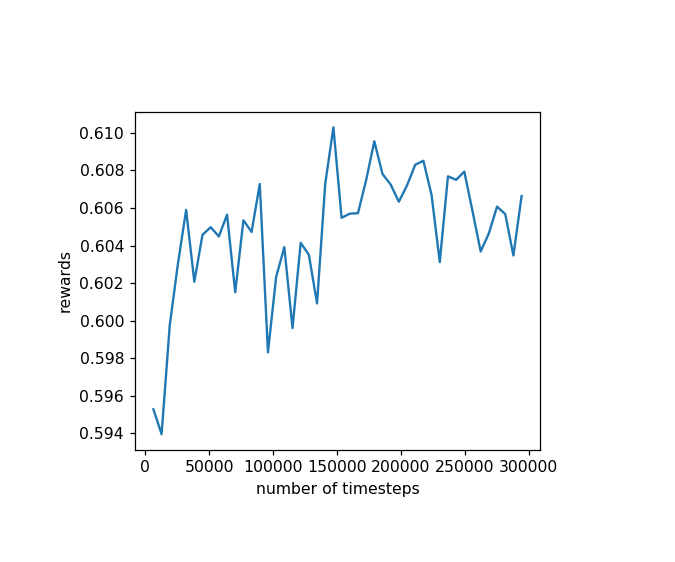

<IPython.core.display.Javascript object>


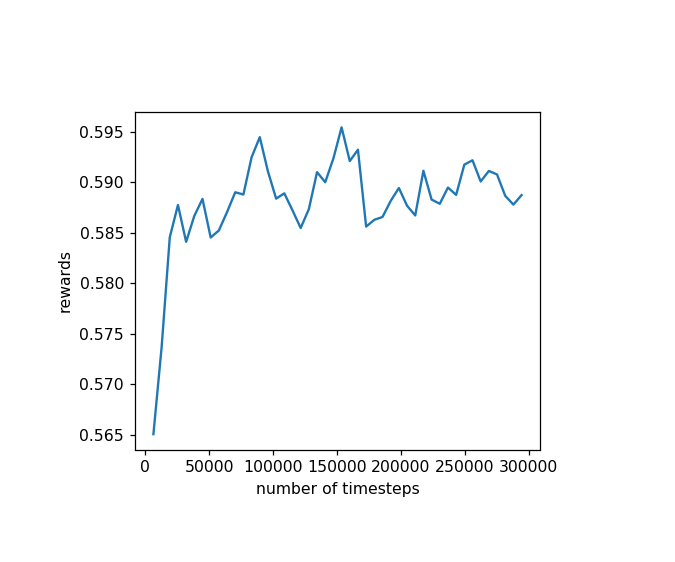

seed 5
seed 5: model definition ..
Using cuda device
seed 5: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cb5c7c50> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cb62be48>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f28cb5c7c50> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f28cb62bda0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:95: UserWarn

---------------------------------------
| time/                   |           |
|    fps                  | 153       |
|    iterations           | 1         |
|    time_elapsed         | 1         |
|    total_timesteps      | 256       |
| train/                  |           |
|    approx_kl            | 0.2908091 |
|    clip_fraction        | 0.694     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.85      |
|    explained_variance   | 0.971     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.101    |
|    n_updates            | 23440     |
|    policy_gradient_loss | -0.088    |
|    std                  | 0.0923    |
|    value_loss           | 0.000698  |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 89          |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 51

-----------------------------------------
| time/                   |             |
|    fps                  | 69          |
|    iterations           | 12          |
|    time_elapsed         | 44          |
|    total_timesteps      | 3072        |
| train/                  |             |
|    approx_kl            | 0.025945812 |
|    clip_fraction        | 0.346       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.93        |
|    explained_variance   | 0.908       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0792     |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.0736     |
|    std                  | 0.149       |
|    value_loss           | 0.0018      |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 69          |
|    iterations           | 13          |
|    time_elapsed         | 47    

-----------------------------------------
| time/                   |             |
|    fps                  | 68          |
|    iterations           | 23          |
|    time_elapsed         | 85          |
|    total_timesteps      | 5888        |
| train/                  |             |
|    approx_kl            | 0.042432968 |
|    clip_fraction        | 0.445       |
|    clip_range           | 0.2         |
|    entropy_loss         | 1.95        |
|    explained_variance   | 0.918       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.137      |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.0923     |
|    std                  | 0.149       |
|    value_loss           | 0.00132     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 68         |
|    iterations           | 24         |
|    time_elapsed         | 90        

----------------------------------------
| time/                   |            |
|    fps                  | 62         |
|    iterations           | 33         |
|    time_elapsed         | 135        |
|    total_timesteps      | 8448       |
| train/                  |            |
|    approx_kl            | 0.03990058 |
|    clip_fraction        | 0.515      |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.96       |
|    explained_variance   | 0.904      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.133     |
|    n_updates            | 640        |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.148      |
|    value_loss           | 0.00197    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 34          |
|    time_elapsed         | 138         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 63         |
|    iterations           | 44         |
|    time_elapsed         | 176        |
|    total_timesteps      | 11264      |
| train/                  |            |
|    approx_kl            | 0.11236547 |
|    clip_fraction        | 0.48       |
|    clip_range           | 0.2        |
|    entropy_loss         | 1.98       |
|    explained_variance   | 0.921      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.146     |
|    n_updates            | 860        |
|    policy_gradient_loss | -0.0945    |
|    std                  | 0.147      |
|    value_loss           | 0.00344    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 63          |
|    iterations           | 45          |
|    time_elapsed         | 180         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 61          |
|    iterations           | 55          |
|    time_elapsed         | 228         |
|    total_timesteps      | 14080       |
| train/                  |             |
|    approx_kl            | 0.041952442 |
|    clip_fraction        | 0.451       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2           |
|    explained_variance   | 0.923       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.114      |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.0847     |
|    std                  | 0.147       |
|    value_loss           | 0.00139     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 61         |
|    iterations           | 56         |
|    time_elapsed         | 232       

-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 66          |
|    time_elapsed         | 270         |
|    total_timesteps      | 16896       |
| train/                  |             |
|    approx_kl            | 0.045974117 |
|    clip_fraction        | 0.509       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.01        |
|    explained_variance   | 0.921       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.103      |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0926     |
|    std                  | 0.146       |
|    value_loss           | 0.00222     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 62          |
|    iterations           | 67          |
|    time_elapsed         | 274   

Eval num_timesteps=19200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.51 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.45 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.53 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.51 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_rew

----------------------------------------
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 84         |
|    time_elapsed         | 412        |
|    total_timesteps      | 21504      |
| train/                  |            |
|    approx_kl            | 0.04274209 |
|    clip_fraction        | 0.535      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.04       |
|    explained_variance   | 0.933      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.124     |
|    n_updates            | 1660       |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.145      |
|    value_loss           | 0.00133    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 52          |
|    iterations           | 85          |
|    time_elapsed         | 416         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 95         |
|    time_elapsed         | 453        |
|    total_timesteps      | 24320      |
| train/                  |            |
|    approx_kl            | 0.13528946 |
|    clip_fraction        | 0.548      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.05       |
|    explained_variance   | 0.936      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.081     |
|    n_updates            | 1880       |
|    policy_gradient_loss | -0.0941    |
|    std                  | 0.145      |
|    value_loss           | 0.00165    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 96         |
|    time_elapsed         | 457        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 106        |
|    time_elapsed         | 505        |
|    total_timesteps      | 27136      |
| train/                  |            |
|    approx_kl            | 0.09381457 |
|    clip_fraction        | 0.56       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.07       |
|    explained_variance   | 0.923      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 2100       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.144      |
|    value_loss           | 0.00201    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 53          |
|    iterations           | 107         |
|    time_elapsed         | 509         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 117        |
|    time_elapsed         | 546        |
|    total_timesteps      | 29952      |
| train/                  |            |
|    approx_kl            | 0.08922461 |
|    clip_fraction        | 0.562      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.09       |
|    explained_variance   | 0.936      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 2320       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.143      |
|    value_loss           | 0.00152    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 118         |
|    time_elapsed         | 550         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 128         |
|    time_elapsed         | 596         |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.049452275 |
|    clip_fraction        | 0.596       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.11        |
|    explained_variance   | 0.936       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.124      |
|    n_updates            | 2540        |
|    policy_gradient_loss | -0.105      |
|    std                  | 0.143       |
|    value_loss           | 0.0015      |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 129         |
|    time_elapsed         | 600   

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 139        |
|    time_elapsed         | 638        |
|    total_timesteps      | 35584      |
| train/                  |            |
|    approx_kl            | 0.09763049 |
|    clip_fraction        | 0.585      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.13       |
|    explained_variance   | 0.921      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0969    |
|    n_updates            | 2760       |
|    policy_gradient_loss | -0.0969    |
|    std                  | 0.142      |
|    value_loss           | 0.00147    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 140         |
|    time_elapsed         | 641         |
|    total_

Eval num_timesteps=38400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.46 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.43 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.50 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.48 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=38400, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00

----------------------------------------
| time/                   |            |
|    fps                  | 53         |
|    iterations           | 158        |
|    time_elapsed         | 758        |
|    total_timesteps      | 40448      |
| train/                  |            |
|    approx_kl            | 0.09527498 |
|    clip_fraction        | 0.562      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.16       |
|    explained_variance   | 0.914      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.111     |
|    n_updates            | 3140       |
|    policy_gradient_loss | -0.095     |
|    std                  | 0.141      |
|    value_loss           | 0.00129    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 53          |
|    iterations           | 159         |
|    time_elapsed         | 762         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 169        |
|    time_elapsed         | 799        |
|    total_timesteps      | 43264      |
| train/                  |            |
|    approx_kl            | 0.20020083 |
|    clip_fraction        | 0.615      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.17       |
|    explained_variance   | 0.938      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0823    |
|    n_updates            | 3360       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.141      |
|    value_loss           | 0.0014     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 170        |
|    time_elapsed         | 803        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 180        |
|    time_elapsed         | 851        |
|    total_timesteps      | 46080      |
| train/                  |            |
|    approx_kl            | 0.12844856 |
|    clip_fraction        | 0.578      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.19       |
|    explained_variance   | 0.959      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0872    |
|    n_updates            | 3580       |
|    policy_gradient_loss | -0.0975    |
|    std                  | 0.14       |
|    value_loss           | 0.00101    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 54        |
|    iterations           | 181       |
|    time_elapsed         | 855       |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 191        |
|    time_elapsed         | 892        |
|    total_timesteps      | 48896      |
| train/                  |            |
|    approx_kl            | 0.07722037 |
|    clip_fraction        | 0.609      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.21       |
|    explained_variance   | 0.928      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.141     |
|    n_updates            | 3800       |
|    policy_gradient_loss | -0.109     |
|    std                  | 0.139      |
|    value_loss           | 0.00137    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 192        |
|    time_elapsed         | 896        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 202        |
|    time_elapsed         | 941        |
|    total_timesteps      | 51712      |
| train/                  |            |
|    approx_kl            | 0.13579409 |
|    clip_fraction        | 0.658      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.23       |
|    explained_variance   | 0.94       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.136     |
|    n_updates            | 4020       |
|    policy_gradient_loss | -0.109     |
|    std                  | 0.139      |
|    value_loss           | 0.00126    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 203         |
|    time_elapsed         | 944         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 213        |
|    time_elapsed         | 982        |
|    total_timesteps      | 54528      |
| train/                  |            |
|    approx_kl            | 0.15627894 |
|    clip_fraction        | 0.631      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.25       |
|    explained_variance   | 0.956      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 4240       |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.138      |
|    value_loss           | 0.00147    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 214        |
|    time_elapsed         | 985        |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 224        |
|    time_elapsed         | 1022       |
|    total_timesteps      | 57344      |
| train/                  |            |
|    approx_kl            | 0.13578093 |
|    clip_fraction        | 0.648      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.26       |
|    explained_variance   | 0.935      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.147     |
|    n_updates            | 4460       |
|    policy_gradient_loss | -0.112     |
|    std                  | 0.137      |
|    value_loss           | 0.00189    |
----------------------------------------
Eval num_timesteps=57600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=57600, episode_reward=0.48 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=57600, epi

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 232        |
|    time_elapsed         | 1090       |
|    total_timesteps      | 59392      |
| train/                  |            |
|    approx_kl            | 0.07478647 |
|    clip_fraction        | 0.586      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.28       |
|    explained_variance   | 0.948      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.131     |
|    n_updates            | 4620       |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.137      |
|    value_loss           | 0.000998   |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 233         |
|    time_elapsed         | 1094        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 243        |
|    time_elapsed         | 1131       |
|    total_timesteps      | 62208      |
| train/                  |            |
|    approx_kl            | 0.12826528 |
|    clip_fraction        | 0.593      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.29       |
|    explained_variance   | 0.938      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.105     |
|    n_updates            | 4840       |
|    policy_gradient_loss | -0.0945    |
|    std                  | 0.136      |
|    value_loss           | 0.00129    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 244        |
|    time_elapsed         | 1135       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 254        |
|    time_elapsed         | 1183       |
|    total_timesteps      | 65024      |
| train/                  |            |
|    approx_kl            | 0.10120368 |
|    clip_fraction        | 0.609      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.31       |
|    explained_variance   | 0.961      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0997    |
|    n_updates            | 5060       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.136      |
|    value_loss           | 0.00101    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 255        |
|    time_elapsed         | 1186       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 265        |
|    time_elapsed         | 1223       |
|    total_timesteps      | 67840      |
| train/                  |            |
|    approx_kl            | 0.09136005 |
|    clip_fraction        | 0.59       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.32       |
|    explained_variance   | 0.948      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.137     |
|    n_updates            | 5280       |
|    policy_gradient_loss | -0.0988    |
|    std                  | 0.135      |
|    value_loss           | 0.000975   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 266        |
|    time_elapsed         | 1227       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 276        |
|    time_elapsed         | 1276       |
|    total_timesteps      | 70656      |
| train/                  |            |
|    approx_kl            | 0.11161157 |
|    clip_fraction        | 0.591      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.34       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0994    |
|    n_updates            | 5500       |
|    policy_gradient_loss | -0.0993    |
|    std                  | 0.135      |
|    value_loss           | 0.000783   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 277        |
|    time_elapsed         | 1280       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 287        |
|    time_elapsed         | 1317       |
|    total_timesteps      | 73472      |
| train/                  |            |
|    approx_kl            | 0.11517891 |
|    clip_fraction        | 0.649      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.36       |
|    explained_variance   | 0.95       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.128     |
|    n_updates            | 5720       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.134      |
|    value_loss           | 0.00113    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 288        |
|    time_elapsed         | 1320       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 298        |
|    time_elapsed         | 1357       |
|    total_timesteps      | 76288      |
| train/                  |            |
|    approx_kl            | 0.14700139 |
|    clip_fraction        | 0.605      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.38       |
|    explained_variance   | 0.954      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0963    |
|    n_updates            | 5940       |
|    policy_gradient_loss | -0.0921    |
|    std                  | 0.133      |
|    value_loss           | 0.0012     |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 299         |
|    time_elapsed         | 1361        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 306        |
|    time_elapsed         | 1419       |
|    total_timesteps      | 78336      |
| train/                  |            |
|    approx_kl            | 0.11524697 |
|    clip_fraction        | 0.618      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.39       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.125     |
|    n_updates            | 6100       |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.133      |
|    value_loss           | 0.0008     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 307        |
|    time_elapsed         | 1422       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 317        |
|    time_elapsed         | 1459       |
|    total_timesteps      | 81152      |
| train/                  |            |
|    approx_kl            | 0.16036656 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.41       |
|    explained_variance   | 0.948      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0667    |
|    n_updates            | 6320       |
|    policy_gradient_loss | -0.0967    |
|    std                  | 0.132      |
|    value_loss           | 0.00123    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 55        |
|    iterations           | 318       |
|    time_elapsed         | 1463      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 328        |
|    time_elapsed         | 1508       |
|    total_timesteps      | 83968      |
| train/                  |            |
|    approx_kl            | 0.16156937 |
|    clip_fraction        | 0.639      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.42       |
|    explained_variance   | 0.949      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0739    |
|    n_updates            | 6540       |
|    policy_gradient_loss | -0.0935    |
|    std                  | 0.132      |
|    value_loss           | 0.00101    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 329         |
|    time_elapsed         | 1511        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 339        |
|    time_elapsed         | 1549       |
|    total_timesteps      | 86784      |
| train/                  |            |
|    approx_kl            | 0.16902967 |
|    clip_fraction        | 0.646      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.44       |
|    explained_variance   | 0.959      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.103     |
|    n_updates            | 6760       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.131      |
|    value_loss           | 0.000858   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 340        |
|    time_elapsed         | 1552       |
|    total_times

Eval num_timesteps=89600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=89600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.59       |
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 350        |
|    time_elapsed         | 1597       |
|    total_timesteps      | 89600      |
| train/                  |            |
|    approx_kl            | 0.12373319 |
|    clip_fraction        | 0.637      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.47       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 6980       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.13       |
|    value

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 361        |
|    time_elapsed         | 1638       |
|    total_timesteps      | 92416      |
| train/                  |            |
|    approx_kl            | 0.15134707 |
|    clip_fraction        | 0.625      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.49       |
|    explained_variance   | 0.954      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0984    |
|    n_updates            | 7200       |
|    policy_gradient_loss | -0.0979    |
|    std                  | 0.13       |
|    value_loss           | 0.000995   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 362        |
|    time_elapsed         | 1642       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 372        |
|    time_elapsed         | 1679       |
|    total_timesteps      | 95232      |
| train/                  |            |
|    approx_kl            | 0.08107754 |
|    clip_fraction        | 0.611      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.51       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 7420       |
|    policy_gradient_loss | -0.0928    |
|    std                  | 0.129      |
|    value_loss           | 0.000933   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 373        |
|    time_elapsed         | 1683       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 55         |
|    iterations           | 380        |
|    time_elapsed         | 1746       |
|    total_timesteps      | 97280      |
| train/                  |            |
|    approx_kl            | 0.12157518 |
|    clip_fraction        | 0.602      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.52       |
|    explained_variance   | 0.944      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0992    |
|    n_updates            | 7580       |
|    policy_gradient_loss | -0.0962    |
|    std                  | 0.129      |
|    value_loss           | 0.00124    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 381         |
|    time_elapsed         | 1749        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 391         |
|    time_elapsed         | 1786        |
|    total_timesteps      | 100096      |
| train/                  |             |
|    approx_kl            | 0.106294736 |
|    clip_fraction        | 0.589       |
|    clip_range           | 0.2         |
|    entropy_loss         | 2.54        |
|    explained_variance   | 0.952       |
|    learning_rate        | 1e-05       |
|    loss                 | -0.0902     |
|    n_updates            | 7800        |
|    policy_gradient_loss | -0.0879     |
|    std                  | 0.128       |
|    value_loss           | 0.00109     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 392        |
|    time_elapsed         | 1790      

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 402        |
|    time_elapsed         | 1835       |
|    total_timesteps      | 102912     |
| train/                  |            |
|    approx_kl            | 0.16392055 |
|    clip_fraction        | 0.637      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.56       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 8020       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.128      |
|    value_loss           | 0.000685   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 403        |
|    time_elapsed         | 1839       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 413        |
|    time_elapsed         | 1876       |
|    total_timesteps      | 105728     |
| train/                  |            |
|    approx_kl            | 0.21632573 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.58       |
|    explained_variance   | 0.927      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 8240       |
|    policy_gradient_loss | -0.0954    |
|    std                  | 0.127      |
|    value_loss           | 0.00169    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 414        |
|    time_elapsed         | 1880       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 424        |
|    time_elapsed         | 1917       |
|    total_timesteps      | 108544     |
| train/                  |            |
|    approx_kl            | 0.10978573 |
|    clip_fraction        | 0.613      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.6        |
|    explained_variance   | 0.951      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.106     |
|    n_updates            | 8460       |
|    policy_gradient_loss | -0.0967    |
|    std                  | 0.126      |
|    value_loss           | 0.000859   |
----------------------------------------
Eval num_timesteps=108800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=108800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
---------------------------

--------------------------------------
| time/                   |          |
|    fps                  | 56       |
|    iterations           | 435      |
|    time_elapsed         | 1968     |
|    total_timesteps      | 111360   |
| train/                  |          |
|    approx_kl            | 0.137284 |
|    clip_fraction        | 0.659    |
|    clip_range           | 0.2      |
|    entropy_loss         | 2.61     |
|    explained_variance   | 0.969    |
|    learning_rate        | 1e-05    |
|    loss                 | -0.121   |
|    n_updates            | 8680     |
|    policy_gradient_loss | -0.105   |
|    std                  | 0.126    |
|    value_loss           | 0.000874 |
--------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 436        |
|    time_elapsed         | 1971       |
|    total_timesteps      | 111616     |
| train/     

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 446        |
|    time_elapsed         | 2009       |
|    total_timesteps      | 114176     |
| train/                  |            |
|    approx_kl            | 0.14689748 |
|    clip_fraction        | 0.706      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.63       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0982    |
|    n_updates            | 8900       |
|    policy_gradient_loss | -0.107     |
|    std                  | 0.125      |
|    value_loss           | 0.00094    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 447        |
|    time_elapsed         | 2013       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 454        |
|    time_elapsed         | 2059       |
|    total_timesteps      | 116224     |
| train/                  |            |
|    approx_kl            | 0.16609973 |
|    clip_fraction        | 0.595      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.64       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 9060       |
|    policy_gradient_loss | -0.0968    |
|    std                  | 0.125      |
|    value_loss           | 0.000751   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 455        |
|    time_elapsed         | 2063       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 465        |
|    time_elapsed         | 2100       |
|    total_timesteps      | 119040     |
| train/                  |            |
|    approx_kl            | 0.14879194 |
|    clip_fraction        | 0.68       |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.66       |
|    explained_variance   | 0.968      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 9280       |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.124      |
|    value_loss           | 0.000904   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 466        |
|    time_elapsed         | 2104       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 476        |
|    time_elapsed         | 2151       |
|    total_timesteps      | 121856     |
| train/                  |            |
|    approx_kl            | 0.14286667 |
|    clip_fraction        | 0.642      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.68       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.11      |
|    n_updates            | 9500       |
|    policy_gradient_loss | -0.0976    |
|    std                  | 0.124      |
|    value_loss           | 0.000607   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 477        |
|    time_elapsed         | 2155       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 487        |
|    time_elapsed         | 2193       |
|    total_timesteps      | 124672     |
| train/                  |            |
|    approx_kl            | 0.15879706 |
|    clip_fraction        | 0.657      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.7        |
|    explained_variance   | 0.949      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.145     |
|    n_updates            | 9720       |
|    policy_gradient_loss | -0.0997    |
|    std                  | 0.123      |
|    value_loss           | 0.00106    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 56        |
|    iterations           | 488       |
|    time_elapsed         | 2197      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 498        |
|    time_elapsed         | 2234       |
|    total_timesteps      | 127488     |
| train/                  |            |
|    approx_kl            | 0.18249178 |
|    clip_fraction        | 0.671      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.71       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.141     |
|    n_updates            | 9940       |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.123      |
|    value_loss           | 0.000782   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 499        |
|    time_elapsed         | 2238       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 509        |
|    time_elapsed         | 2288       |
|    total_timesteps      | 130304     |
| train/                  |            |
|    approx_kl            | 0.18772127 |
|    clip_fraction        | 0.648      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.74       |
|    explained_variance   | 0.96       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 10160      |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.122      |
|    value_loss           | 0.000849   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 510        |
|    time_elapsed         | 2292       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 520        |
|    time_elapsed         | 2330       |
|    total_timesteps      | 133120     |
| train/                  |            |
|    approx_kl            | 0.22564098 |
|    clip_fraction        | 0.685      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.76       |
|    explained_variance   | 0.97       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 10380      |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.121      |
|    value_loss           | 0.000742   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 521       |
|    time_elapsed         | 2333      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 528        |
|    time_elapsed         | 2389       |
|    total_timesteps      | 135168     |
| train/                  |            |
|    approx_kl            | 0.10032437 |
|    clip_fraction        | 0.633      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.78       |
|    explained_variance   | 0.967      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.091     |
|    n_updates            | 10540      |
|    policy_gradient_loss | -0.0957    |
|    std                  | 0.121      |
|    value_loss           | 0.00108    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 56        |
|    iterations           | 529       |
|    time_elapsed         | 2393      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 539        |
|    time_elapsed         | 2430       |
|    total_timesteps      | 137984     |
| train/                  |            |
|    approx_kl            | 0.21610083 |
|    clip_fraction        | 0.643      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.8        |
|    explained_variance   | 0.965      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 10760      |
|    policy_gradient_loss | -0.0983    |
|    std                  | 0.12       |
|    value_loss           | 0.000855   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 540        |
|    time_elapsed         | 2434       |
|    total_times

Eval num_timesteps=140800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=140800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
--------------------------------------
| eval/                   |          |
|    mean_ep_length       | 5        |
|    mean_reward          | 0.591    |
| time/                   |          |
|    fps                  | 56       |
|    iterations           | 550      |
|    time_elapsed         | 2482     |
|    total_timesteps      | 140800   |
| train/                  |          |
|    approx_kl            | 0.160072 |
|    clip_fraction        | 0.705    |
|    clip_range           | 0.2      |
|    entropy_loss         | 2.82     |
|    explained_variance   | 0.961    |
|    learning_rate        | 1e-05    |
|    loss                 | -0.0724  |
|    n_updates            | 10980    |
|    policy_gradient_loss | -0.1     |
|    std                  | 0.12     |
|    value_loss           

----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 561        |
|    time_elapsed         | 2523       |
|    total_timesteps      | 143616     |
| train/                  |            |
|    approx_kl            | 0.14545503 |
|    clip_fraction        | 0.613      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.83       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.141     |
|    n_updates            | 11200      |
|    policy_gradient_loss | -0.0935    |
|    std                  | 0.119      |
|    value_loss           | 0.000797   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 56         |
|    iterations           | 562        |
|    time_elapsed         | 2527       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 572        |
|    time_elapsed         | 2564       |
|    total_timesteps      | 146432     |
| train/                  |            |
|    approx_kl            | 0.15183967 |
|    clip_fraction        | 0.663      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.85       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0842    |
|    n_updates            | 11420      |
|    policy_gradient_loss | -0.0909    |
|    std                  | 0.119      |
|    value_loss           | 0.0009     |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 573        |
|    time_elapsed         | 2568       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 583        |
|    time_elapsed         | 2615       |
|    total_timesteps      | 149248     |
| train/                  |            |
|    approx_kl            | 0.15206736 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.87       |
|    explained_variance   | 0.965      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0952    |
|    n_updates            | 11640      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.118      |
|    value_loss           | 0.000888   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 584        |
|    time_elapsed         | 2619       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 594       |
|    time_elapsed         | 2657      |
|    total_timesteps      | 152064    |
| train/                  |           |
|    approx_kl            | 0.1235192 |
|    clip_fraction        | 0.64      |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.89      |
|    explained_variance   | 0.974     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.127    |
|    n_updates            | 11860     |
|    policy_gradient_loss | -0.0972   |
|    std                  | 0.118     |
|    value_loss           | 0.000686  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 595        |
|    time_elapsed         | 2661       |
|    total_timesteps      | 152320 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 602        |
|    time_elapsed         | 2703       |
|    total_timesteps      | 154112     |
| train/                  |            |
|    approx_kl            | 0.18798642 |
|    clip_fraction        | 0.662      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.9        |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 12020      |
|    policy_gradient_loss | -0.0984    |
|    std                  | 0.117      |
|    value_loss           | 0.00064    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 603        |
|    time_elapsed         | 2707       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 613       |
|    time_elapsed         | 2744      |
|    total_timesteps      | 156928    |
| train/                  |           |
|    approx_kl            | 0.1375812 |
|    clip_fraction        | 0.641     |
|    clip_range           | 0.2       |
|    entropy_loss         | 2.92      |
|    explained_variance   | 0.979     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0954   |
|    n_updates            | 12240     |
|    policy_gradient_loss | -0.1      |
|    std                  | 0.117     |
|    value_loss           | 0.000551  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 614        |
|    time_elapsed         | 2748       |
|    total_timesteps      | 157184 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 624        |
|    time_elapsed         | 2786       |
|    total_timesteps      | 159744     |
| train/                  |            |
|    approx_kl            | 0.32661617 |
|    clip_fraction        | 0.698      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.94       |
|    explained_variance   | 0.962      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 12460      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.116      |
|    value_loss           | 0.00085    |
----------------------------------------
Eval num_timesteps=160000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=160000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/ 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 635        |
|    time_elapsed         | 2835       |
|    total_timesteps      | 162560     |
| train/                  |            |
|    approx_kl            | 0.18273406 |
|    clip_fraction        | 0.632      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.96       |
|    explained_variance   | 0.974      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 12680      |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.115      |
|    value_loss           | 0.000746   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 636        |
|    time_elapsed         | 2839       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 646        |
|    time_elapsed         | 2876       |
|    total_timesteps      | 165376     |
| train/                  |            |
|    approx_kl            | 0.19075546 |
|    clip_fraction        | 0.653      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.98       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.106     |
|    n_updates            | 12900      |
|    policy_gradient_loss | -0.0968    |
|    std                  | 0.115      |
|    value_loss           | 0.000737   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 647        |
|    time_elapsed         | 2880       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 657        |
|    time_elapsed         | 2929       |
|    total_timesteps      | 168192     |
| train/                  |            |
|    approx_kl            | 0.12743068 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 2.99       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.128     |
|    n_updates            | 13120      |
|    policy_gradient_loss | -0.0996    |
|    std                  | 0.114      |
|    value_loss           | 0.000603   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 658        |
|    time_elapsed         | 2933       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 668        |
|    time_elapsed         | 2970       |
|    total_timesteps      | 171008     |
| train/                  |            |
|    approx_kl            | 0.19511734 |
|    clip_fraction        | 0.657      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.01       |
|    explained_variance   | 0.961      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.078     |
|    n_updates            | 13340      |
|    policy_gradient_loss | -0.0885    |
|    std                  | 0.114      |
|    value_loss           | 0.000843   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 669        |
|    time_elapsed         | 2974       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 676        |
|    time_elapsed         | 3030       |
|    total_timesteps      | 173056     |
| train/                  |            |
|    approx_kl            | 0.16132358 |
|    clip_fraction        | 0.648      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.03       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.103     |
|    n_updates            | 13500      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.113      |
|    value_loss           | 0.000739   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 677       |
|    time_elapsed         | 3034      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 687        |
|    time_elapsed         | 3071       |
|    total_timesteps      | 175872     |
| train/                  |            |
|    approx_kl            | 0.20786738 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.05       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.125     |
|    n_updates            | 13720      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.113      |
|    value_loss           | 0.000917   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 688        |
|    time_elapsed         | 3075       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 698        |
|    time_elapsed         | 3113       |
|    total_timesteps      | 178688     |
| train/                  |            |
|    approx_kl            | 0.20625225 |
|    clip_fraction        | 0.658      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.06       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.125     |
|    n_updates            | 13940      |
|    policy_gradient_loss | -0.0963    |
|    std                  | 0.112      |
|    value_loss           | 0.000666   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 699        |
|    time_elapsed         | 3117       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 709        |
|    time_elapsed         | 3164       |
|    total_timesteps      | 181504     |
| train/                  |            |
|    approx_kl            | 0.26072097 |
|    clip_fraction        | 0.695      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.08       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.13      |
|    n_updates            | 14160      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.112      |
|    value_loss           | 0.00065    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 710       |
|    time_elapsed         | 3167      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 720        |
|    time_elapsed         | 3206       |
|    total_timesteps      | 184320     |
| train/                  |            |
|    approx_kl            | 0.24506663 |
|    clip_fraction        | 0.699      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.11       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.142     |
|    n_updates            | 14380      |
|    policy_gradient_loss | -0.109     |
|    std                  | 0.111      |
|    value_loss           | 0.000791   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 721        |
|    time_elapsed         | 3209       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 731       |
|    time_elapsed         | 3256      |
|    total_timesteps      | 187136    |
| train/                  |           |
|    approx_kl            | 0.2285673 |
|    clip_fraction        | 0.678     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.13      |
|    explained_variance   | 0.974     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.114    |
|    n_updates            | 14600     |
|    policy_gradient_loss | -0.1      |
|    std                  | 0.111     |
|    value_loss           | 0.000843  |
---------------------------------------
--------------------------------------
| time/                   |          |
|    fps                  | 57       |
|    iterations           | 732      |
|    time_elapsed         | 3259     |
|    total_timesteps      | 187392   |
| trai

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 742        |
|    time_elapsed         | 3297       |
|    total_timesteps      | 189952     |
| train/                  |            |
|    approx_kl            | 0.18826827 |
|    clip_fraction        | 0.679      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.15       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.138     |
|    n_updates            | 14820      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.11       |
|    value_loss           | 0.00073    |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 743       |
|    time_elapsed         | 3301      |
|    total_timesteps 

Eval num_timesteps=192000, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=192000, episode_reward=0.56 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=192000, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.586      |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 750        |
|    time_elapsed         | 3357       |
|    total_timesteps      | 192000     |
| train/                  |            |
|    approx_kl            | 0.12475923 |
|    clip_fraction        | 0.679      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.17       |
|    explained_variance   | 0.974     

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 760        |
|    time_elapsed         | 3396       |
|    total_timesteps      | 194560     |
| train/                  |            |
|    approx_kl            | 0.24577129 |
|    clip_fraction        | 0.641      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.18       |
|    explained_variance   | 0.97       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0705    |
|    n_updates            | 15180      |
|    policy_gradient_loss | -0.0937    |
|    std                  | 0.109      |
|    value_loss           | 0.000824   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 761        |
|    time_elapsed         | 3400       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 771        |
|    time_elapsed         | 3439       |
|    total_timesteps      | 197376     |
| train/                  |            |
|    approx_kl            | 0.21222177 |
|    clip_fraction        | 0.701      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.2        |
|    explained_variance   | 0.97       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.141     |
|    n_updates            | 15400      |
|    policy_gradient_loss | -0.0976    |
|    std                  | 0.109      |
|    value_loss           | 0.000979   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 772        |
|    time_elapsed         | 3443       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 782        |
|    time_elapsed         | 3489       |
|    total_timesteps      | 200192     |
| train/                  |            |
|    approx_kl            | 0.15236379 |
|    clip_fraction        | 0.643      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.22       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 15620      |
|    policy_gradient_loss | -0.1       |
|    std                  | 0.108      |
|    value_loss           | 0.000653   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 783        |
|    time_elapsed         | 3493       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 793        |
|    time_elapsed         | 3532       |
|    total_timesteps      | 203008     |
| train/                  |            |
|    approx_kl            | 0.17025316 |
|    clip_fraction        | 0.658      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.24       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 15840      |
|    policy_gradient_loss | -0.0975    |
|    std                  | 0.108      |
|    value_loss           | 0.000759   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 794        |
|    time_elapsed         | 3536       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 804       |
|    time_elapsed         | 3585      |
|    total_timesteps      | 205824    |
| train/                  |           |
|    approx_kl            | 0.2143327 |
|    clip_fraction        | 0.655     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.26      |
|    explained_variance   | 0.98      |
|    learning_rate        | 1e-05     |
|    loss                 | -0.11     |
|    n_updates            | 16060     |
|    policy_gradient_loss | -0.0936   |
|    std                  | 0.107     |
|    value_loss           | 0.000601  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 805        |
|    time_elapsed         | 3589       |
|    total_timesteps      | 206080 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 815        |
|    time_elapsed         | 3628       |
|    total_timesteps      | 208640     |
| train/                  |            |
|    approx_kl            | 0.16045201 |
|    clip_fraction        | 0.662      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.28       |
|    explained_variance   | 0.972      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.115     |
|    n_updates            | 16280      |
|    policy_gradient_loss | -0.0987    |
|    std                  | 0.106      |
|    value_loss           | 0.000812   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 816        |
|    time_elapsed         | 3632       |
|    total_times

Eval num_timesteps=211200, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=211200, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=211200, episode_reward=0.54 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.52 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=211200, episode_reward=0.57 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_t

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 833        |
|    time_elapsed         | 3720       |
|    total_timesteps      | 213248     |
| train/                  |            |
|    approx_kl            | 0.15306735 |
|    clip_fraction        | 0.69       |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.31       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 16640      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.106      |
|    value_loss           | 0.000725   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 834        |
|    time_elapsed         | 3724       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 844        |
|    time_elapsed         | 3763       |
|    total_timesteps      | 216064     |
| train/                  |            |
|    approx_kl            | 0.18826197 |
|    clip_fraction        | 0.684      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.33       |
|    explained_variance   | 0.969      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 16860      |
|    policy_gradient_loss | -0.097     |
|    std                  | 0.105      |
|    value_loss           | 0.000915   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 845        |
|    time_elapsed         | 3767       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 855        |
|    time_elapsed         | 3814       |
|    total_timesteps      | 218880     |
| train/                  |            |
|    approx_kl            | 0.18608923 |
|    clip_fraction        | 0.683      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.35       |
|    explained_variance   | 0.979      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.112     |
|    n_updates            | 17080      |
|    policy_gradient_loss | -0.103     |
|    std                  | 0.105      |
|    value_loss           | 0.000601   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 856        |
|    time_elapsed         | 3818       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 866       |
|    time_elapsed         | 3857      |
|    total_timesteps      | 221696    |
| train/                  |           |
|    approx_kl            | 0.2498489 |
|    clip_fraction        | 0.666     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.37      |
|    explained_variance   | 0.967     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.105    |
|    n_updates            | 17300     |
|    policy_gradient_loss | -0.0993   |
|    std                  | 0.104     |
|    value_loss           | 0.000844  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 867       |
|    time_elapsed         | 3861      |
|    total_timesteps      | 221952    |


----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 877        |
|    time_elapsed         | 3908       |
|    total_timesteps      | 224512     |
| train/                  |            |
|    approx_kl            | 0.19730833 |
|    clip_fraction        | 0.692      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.39       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.125     |
|    n_updates            | 17520      |
|    policy_gradient_loss | -0.108     |
|    std                  | 0.104      |
|    value_loss           | 0.00065    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 878        |
|    time_elapsed         | 3912       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 888        |
|    time_elapsed         | 3952       |
|    total_timesteps      | 227328     |
| train/                  |            |
|    approx_kl            | 0.25318563 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.42       |
|    explained_variance   | 0.977      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.104     |
|    n_updates            | 17740      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.103      |
|    value_loss           | 0.000763   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 889       |
|    time_elapsed         | 3956      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 899        |
|    time_elapsed         | 3995       |
|    total_timesteps      | 230144     |
| train/                  |            |
|    approx_kl            | 0.20635314 |
|    clip_fraction        | 0.689      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.44       |
|    explained_variance   | 0.965      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.119     |
|    n_updates            | 17960      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.102      |
|    value_loss           | 0.000777   |
----------------------------------------
Eval num_timesteps=230400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=230400, episode_reward=0.48 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=230400, episode_reward=0.58 +/

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 907        |
|    time_elapsed         | 4043       |
|    total_timesteps      | 232192     |
| train/                  |            |
|    approx_kl            | 0.19263507 |
|    clip_fraction        | 0.686      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.46       |
|    explained_variance   | 0.971      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 18120      |
|    policy_gradient_loss | -0.0956    |
|    std                  | 0.102      |
|    value_loss           | 0.000828   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 908        |
|    time_elapsed         | 4047       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 918        |
|    time_elapsed         | 4087       |
|    total_timesteps      | 235008     |
| train/                  |            |
|    approx_kl            | 0.25042015 |
|    clip_fraction        | 0.696      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.47       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.113     |
|    n_updates            | 18340      |
|    policy_gradient_loss | -0.106     |
|    std                  | 0.102      |
|    value_loss           | 0.000726   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 919       |
|    time_elapsed         | 4091      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 929        |
|    time_elapsed         | 4140       |
|    total_timesteps      | 237824     |
| train/                  |            |
|    approx_kl            | 0.17008181 |
|    clip_fraction        | 0.647      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.49       |
|    explained_variance   | 0.983      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 18560      |
|    policy_gradient_loss | -0.0985    |
|    std                  | 0.101      |
|    value_loss           | 0.000515   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 930        |
|    time_elapsed         | 4144       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 940       |
|    time_elapsed         | 4183      |
|    total_timesteps      | 240640    |
| train/                  |           |
|    approx_kl            | 0.2755872 |
|    clip_fraction        | 0.674     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.51      |
|    explained_variance   | 0.984     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.106    |
|    n_updates            | 18780     |
|    policy_gradient_loss | -0.107    |
|    std                  | 0.101     |
|    value_loss           | 0.000496  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 941       |
|    time_elapsed         | 4187      |
|    total_timesteps      | 240896    |


---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 951       |
|    time_elapsed         | 4235      |
|    total_timesteps      | 243456    |
| train/                  |           |
|    approx_kl            | 0.2829697 |
|    clip_fraction        | 0.704     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.53      |
|    explained_variance   | 0.972     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.131    |
|    n_updates            | 19000     |
|    policy_gradient_loss | -0.0994   |
|    std                  | 0.1       |
|    value_loss           | 0.000703  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 952        |
|    time_elapsed         | 4239       |
|    total_timesteps      | 243712 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 962        |
|    time_elapsed         | 4279       |
|    total_timesteps      | 246272     |
| train/                  |            |
|    approx_kl            | 0.21030356 |
|    clip_fraction        | 0.682      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.55       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.107     |
|    n_updates            | 19220      |
|    policy_gradient_loss | -0.0945    |
|    std                  | 0.0995     |
|    value_loss           | 0.000742   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 963        |
|    time_elapsed         | 4283       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 973        |
|    time_elapsed         | 4322       |
|    total_timesteps      | 249088     |
| train/                  |            |
|    approx_kl            | 0.18395728 |
|    clip_fraction        | 0.702      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.58       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0973    |
|    n_updates            | 19440      |
|    policy_gradient_loss | -0.0966    |
|    std                  | 0.099      |
|    value_loss           | 0.000572   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 974        |
|    time_elapsed         | 4326       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 981        |
|    time_elapsed         | 4375       |
|    total_timesteps      | 251136     |
| train/                  |            |
|    approx_kl            | 0.14688995 |
|    clip_fraction        | 0.7        |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.59       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.123     |
|    n_updates            | 19600      |
|    policy_gradient_loss | -0.101     |
|    std                  | 0.0986     |
|    value_loss           | 0.000621   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 982       |
|    time_elapsed         | 4379      |
|    total_timesteps 

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 992       |
|    time_elapsed         | 4419      |
|    total_timesteps      | 253952    |
| train/                  |           |
|    approx_kl            | 0.3012315 |
|    clip_fraction        | 0.697     |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.61      |
|    explained_variance   | 0.978     |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0519   |
|    n_updates            | 19820     |
|    policy_gradient_loss | -0.103    |
|    std                  | 0.0982    |
|    value_loss           | 0.000644  |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 993        |
|    time_elapsed         | 4423       |
|    total_timesteps      | 254208 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1003       |
|    time_elapsed         | 4471       |
|    total_timesteps      | 256768     |
| train/                  |            |
|    approx_kl            | 0.15520152 |
|    clip_fraction        | 0.681      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.62       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 20040      |
|    policy_gradient_loss | -0.0954    |
|    std                  | 0.0978     |
|    value_loss           | 0.00061    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1004       |
|    time_elapsed         | 4475       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1014       |
|    time_elapsed         | 4516       |
|    total_timesteps      | 259584     |
| train/                  |            |
|    approx_kl            | 0.21160161 |
|    clip_fraction        | 0.718      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.64       |
|    explained_variance   | 0.976      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.129     |
|    n_updates            | 20260      |
|    policy_gradient_loss | -0.106     |
|    std                  | 0.0974     |
|    value_loss           | 0.000763   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1015       |
|    time_elapsed         | 4520       |
|    total_times

Eval num_timesteps=262400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=262400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.587      |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1025       |
|    time_elapsed         | 4567       |
|    total_timesteps      | 262400     |
| train/                  |            |
|    approx_kl            | 0.21784787 |
|    clip_fraction        | 0.714      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.66       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.109     |
|    n_updates            | 20480      |
|    policy_gradient_loss | -0.109     |
|    std                  | 0.0969     |
|    val

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1036       |
|    time_elapsed         | 4612       |
|    total_timesteps      | 265216     |
| train/                  |            |
|    approx_kl            | 0.18868977 |
|    clip_fraction        | 0.692      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.68       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.122     |
|    n_updates            | 20700      |
|    policy_gradient_loss | -0.109     |
|    std                  | 0.0964     |
|    value_loss           | 0.000618   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1037       |
|    time_elapsed         | 4616       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 1047      |
|    time_elapsed         | 4656      |
|    total_timesteps      | 268032    |
| train/                  |           |
|    approx_kl            | 0.2363371 |
|    clip_fraction        | 0.71      |
|    clip_range           | 0.2       |
|    entropy_loss         | 3.7       |
|    explained_variance   | 0.98      |
|    learning_rate        | 1e-05     |
|    loss                 | -0.0925   |
|    n_updates            | 20920     |
|    policy_gradient_loss | -0.0947   |
|    std                  | 0.096     |
|    value_loss           | 0.00061   |
---------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1048       |
|    time_elapsed         | 4660       |
|    total_timesteps      | 268288 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1055       |
|    time_elapsed         | 4711       |
|    total_timesteps      | 270080     |
| train/                  |            |
|    approx_kl            | 0.26670033 |
|    clip_fraction        | 0.693      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.71       |
|    explained_variance   | 0.988      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.13      |
|    n_updates            | 21080      |
|    policy_gradient_loss | -0.105     |
|    std                  | 0.0956     |
|    value_loss           | 0.000432   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1056       |
|    time_elapsed         | 4715       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1066       |
|    time_elapsed         | 4755       |
|    total_timesteps      | 272896     |
| train/                  |            |
|    approx_kl            | 0.20970953 |
|    clip_fraction        | 0.724      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.73       |
|    explained_variance   | 0.982      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 21300      |
|    policy_gradient_loss | -0.102     |
|    std                  | 0.0953     |
|    value_loss           | 0.00054    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1067       |
|    time_elapsed         | 4759       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1077       |
|    time_elapsed         | 4807       |
|    total_timesteps      | 275712     |
| train/                  |            |
|    approx_kl            | 0.23828293 |
|    clip_fraction        | 0.705      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.75       |
|    explained_variance   | 0.984      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.12      |
|    n_updates            | 21520      |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.0948     |
|    value_loss           | 0.000524   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1078       |
|    time_elapsed         | 4811       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1088       |
|    time_elapsed         | 4852       |
|    total_timesteps      | 278528     |
| train/                  |            |
|    approx_kl            | 0.26148263 |
|    clip_fraction        | 0.696      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.77       |
|    explained_variance   | 0.98       |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0631    |
|    n_updates            | 21740      |
|    policy_gradient_loss | -0.0988    |
|    std                  | 0.0942     |
|    value_loss           | 0.000603   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1089       |
|    time_elapsed         | 4856       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1099       |
|    time_elapsed         | 4896       |
|    total_timesteps      | 281344     |
| train/                  |            |
|    approx_kl            | 0.15842775 |
|    clip_fraction        | 0.699      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.79       |
|    explained_variance   | 0.986      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0796    |
|    n_updates            | 21960      |
|    policy_gradient_loss | -0.0946    |
|    std                  | 0.0938     |
|    value_loss           | 0.000518   |
----------------------------------------
Eval num_timesteps=281600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=281600, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/ 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1110       |
|    time_elapsed         | 4948       |
|    total_timesteps      | 284160     |
| train/                  |            |
|    approx_kl            | 0.25816512 |
|    clip_fraction        | 0.713      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.81       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.14      |
|    n_updates            | 22180      |
|    policy_gradient_loss | -0.104     |
|    std                  | 0.0934     |
|    value_loss           | 0.000647   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1111       |
|    time_elapsed         | 4952       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1121       |
|    time_elapsed         | 4992       |
|    total_timesteps      | 286976     |
| train/                  |            |
|    approx_kl            | 0.28980863 |
|    clip_fraction        | 0.688      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.83       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.117     |
|    n_updates            | 22400      |
|    policy_gradient_loss | -0.0989    |
|    std                  | 0.093      |
|    value_loss           | 0.000516   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1122       |
|    time_elapsed         | 4996       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1129       |
|    time_elapsed         | 5054       |
|    total_timesteps      | 289024     |
| train/                  |            |
|    approx_kl            | 0.14029254 |
|    clip_fraction        | 0.728      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.84       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.132     |
|    n_updates            | 22560      |
|    policy_gradient_loss | -0.108     |
|    std                  | 0.0925     |
|    value_loss           | 0.000646   |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 57        |
|    iterations           | 1130      |
|    time_elapsed         | 5058      |
|    total_timesteps 

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1140       |
|    time_elapsed         | 5098       |
|    total_timesteps      | 291840     |
| train/                  |            |
|    approx_kl            | 0.22503448 |
|    clip_fraction        | 0.723      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.87       |
|    explained_variance   | 0.973      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.126     |
|    n_updates            | 22780      |
|    policy_gradient_loss | -0.107     |
|    std                  | 0.092      |
|    value_loss           | 0.00082    |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1141       |
|    time_elapsed         | 5102       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1151       |
|    time_elapsed         | 5149       |
|    total_timesteps      | 294656     |
| train/                  |            |
|    approx_kl            | 0.28115866 |
|    clip_fraction        | 0.7        |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.89       |
|    explained_variance   | 0.978      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.118     |
|    n_updates            | 23000      |
|    policy_gradient_loss | -0.0961    |
|    std                  | 0.0916     |
|    value_loss           | 0.000675   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1152       |
|    time_elapsed         | 5154       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1162       |
|    time_elapsed         | 5194       |
|    total_timesteps      | 297472     |
| train/                  |            |
|    approx_kl            | 0.20269305 |
|    clip_fraction        | 0.695      |
|    clip_range           | 0.2        |
|    entropy_loss         | 3.91       |
|    explained_variance   | 0.981      |
|    learning_rate        | 1e-05      |
|    loss                 | -0.0768    |
|    n_updates            | 23220      |
|    policy_gradient_loss | -0.0998    |
|    std                  | 0.0911     |
|    value_loss           | 0.000635   |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 1163       |
|    time_elapsed         | 5198       |
|    total_times

<IPython.core.display.Javascript object>


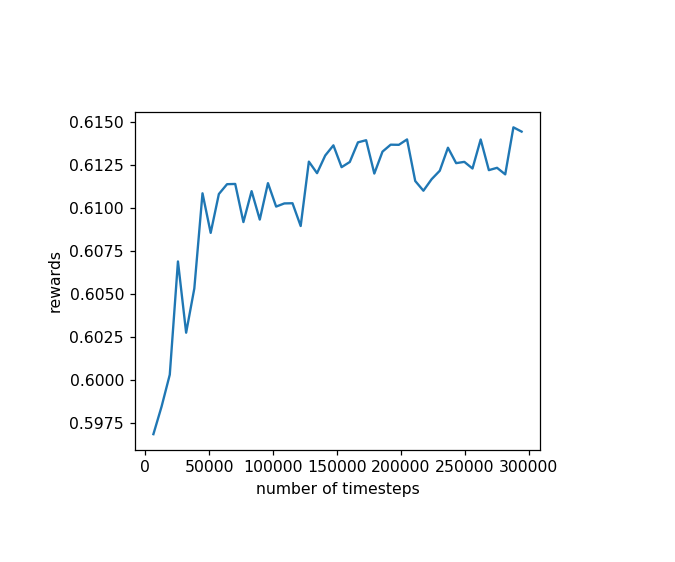

<IPython.core.display.Javascript object>


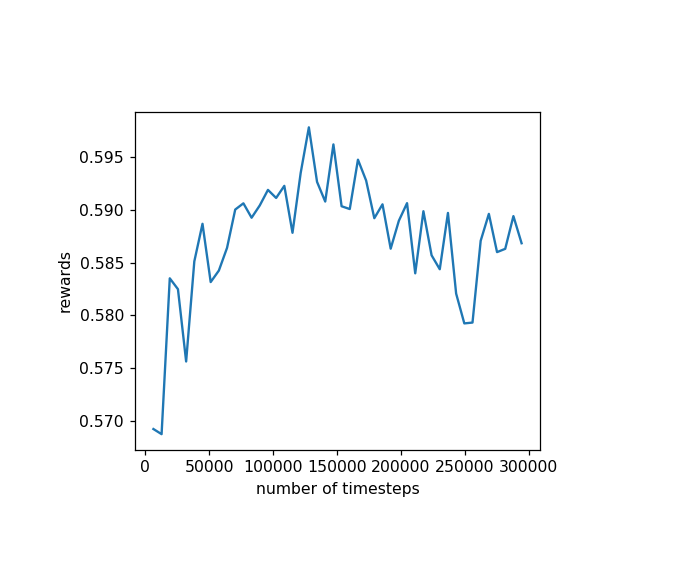

In [8]:
for seed in range(1,6):
    if True:
        print(f'seed {seed}')
        log_dir = './data/'+case+'/seed_'+str(seed)
        os.makedirs(log_dir, exist_ok=True)
        num_cpu = 64
        env_train.seed(seed)
        env_eval.seed(seed)
        train_callback = CustomEvalCallback(env_train, best_model_save_path=str(log_dir)+'/best_model_train', n_eval_episodes=1,
                             log_path=str(log_dir)+'/results_train', eval_freq=100)
        callback_list = [train_callback]
        for i in range(25):
            envs[i].seed(seed)
            eval_callback = CustomEvalCallback(envs[i], best_model_save_path=str(log_dir)+'/best_model_eval_'+str(i), n_eval_episodes=1,
                             log_path=str(log_dir)+'/results_eval_'+str(i), eval_freq=300)
            callback_list.append(eval_callback)
        eval_callback = CustomEvalCallback(env_eval, best_model_save_path=str(log_dir)+'/best_model_eval', n_eval_episodes=1,
                             log_path=str(log_dir)+'/results_eval', eval_freq=100)
        callback_list.append(eval_callback)
        callback = CallbackList(callback_list)
        env = SubprocVecEnv([make_env(env_train, i, seed) for i in range(num_cpu)])
#     env = VecMonitor(env, filename=log_dir)
        print(f'seed {seed}: model definition ..')
        model = PPO(policy=MlpPolicy,
            env=env,
            learning_rate = 1e-5,
            n_steps = 4,
            batch_size = 32,
            n_epochs = 20,
            gamma = 0.99,
            gae_lambda = 0.95,
            clip_range = 0.2,
            clip_range_vf = None,
            ent_coef = 0.001,
            vf_coef = 0.5,
            max_grad_norm = 0.5,
            use_sde= False,
            create_eval_env= False,
            policy_kwargs = dict(net_arch=[4000,2000,800,300], log_std_init=-1.9),
            verbose = 1,
            seed = seed,
            device = "auto")
        print(f'seed {seed}: learning ..')
        model.learn(total_timesteps=300000, callback=callback)
        model.save(log_dir+'/PPO')
        fig = plot_learning(log_dir, case='train')
        fig.savefig(log_dir+'/learn_train.png')
        fig = plot_learning(log_dir, case='eval')
        fig.savefig(log_dir+'/learn_eval.png')